<br>
<br>
<br>
<br>
<br>

<div style="text-align:center">
<font size="12em" color="#214A96" face="Krungthep">
<strong> Prediction of<br><br>Flights Delay </strong>
<br><br><br><br>
<font size="6em" color="#214A96" face="Krungthep">
    <strong>Team <font color="blue">O</font><font color="red">U</font><font color="#D7DF01">T</font><font color="0174DF">L</font><font color="green">I</font><font color="red">E</font><font color="5882FA">R</font></strong>
<br>
<div style="text-align:center">
<font size="3em" color="black" face="Chalkduster">
<br>Minjae Ahn <br>
Eunkyu Park<br>
Seungmoo Yang<br>
Seunghwan Roh
</font>
<br><br><br><br><br>


<br><br><br><br><br><div style="text-align:center">
<font size="7em" color="#214A96" face="Futura">
<strong> 0. Intro </strong><br><br><br><br><br>

<font size="6" face="Futura">
<strong>0-1 Contents</strong>

    # 0. Intro
    # 1. Problem Definition & Results
    # 2. About Datasets
    # 3. Data Cleaning & EDA
    # 4. Regression 
    # 5. Appendix

<font size="6" face="Futura">
<strong>0-2 Setting</strong>    

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime
import math
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
import statsmodels.api as sm
import matplotlib.font_manager as fm
font_location = "/Library/Fonts/AppleGothic.ttf"
font_name = fm.FontProperties(fname=font_location).get_name()
mpl.rc('font', family=font_name)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import KFold

import jupyternotify
ip = get_ipython()
ip.register_magics(jupyternotify.JupyterNotifyMagics)

pd.set_option('display.max_rows', 90)
pd.set_option('display.max_columns', 90)

<IPython.core.display.Javascript object>

<br><br><br><br><br><div style="text-align:center">
<font size="7em" color="#214A96" face="Futura">
<strong> 1. Problem Definition & Results </strong><br><br><br><br><br>


<font size="6" face="Futura">
<strong>1-1 Problem Definition</strong>

![변수 설명](https://www.scylladb.com/wp-content/uploads/flight-delay.jpg)
- 항공 산업에서 항공편 지연은 매우 중요한 이슈
- 독일의 컨설팅 회사 'Aviation Experts'에 따르면 2014년 한 해에만 항공편 지연으로 인해 250억 달러의 비용이 발생
- 미국에서는 항공편 지연에 따른 간접적 영향으로 인해 GDP가 40억 달러 감소했다는 연구 결과도 있음
- 미국 내 항공편의 도착 지연 시간을 예측모델을 만들어보기로 결정

<br><font size="6" face="Futura">
<strong>1-2 Result</strong>

![result_test](./result_test.png)

<br><br><br><br><br><div style="text-align:center">
<font size="7em" color="#214A96" face="Futura">
<strong> 2. About Datasets </strong><br><br><br><br><br>

<br><font size="6" face="Futura">
<strong>2-1 Loading Datasets</strong>

In [3]:
data_flights = pd.read_csv('./flights.csv')
data_airlines = pd.read_csv('./airlines.csv')
data_airports = pd.read_csv('./airports.csv')
%notify

UsageError: Line magic function `%notify` not found.



<br><font size="6" face="Futura">
<strong>2-2 Columns</strong> _flights.csv_

![변수 설명](./variable.png)

| 변수 | 의미 | 예시 |
| --- | --- | --- |
| **YEAR, MONTH, DAY, DAY_OF_WEEK** | 날짜와 요일 | 2015, 3, 7, 6 |
| **AIRLINE** | 항공사를 나타내는 IATA 코드 | UA |
| FLIGHT_NUMBER | 항공 노선 | 1296 |
| TAIL_NUMBER | 비행기 기체 식별번호 | N73860 |
| ORIGIN_AIRPORT, DESTINATION_AIRPORT | 출발공항, 도착공항의 IATA 코드 | LAX, KOA |
| SCHEDULED_DEPARTURE | 비행기의 출발 예정 시각 | 917 |
| DEPARTURE_TIME | 실제 비행기의 출발 시각 | 915 |
| **DEPARTURE_DELAY** | 출발시 Delay 된 시간 | -2 |
| **TAXI_OUT** | 터미널에서 이륙 시점까지 걸린 시간 | 17 |
| WHEELS_OFF | 비행기가 활주로에서 뜬 시각 | 932 |
| SCHEDULED_TIME | 예정 소요시간 | 352 |
| ELAPSED_TIME | 실제 소요시간 | 369 |
| **AIR_TIME** | 체공 시간 | 346 |
| **DISTANCE** | 출발지에서 도착지까지의 거리(마일) | 2504 |
| WHEELS_ON | 비행기가 활주로에 내린 시각 | 1318 |
| **TAXI_IN** | 착륙 시점부터 터미널까지 걸린 시간 | 6 |
| SCHEDULED_ARRIVAL | 비행기의 도착 예정 시각 | 1309 |
| ARRIVAL_TIME | 실제 비행기의 도착 시각 | 1324 |
| **ARRIVAL_DELAY** | 도착시 Delay 된 시간 | 15 |
| DIVERTED | 목적지 변경 | 0 |
| CANCELLED | 항공편 취소 여부 | 0 |
| CANCELLATION_REASON | 취소 이유 | NaN |
| **AIR_SYSTEM_DELAY** | 시스템 문제로 인한 딜레이 시간 | 15 |
| **SECURITY_DELAY** | 보안 문제로 인한 딜레이 시간 | 0 |
| **AIRLINE_DELAY** | 항공사 문제로 인한 딜레이 시간 | 0 |
| **LATE_AIRCRAFT_DELAY** | 항공기 지각으로 딜레이된 시간 | 0 |
| **WEATHER_DELAY** | 날씨로 인한 딜레이 시간 | 0 

In [4]:
# data_flights.csv의 데이터 예시입니다.
data_flights.iloc[1000000]

YEAR                     2015
MONTH                       3
DAY                         7
DAY_OF_WEEK                 6
AIRLINE                    UA
FLIGHT_NUMBER            1296
TAIL_NUMBER            N73860
ORIGIN_AIRPORT            LAX
DESTINATION_AIRPORT       KOA
SCHEDULED_DEPARTURE       917
DEPARTURE_TIME            915
DEPARTURE_DELAY            -2
TAXI_OUT                   17
WHEELS_OFF                932
SCHEDULED_TIME            352
ELAPSED_TIME              369
AIR_TIME                  346
DISTANCE                 2504
WHEELS_ON                1318
TAXI_IN                     6
SCHEDULED_ARRIVAL        1309
ARRIVAL_TIME             1324
ARRIVAL_DELAY              15
DIVERTED                    0
CANCELLED                   0
CANCELLATION_REASON       NaN
AIR_SYSTEM_DELAY           15
SECURITY_DELAY              0
AIRLINE_DELAY               0
LATE_AIRCRAFT_DELAY         0
WEATHER_DELAY               0
Name: 1000000, dtype: object

<br><font size="6" face="Futura">
<strong>2-3 Columns</strong> _airlines.csv_

In [77]:
# airlines.csv의 데이터 전체입니다. 
print(data_airlines)

   IATA_CODE                       AIRLINE
0         UA         United Air Lines Inc.
1         AA        American Airlines Inc.
2         US               US Airways Inc.
3         F9        Frontier Airlines Inc.
4         B6               JetBlue Airways
5         OO         Skywest Airlines Inc.
6         AS          Alaska Airlines Inc.
7         NK              Spirit Air Lines
8         WN        Southwest Airlines Co.
9         DL          Delta Air Lines Inc.
10        EV   Atlantic Southeast Airlines
11        HA        Hawaiian Airlines Inc.
12        MQ  American Eagle Airlines Inc.
13        VX                Virgin America


<br><font size="6" face="Futura">
<strong>2-4 Columns </strong> _airports.csv_

| <center>변수</center> | <center>설명</center> | <center>예시</center> |
| --- | --- | --- |
| <center>**IATA_CODE**</center> | <center>공항의 IATA 코드</center> | <center>ABQ</center> |
| <center>AIRPORT</center> | <center>공항명</center> | <center>Albuquerque International Sunport</center> |
| <center>**CITY**</center> | <center>도시</center> | <center>Albuquerque</center> |
| <center>STATE</center> | <center>주</center> | <center>NM</center> |
| <center>COUNTRY</center> | <center>국가</center> | <center>USA</center> |
| <center>**LATITUDE**</center> | <center>위도</center> | <center>35.04022</center> |
| <center>**LONGITUDE**</center> | <center>경도</center> | <center>-106.60919</center> |

In [6]:
# airport.csv의 데이터 예시입니다.
data_airports.iloc[2]

IATA_CODE                                  ABQ
AIRPORT      Albuquerque International Sunport
CITY                               Albuquerque
STATE                                       NM
COUNTRY                                    USA
LATITUDE                               35.0402
LONGITUDE                             -106.609
Name: 2, dtype: object


<br><font size="6" face="Futura">
<strong>2-5 Train & Test Data Split</strong>


In [5]:
# data_flights를 train_set과 test_set으로 나눠줍니다. 
# test_set 비율을 argument로 줍니다. 
train_set, test_set = train_test_split(data_flights, 
                                       test_size = 0.15, 
                                       random_state = 20181108)

# indexing을 다시 정렬합니다.
train_set.sort_index(inplace=True)
test_set.sort_index(inplace=True)
train_set.reset_index(inplace=True, drop=True)
test_set.reset_index(inplace=True, drop=True)

<br><br><br><br><br><div style="text-align:center">
<font size="7em" color="#214A96" face="Futura">
<strong>3.Data Cleaning & EDA</strong><br><br><br><br><br>

<br><font size="6" face="Futura">
<strong>3-1 Data Cleaning</strong> _Missing Data_

In [11]:
# Shape와 NaN값을 확인합니다.
print("train_set의 shape:", train_set.shape, end="\n\n")
print("train_set의 각 컬럼별 NaN값의 수:\n", train_set.isnull().sum())

train_set의 shape: (4857025, 31)

train_set의 각 컬럼별 NaN값의 수:
 YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER                  0
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME               0
DEPARTURE_DELAY              0
TAXI_OUT                     0
WHEELS_OFF                   0
SCHEDULED_TIME               0
ELAPSED_TIME                 0
AIR_TIME                     0
DISTANCE                     0
WHEELS_ON                    0
TAXI_IN                      0
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME                 0
ARRIVAL_DELAY                0
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    4857025
AIR_SYSTEM_DELAY       3953165
SECURITY_DELAY         3953165
AIRLINE_DELAY          3953165
LATE_AIRCRAFT_DELAY    3953165
WEATHER_DE

- 항공편 취소와 목적지 변경은 딜레이와 무관하므로 다음 변수는 자료에서 배제합니다.<br>
`DIVERTED`<br>
`CANCELLED`<br>
`CANCELLATION_REASON`



In [9]:
train_set = train_set[((train_set['DIVERTED']==0) & (train_set['CANCELLED'] == 0))]

In [11]:
train_set = train_set.fillna(0)
# train_set = train_set[['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
#        'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
#        'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
#        'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
#        'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
#        'ARRIVAL_DELAY',
#        'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
#        'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']]

In [9]:
# Shape와 NaN값을 다시 확인합니다.
print("df의 shape:", train_set.shape, end="\n\n")
print("df의 각 컬럼별 NaN값의 수:\n", train_set.isnull().sum())

df의 shape: (4857025, 28)

df의 각 컬럼별 NaN값의 수:
 YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER                  0
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME               0
DEPARTURE_DELAY              0
TAXI_OUT                     0
WHEELS_OFF                   0
SCHEDULED_TIME               0
ELAPSED_TIME                 0
AIR_TIME                     0
DISTANCE                     0
WHEELS_ON                    0
TAXI_IN                      0
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME                 0
ARRIVAL_DELAY                0
AIR_SYSTEM_DELAY       3953165
SECURITY_DELAY         3953165
AIRLINE_DELAY          3953165
LATE_AIRCRAFT_DELAY    3953165
WEATHER_DELAY          3953165
dtype: int64


<br><font size="6" face="Futura">
<strong>3-2 Correlation</strong> 

<br><font size="4" face="Futura">
<strong>3-2-1 Pearson Correlation</strong> 

In [43]:
# 식별번호, 시각 등의 변수는 제외하고 상관관계를 파악합니다.
train_set_float = train_set[['DEPARTURE_DELAY', 
              'TAXI_OUT', 'SCHEDULED_TIME', 'ELAPSED_TIME', 
              'AIR_TIME', 'DISTANCE', 'TAXI_IN', 'ARRIVAL_DELAY',
              'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
              'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']]
train_set_float.corr()

DEPARTURE_DELAY  TAXI_OUT  SCHEDULED_TIME  ELAPSED_TIME  \
DEPARTURE_DELAY             1.000000  0.059210        0.027363      0.030597   
TAXI_OUT                    0.059210  1.000000        0.112988      0.206851   
SCHEDULED_TIME              0.027363  0.112988        1.000000      0.985039   
ELAPSED_TIME                0.030597  0.206851        0.985039      1.000000   
AIR_TIME                    0.023053  0.088185        0.990656      0.989853   
DISTANCE                    0.023621  0.072613        0.984166      0.973213   
TAXI_IN                     0.013316  0.003974        0.097318      0.155107   
ARRIVAL_DELAY               0.945113  0.228100       -0.029008      0.030369   
AIR_SYSTEM_DELAY            0.094943  0.364356        0.030940      0.152649   
SECURITY_DELAY              0.013322 -0.005939        0.005727      0.003213   
AIRLINE_DELAY               0.614810 -0.069306        0.032863     -0.001571   
LATE_AIRCRAFT_DELAY         0.559776 -0.128084       -0.044624     -0.091977   
WEATHER_DELAY               0.245406  0.064920       -0.001882      0.006516   

                     AIR_TIME  DISTANCE   TAXI_IN  ARRIVAL_DELAY  \
DEPARTURE_DELAY      0.023053  0.023621  0.013316       0.945113   
TAXI_OUT             0.088185  0.072613  0.003974       0.228100   
SCHEDULED_TIME       0.990656  0.984166  0.097318      -0.029008   
ELAPSED_TIME         0.989853  0.973213  0.155107       0.030369   
AIR_TIME             1.000000  0.985355  0.080490      -0.006342   
DISTANCE             0.985355  1.000000  0.073812      -0.024611   
TAXI_IN              0.080490  0.073812  1.000000       0.117948   
ARRIVAL_DELAY       -0.006342 -0.024611  0.117948       1.000000   
AIR_SYSTEM_DELAY     0.056451  0.015015  0.247068       0.247565   
SECURITY_DELAY       0.005265  0.006165 -0.005968       0.011090   
AIRLINE_DELAY        0.018344  0.032132 -0.050445       0.602654   
LATE_AIRCRAFT_DELAY -0.063629 -0.044480 -0.055569       0.526830   
WEATHER_DELAY       -0.005936 -0.009318 -0.002035       0.266824   

                     AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  \
DEPARTURE_DELAY              0.094943        0.013322       0.614810   
TAXI_OUT                     0.364356       -0.005939      -0.069306   
SCHEDULED_TIME               0.030940        0.005727       0.032863   
ELAPSED_TIME                 0.152649        0.003213      -0.001571   
AIR_TIME                     0.056451        0.005265       0.018344   
DISTANCE                     0.015015        0.006165       0.032132   
TAXI_IN                      0.247068       -0.005968      -0.050445   
ARRIVAL_DELAY                0.247565        0.011090       0.602654   
AIR_SYSTEM_DELAY             1.000000       -0.010699      -0.120096   
SECURITY_DELAY              -0.010699        1.000000      -0.012866   
AIRLINE_DELAY               -0.120096       -0.012866       1.000000   
LATE_AIRCRAFT_DELAY         -0.146123       -0.011923      -0.105985   
WEATHER_DELAY               -0.001087       -0.004798      -0.052160   

                     LATE_AIRCRAFT_DELAY  WEATHER_DELAY  
DEPARTURE_DELAY                 0.559776       0.245406  
TAXI_OUT                       -0.128084       0.064920  
SCHEDULED_TIME                 -0.044624      -0.001882  
ELAPSED_TIME                   -0.091977       0.006516  
AIR_TIME                       -0.063629      -0.005936  
DISTANCE                       -0.044480      -0.009318  
TAXI_IN                        -0.055569      -0.002035  
ARRIVAL_DELAY                   0.526830       0.266824  
AIR_SYSTEM_DELAY               -0.146123      -0.001087  
SECURITY_DELAY                 -0.011923      -0.004798  
AIRLINE_DELAY                  -0.105985      -0.052160  
LATE_AIRCRAFT_DELAY             1.000000      -0.023841  
WEATHER_DELAY                  -0.023841       1.000000

/Users/emjayahn/.pyenv/versions/3.7.0/envs/dss/lib/python3.7/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


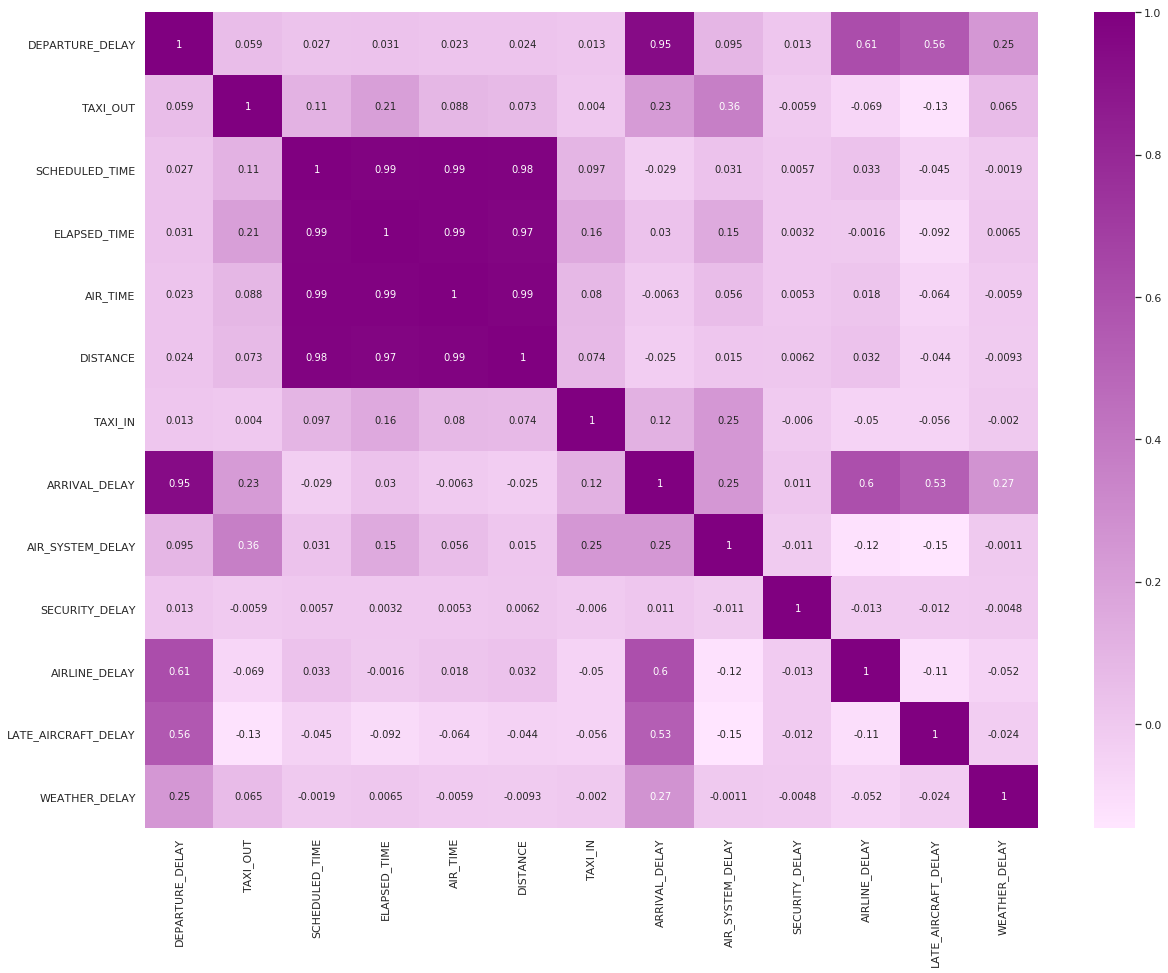

In [47]:
cmap = sns.light_palette("purple", as_cmap=True)
plt.subplots(figsize=(20,15))
sns.heatmap(train_set_float.corr(), annot=True, cmap=cmap)
plt.show()

<br><font size="4" face="Futura">
<strong>3-2-2 Spearman Correlation</strong> 

<br><font size="6" face="Futura">
<strong>4-1 First OLS</strong>

In [12]:
model = sm.OLS.from_formula("ARRIVAL_DELAY ~ scale(DEPARTURE_DELAY) + scale(AIR_SYSTEM_DELAY) + scale(AIRLINE_DELAY) +\
scale(LATE_AIRCRAFT_DELAY) + scale(WEATHER_DELAY)", data=train_set)
result = model.fit()
print(result.summary())
%notify

                            OLS Regression Results                            
Dep. Variable:          ARRIVAL_DELAY   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                 1.532e+07
Date:                Sat, 08 Dec 2018   Prob (F-statistic):               0.00
Time:                        15:38:17   Log-Likelihood:            -1.7868e+07
No. Observations:             4857025   AIC:                         3.574e+07
Df Residuals:                 4857019   BIC:                         3.574e+07
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

UsageError: Line magic function `%notify` not found.


/Users/emjayahn/.pyenv/versions/3.7.0/envs/dss/lib/python3.7/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/emjayahn/.pyenv/versions/3.7.0/envs/dss/lib/python3.7/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


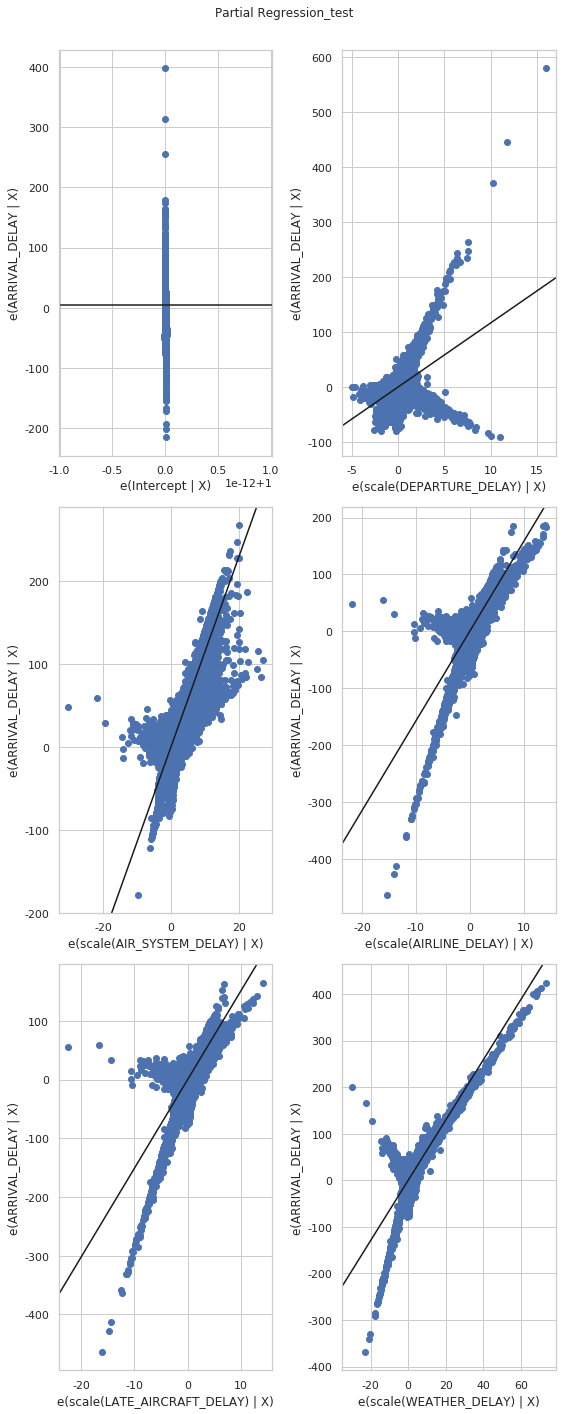

UsageError: Line magic function `%notify` not found.


In [14]:
%matplotlib inline
fig = plt.figure(figsize=(8, 20))
sm.graphics.plot_partregress_grid(result, fig=fig)
fig.suptitle("Partial Regression_test")
plt.show()
%notify

In [15]:
model_except_weather_delay = sm.OLS.from_formula("ARRIVAL_DELAY ~ scale(DEPARTURE_DELAY) + scale(AIR_SYSTEM_DELAY) + scale(AIRLINE_DELAY) +\
scale(LATE_AIRCRAFT_DELAY)", data=train_set)
result_except_weather_delay = model_except_weather_delay.fit()
%notify

UsageError: Line magic function `%notify` not found.


In [16]:
model_weather_delay = sm.OLS.from_formula("WEATHER_DELAY ~ scale(DEPARTURE_DELAY) + scale(AIR_SYSTEM_DELAY) + scale(AIRLINE_DELAY) +\
scale(LATE_AIRCRAFT_DELAY)", data=train_set)
result_weather_delay = model_weather_delay.fit()
%notify

UsageError: Line magic function `%notify` not found.


In [17]:
train_set['EXCEPT_WEATHER_DELAY_RESID'] = result_except_weather_delay.resid 
train_set['WEATHER_DELAY_RESID'] = result_weather_delay.resid

In [ ]:
def assign(df):
    if (df['EXCEPT_WEATHER_DELAY_RESID'] >=0)&(df['WEATHER_DELAY_RESID']<0):
        return 0
    elif(df['EXCEPT_WEATHER_DELAY_RESID'])

In [36]:
train_set['WEATHER_CATEGORY'] = train_set.apply(lambda df: 0 if (df['EXCEPT_WEATHER_DELAY_RESID'] >=0)&(df['WEATHER_DELAY_RESID']<0) \
                                                else (1 if (df['EXCEPT_WEATHER_DELAY_RESID'] < 0)&(df['WEATHER_DELAY_RESID']<0)\
                                                else (2 if (df['EXCEPT_WEATHER_DELAY_RESID'] < 0)&(df['WEATHER_DELAY_RESID']>0)\
                                                    else 3)), axis=1)
%notify

<IPython.core.display.Javascript object>


# 박사님 코멘트 수행

In [37]:
model_emjay = sm.OLS.from_formula("ARRIVAL_DELAY ~ scale(DEPARTURE_DELAY) + scale(AIR_SYSTEM_DELAY) + scale(AIRLINE_DELAY) +\
scale(LATE_AIRCRAFT_DELAY) + scale(WEATHER_DELAY) + C(WEATHER_CATEGORY):WEATHER_DELAY + 0", data=train_set)
result_emjay = model_emjay.fit()
print(result_emjay.summary())
%notify

                            OLS Regression Results                            
Dep. Variable:          ARRIVAL_DELAY   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                 9.576e+06
Date:                Sat, 08 Dec 2018   Prob (F-statistic):               0.00
Time:                        16:46:59   Log-Likelihood:            -1.7868e+07
No. Observations:             4857025   AIC:                         3.574e+07
Df Residuals:                 4857016   BIC:                         3.574e+07
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


<IPython.core.display.Javascript object>

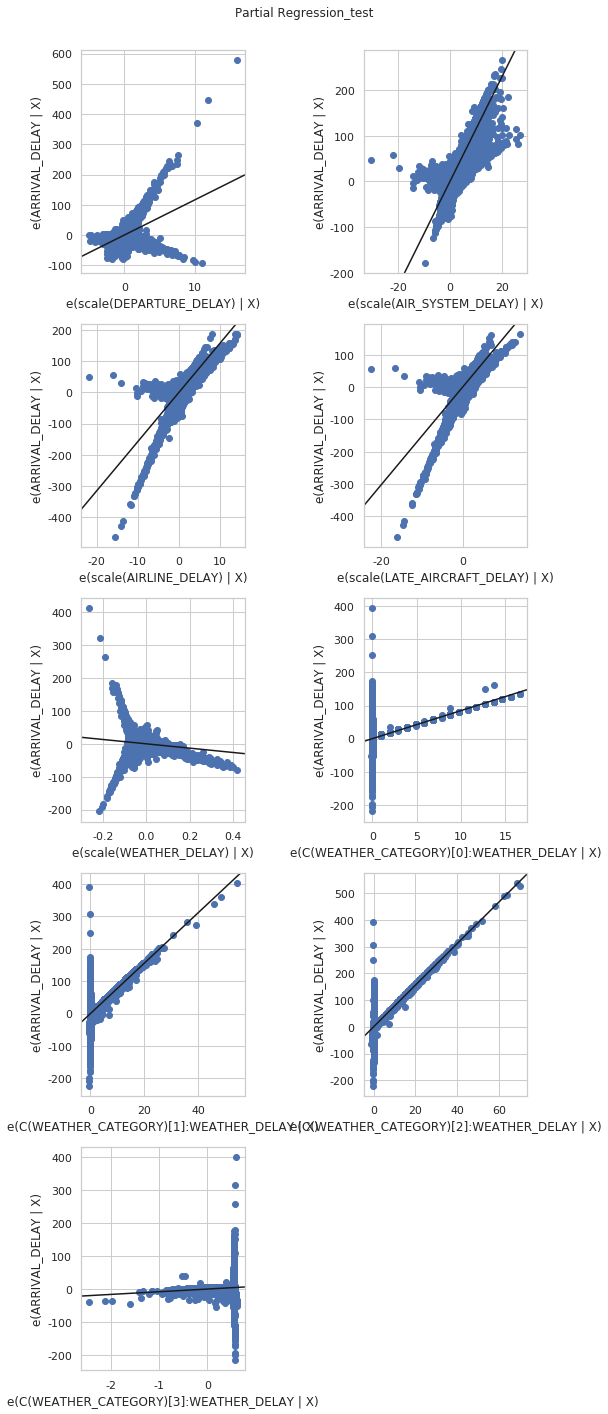

<IPython.core.display.Javascript object>

In [38]:
fig = plt.figure(figsize=(8, 20))
sm.graphics.plot_partregress_grid(result_emjay, fig=fig)
fig.suptitle("Partial Regression_test")
plt.show()
%notify

In [42]:
df = train_set[train_set['WEATHER_CATEGORY'] == 0]
df1 = train_set[train_set['WEATHER_CATEGORY'] == 1]
df2 = train_set[train_set['WEATHER_CATEGORY'] == 2]
df3 = train_set[train_set['WEATHER_CATEGORY'] == 3]

In [43]:
print(df.shape)
print(df1.shape)
print(df2.shape)
print(df3.shape)

(983311, 34)
(1043168, 34)
(1343196, 34)
(1487350, 34)


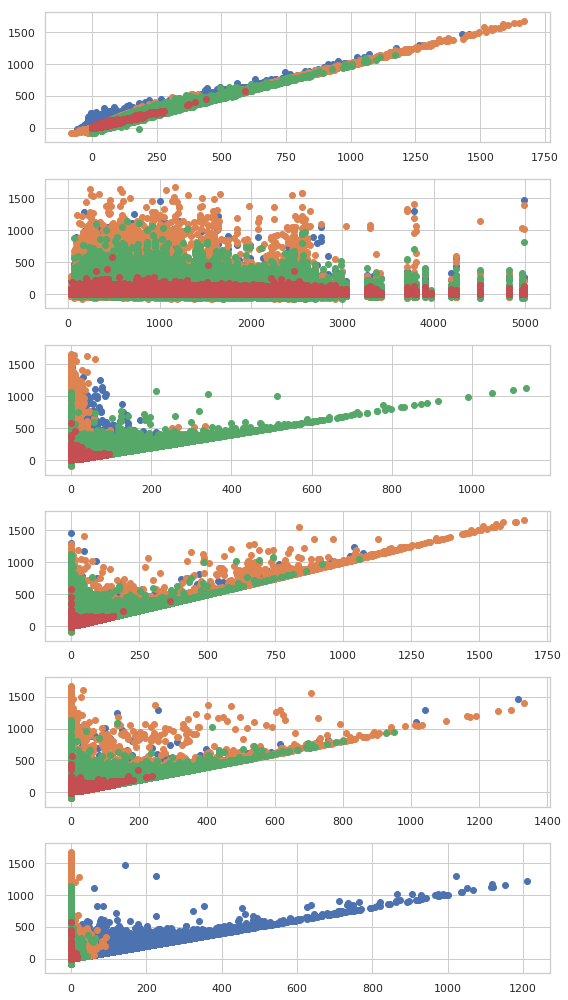

<IPython.core.display.Javascript object>

In [44]:
plt.figure(figsize=(8,14))

plt.subplot(611)
plt.scatter(y=df3['ARRIVAL_DELAY'], x=df3['DEPARTURE_DELAY'])
plt.scatter(y=df2['ARRIVAL_DELAY'], x=df2['DEPARTURE_DELAY'])
plt.scatter(y=df1['ARRIVAL_DELAY'], x=df1['DEPARTURE_DELAY'])
plt.scatter(y=df['ARRIVAL_DELAY'], x=df['DEPARTURE_DELAY'])


plt.subplot(612)
plt.scatter(y=df3['ARRIVAL_DELAY'], x=df3['DISTANCE'])
plt.scatter(y=df2['ARRIVAL_DELAY'], x=df2['DISTANCE'])
plt.scatter(y=df1['ARRIVAL_DELAY'], x=df1['DISTANCE'])
plt.scatter(y=df['ARRIVAL_DELAY'], x=df['DISTANCE'])

plt.subplot(613)
plt.scatter(y=df3['ARRIVAL_DELAY'], x=df3['AIR_SYSTEM_DELAY'])
plt.scatter(y=df2['ARRIVAL_DELAY'], x=df2['AIR_SYSTEM_DELAY'])
plt.scatter(y=df1['ARRIVAL_DELAY'], x=df1['AIR_SYSTEM_DELAY'])
plt.scatter(y=df['ARRIVAL_DELAY'], x=df['AIR_SYSTEM_DELAY'])


plt.subplot(614)
plt.scatter(y=df3['ARRIVAL_DELAY'], x=df3['AIRLINE_DELAY'])
plt.scatter(y=df2['ARRIVAL_DELAY'], x=df2['AIRLINE_DELAY'])
plt.scatter(y=df1['ARRIVAL_DELAY'], x=df1['AIRLINE_DELAY'])
plt.scatter(y=df['ARRIVAL_DELAY'], x=df['AIRLINE_DELAY'])


plt.subplot(615)
plt.scatter(y=df3['ARRIVAL_DELAY'], x=df3['LATE_AIRCRAFT_DELAY'])
plt.scatter(y=df2['ARRIVAL_DELAY'], x=df2['LATE_AIRCRAFT_DELAY'])
plt.scatter(y=df1['ARRIVAL_DELAY'], x=df1['LATE_AIRCRAFT_DELAY'])
plt.scatter(y=df['ARRIVAL_DELAY'], x=df['LATE_AIRCRAFT_DELAY'])


plt.subplot(616)
plt.scatter(y=df3['ARRIVAL_DELAY'], x=df3['WEATHER_DELAY'])
plt.scatter(y=df2['ARRIVAL_DELAY'], x=df2['WEATHER_DELAY'])
plt.scatter(y=df1['ARRIVAL_DELAY'], x=df1['WEATHER_DELAY'])
plt.scatter(y=df['ARRIVAL_DELAY'], x=df['WEATHER_DELAY'])


plt.tight_layout()
plt.show()
%notify

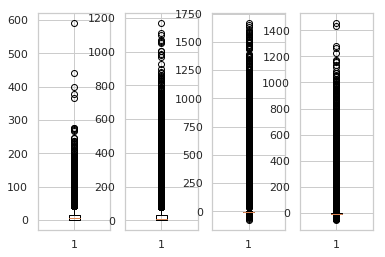

In [50]:
plt.subplot(141)
plt.boxplot(df['DEPARTURE_DELAY'])
plt.subplot(142)
plt.boxplot(df1['DEPARTURE_DELAY'])
plt.subplot(143)
plt.boxplot(df2['DEPARTURE_DELAY'])
plt.subplot(144)
plt.boxplot(df3['DEPARTURE_DELAY'])

plt.show()

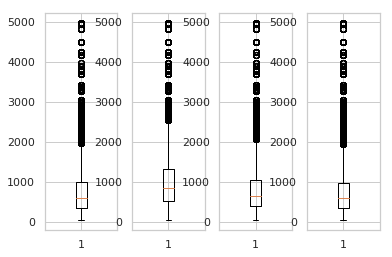

In [51]:
plt.subplot(141)
plt.boxplot(df['DISTANCE'])
plt.subplot(142)
plt.boxplot(df1['DISTANCE'])
plt.subplot(143)
plt.boxplot(df2['DISTANCE'])
plt.subplot(144)
plt.boxplot(df3['DISTANCE'])

plt.show()

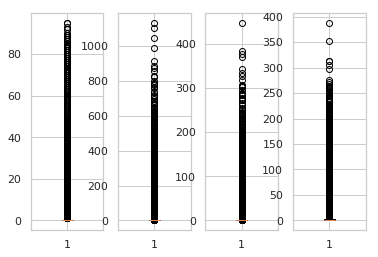

In [53]:
plt.subplot(141)
plt.boxplot(df['AIR_SYSTEM_DELAY'])
plt.subplot(142)
plt.boxplot(df1['AIR_SYSTEM_DELAY'])
plt.subplot(143)
plt.boxplot(df2['AIR_SYSTEM_DELAY'])
plt.subplot(144)
plt.boxplot(df3['AIR_SYSTEM_DELAY'])

plt.show()

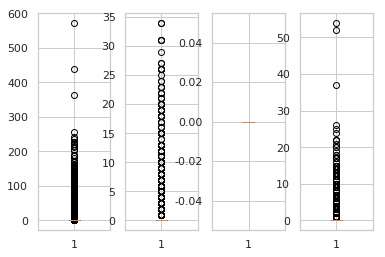

In [54]:
plt.subplot(141)
plt.boxplot(df['SECURITY_DELAY'])
plt.subplot(142)
plt.boxplot(df1['SECURITY_DELAY'])
plt.subplot(143)
plt.boxplot(df2['SECURITY_DELAY'])
plt.subplot(144)
plt.boxplot(df3['SECURITY_DELAY'])

plt.show()

In [46]:
df.describe(include=[np.number]).T

count          mean          std          min  \
YEAR                        4857025.0  2.015000e+03     0.000000  2015.000000   
MONTH                       4857025.0  6.548327e+00     3.397523     1.000000   
DAY                         4857025.0  1.570979e+01     8.773681     1.000000   
DAY_OF_WEEK                 4857025.0  3.932921e+00     1.985966     1.000000   
FLIGHT_NUMBER               4857025.0  2.163822e+03  1754.305510     1.000000   
SCHEDULED_DEPARTURE         4857025.0  1.328863e+03   483.497252     1.000000   
DEPARTURE_TIME              4857025.0  1.335033e+03   496.401044     1.000000   
DEPARTURE_DELAY             4857025.0  9.299522e+00    36.858879   -82.000000   
TAXI_OUT                    4857025.0  1.606172e+01     8.874939     1.000000   
WHEELS_OFF                  4857025.0  1.357057e+03   497.999379     1.000000   
SCHEDULED_TIME              4857025.0  1.419010e+02    75.301963    18.000000   
ELAPSED_TIME                4857025.0  1.370102e+02    74.196657    14.000000   
AIR_TIME                    4857025.0  1.135195e+02    72.218904     7.000000   
DISTANCE                    4857025.0  8.245208e+02   608.510022    31.000000   
WHEELS_ON                   4857025.0  1.471285e+03   521.860814     1.000000   
TAXI_IN                     4857025.0  7.428956e+00     5.621112     1.000000   
SCHEDULED_ARRIVAL           4857025.0  1.493216e+03   506.859284     1.000000   
ARRIVAL_TIME                4857025.0  1.476329e+03   525.975290     1.000000   
ARRIVAL_DELAY               4857025.0  4.408727e+00    39.239286   -87.000000   
DIVERTED                    4857025.0  0.000000e+00     0.000000     0.000000   
CANCELLED                   4857025.0  0.000000e+00     0.000000     0.000000   
CANCELLATION_REASON         4857025.0  0.000000e+00     0.000000     0.000000   
AIR_SYSTEM_DELAY            4857025.0  2.506144e+00    13.126961     0.000000   
SECURITY_DELAY              4857025.0  1.431741e-02     0.950556     0.000000   
AIRLINE_DELAY               4857025.0  3.530251e+00    21.981404     0.000000   
LATE_AIRCRAFT_DELAY         4857025.0  4.368538e+00    20.781166     0.000000   
WEATHER_DELAY               4857025.0  5.437322e-01     8.906282     0.000000   
EXCEPT_WEATHER_DELAY_RESID  4857025.0  1.618244e-15    10.728652  -368.167493   
WEATHER_DELAY_RESID         4857025.0 -4.067145e-16     6.642105  -267.656814   
WEATHER_CATEGORY            4857025.0  1.686549e+00     1.110205     0.000000   

                                    25%          50%          75%          max  
YEAR                        2015.000000  2015.000000  2015.000000  2015.000000  
MONTH                          4.000000     7.000000     9.000000    12.000000  
DAY                            8.000000    16.000000    23.000000    31.000000  
DAY_OF_WEEK                    2.000000     4.000000     6.000000     7.000000  
FLIGHT_NUMBER                727.000000  1681.000000  3210.000000  9320.000000  
SCHEDULED_DEPARTURE          916.000000  1325.000000  1730.000000  2359.000000  
DEPARTURE_TIME               921.000000  1330.000000  1740.000000  2400.000000  
DEPARTURE_DELAY               -5.000000    -2.000000     7.000000  1670.000000  
TAXI_OUT                      11.000000    14.000000    19.000000   225.000000  
WHEELS_OFF                   935.000000  1343.000000  1754.000000  2400.000000  
SCHEDULED_TIME                85.000000   123.000000   174.000000   718.000000  
ELAPSED_TIME                  82.000000   118.000000   168.000000   766.000000  
AIR_TIME                      60.000000    94.000000   144.000000   690.000000  
DISTANCE                     373.000000   650.000000  1065.000000  4983.000000  
WHEELS_ON                   1054.000000  1508.000000  1911.000000  2400.000000  
TAXI_IN                        4.000000     6.000000     9.000000   248.000000  
SCHEDULED_ARRIVAL           1110.000000  1520.000000  1917.000000  2400.000000  
ARRIVAL_TIME                1058.000000  1512.000000  1916.000

In [58]:
model_w= sm.OLS.from_formula("ARRIVAL_DELAY ~ scale(DEPARTURE_DELAY) + scale(AIR_SYSTEM_DELAY) + scale(AIRLINE_DELAY) +\
scale(LATE_AIRCRAFT_DELAY) + scale(WEATHER_DELAY) + C(WEATHER_CATEGORY) + 0", data=df)
result_w = model_w.fit()
print(result_w.summary())
%notify

                            OLS Regression Results                            
Dep. Variable:          ARRIVAL_DELAY   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                 2.779e+06
Date:                Sat, 01 Dec 2018   Prob (F-statistic):               0.00
Time:                        18:10:06   Log-Likelihood:            -2.8284e+06
No. Observations:              983311   AIC:                         5.657e+06
Df Residuals:                  983305   BIC:                         5.657e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
C(WEATHER_CATEGORY)[

<IPython.core.display.Javascript object>

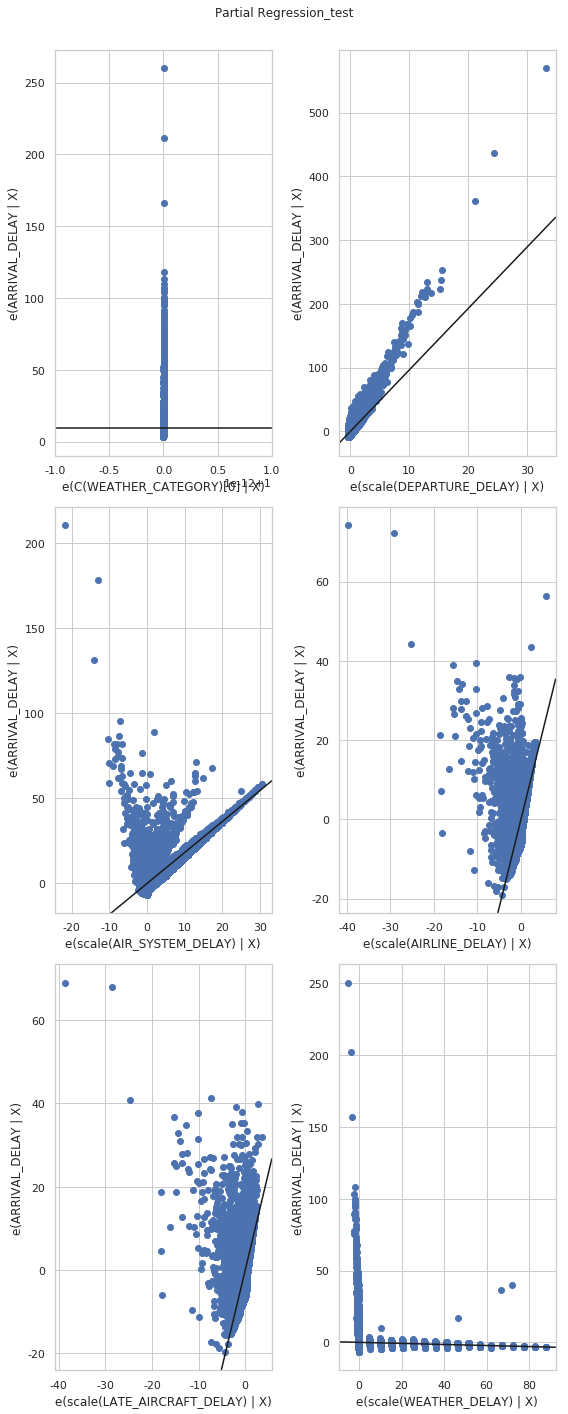

<IPython.core.display.Javascript object>

In [59]:
fig = plt.figure(figsize=(8, 20))
sm.graphics.plot_partregress_grid(result_w, fig=fig)
fig.suptitle("Partial Regression_test")
plt.show()
%notify

In [60]:
model_w1= sm.OLS.from_formula("ARRIVAL_DELAY ~ scale(DEPARTURE_DELAY) + scale(AIR_SYSTEM_DELAY) + scale(AIRLINE_DELAY) +\
scale(LATE_AIRCRAFT_DELAY) + scale(WEATHER_DELAY) + C(WEATHER_CATEGORY) + 0", data=df1)
result_w1 = model_w1.fit()
print(result_w1.summary())
%notify

                            OLS Regression Results                            
Dep. Variable:          ARRIVAL_DELAY   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                 1.601e+07
Date:                Sat, 01 Dec 2018   Prob (F-statistic):               0.00
Time:                        18:14:12   Log-Likelihood:            -1.4111e+07
No. Observations:             3873714   AIC:                         2.822e+07
Df Residuals:                 3873708   BIC:                         2.822e+07
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
C(WEATHER_CATEGORY)[

<IPython.core.display.Javascript object>

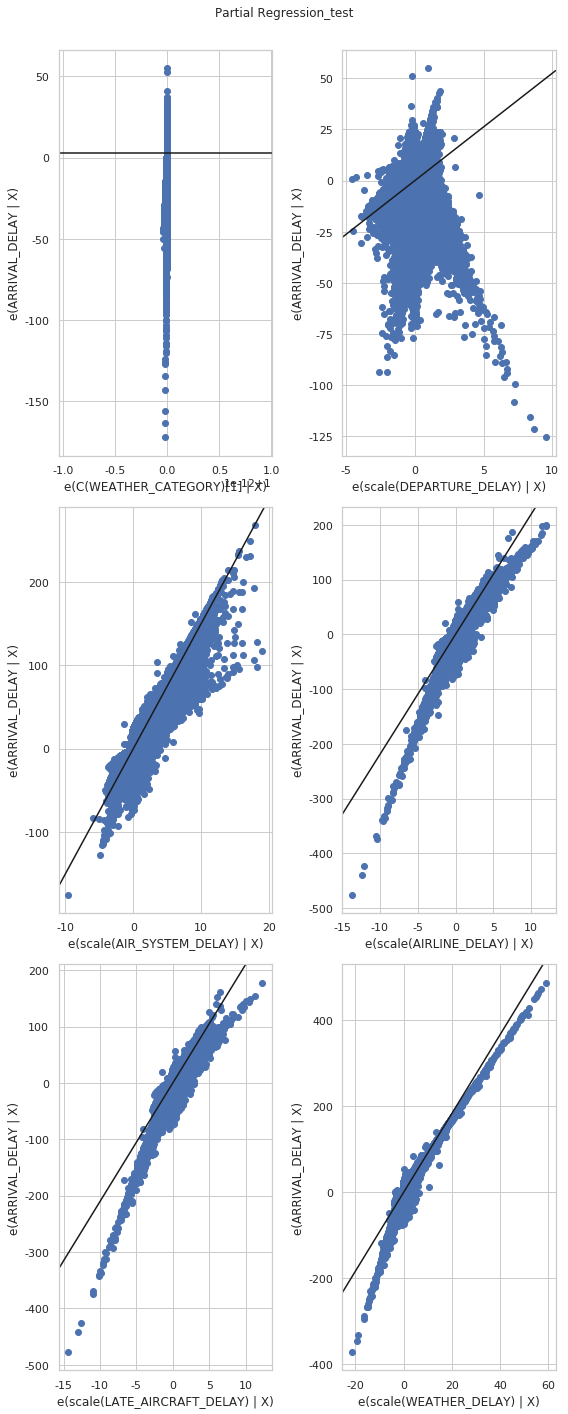

<IPython.core.display.Javascript object>

In [61]:
fig = plt.figure(figsize=(8, 20))
sm.graphics.plot_partregress_grid(result_w1, fig=fig)
fig.suptitle("Partial Regression_test")
plt.show()
%notify

In [ ]:
df = train_set[train_set['WEATHER_CATEGORY'] == 0]
df1 = train_set[train_set['WEATHER_CATEGORY'] == 1]

In [ ]:
model_w= sm.OLS.from_formula("ARRIVAL_DELAY ~ scale(DEPARTURE_DELAY) + scale(AIR_SYSTEM_DELAY) + scale(AIRLINE_DELAY) +\
scale(LATE_AIRCRAFT_DELAY) + scale(WEATHER_DELAY) + C(WEATHER_CATEGORY) + 0", data=train_set)
result_w = model_w.fit()
print(result_w.summary())
%notify

<br><font size="6" face="Futura">
<strong>3-2 Data Cleaning</strong> _Airports_

- df 데이터셋의 공항 컬럼에는 IATA(International Air Transport Association) 코드를 부여받지 못한 공항들이 포함되어 있습니다.
- airports 데이터셋에서 확인할 수 없는 공항에서 뜨고 내린 항공 자료는 제외합니다.
- 데이터셋에서 `ORIGIN_AIRPORT` (출발공항), `DESTINATION_AIRPORT` (도착공항)의 수는 `928`개 입니다.

In [10]:
# df 데이터셋에 등장하는 공항의 수
print("train_set의 출발공항 수는 : {}"\
      .format(len(train_set["ORIGIN_AIRPORT"].unique())))
print("train_set의 도착공항 수는 : {}"\
      .format(len(train_set["DESTINATION_AIRPORT"].unique())))

train_set의 출발공항 수는 : 928
train_set의 도착공항 수는 : 926


In [11]:
# airports 데이터셋에 등장하는 공항의 수
print("우리가 알고있는 미국내 공항 정보의 수 : {}"\
      .format(len(data_airports['IATA_CODE'].unique())))

우리가 알고있는 미국내 공항 정보의 수 : 322


In [13]:
# IATA 등록 공항들 리스트로 뽑기
US_AIRPORTS = data_airports['IATA_CODE'].unique()
print("미국 내 공항의 수: {}".format(len(US_AIRPORTS)))

# ORIGIN_AIRPORT중 US_AIRPORTS 리스트에 있는 값들만 남기기
train_set = train_set[train_set['ORIGIN_AIRPORT'].isin(US_AIRPORTS) & \
        train_set['DESTINATION_AIRPORT'].isin(US_AIRPORTS)].reset_index()


미국 내 공항의 수: 322


<br><font size="6" face="Futura">
<strong>3-3 EDA</strong> FROM_HOLIDAY  IS_HOLIDAY

- YEAR 와 MONTH, DAY 를 한 `DATE` 컬럼으로 합칩니다.

- FROM_HOLIDAY : 가장 가까운 공휴일에서 떨어진 일 수

In [15]:
train_set['DATE'] = pd.to_datetime(train_set[['YEAR', 'MONTH', 'DAY']], format='%y/%m/%d')


In [16]:
holidays = [(1, 1), (1, 19), (2, 16), (5, 25), (7, 3), (9, 9), (11, 11), (11, 26), (12, 25)]

def from_holiday(input_date):
    """
    10개의 기념일에서 몇일 떨어져 있는지 를 계산 한후, 가장 가까운 기념일과의 차이를 구하는 함수입니다. 
    parameter: type: datetime.date - 변환하고자 하는 날짜를 datetime.date형식으로 넣어줍니다.
    return : type: int
    """
    # difference[holiday] = date - holiday 형식으로 dict에 정리
    difference = {}
    
    for holiday in holidays:
        diff = input_date - datetime.date(2015, holiday[0], holiday[1])
        # 차이가 음수값이 나올 수 있으니 절댓값으로 저장
        difference[holiday] = abs(diff.days)
        
    # value값들 중 minimum 을 리턴하기. 
    return min(difference.values())

In [17]:
train_set['FROM_HOLIDAY'] = train_set['DATE'].dt.date.apply(lambda date : from_holiday(date))


- IS_HOLIDAY : 공휴일, 토요일, 일요일 인 경우 1

In [18]:
def is_holiday(from_holiday, day_of_week):
    if (from_holiday == 0) | (day_of_week == 6) | (day_of_week == 7):
        return 1
    else:
        return -1

In [20]:
train_set['IS_HOLIDAY'] = train_set.apply(lambda df:is_holiday(df['FROM_HOLIDAY'], df['DAY_OF_WEEK']), axis=1)

<br><font size="6" face="Futura">
<strong>3-4 EDA</strong> _DIRECTION_

- data_airport csv 파일에 있는 공항별 위도, 경도 값을 가져와 공항별로 맞추어줍니다.

In [21]:
# AIRPORTS LAT, LONG FROM AIRPORTS.CSV
origin_lat_long = data_airports[['IATA_CODE', 'LONGITUDE']]
origin_lat_long = origin_lat_long.rename(columns={'IATA_CODE' : "ORIGIN_AIRPORT", "LONGITUDE" : "ORIGIN_LONGITUDE"})
train_set = pd.merge(train_set, origin_lat_long, how="left")
train_set.tail()

destination_lat_long = origin_lat_long.rename(columns={'ORIGIN_AIRPORT' : "DESTINATION_AIRPORT", "ORIGIN_LONGITUDE" : "DESTINATION_LONGITUDE"})
destination_lat_long.head()
train_set = pd.merge(train_set, destination_lat_long, how="left")
train_set.head()

index  YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0      0  2015      1    1            4      AS             98      N407AS   
1      1  2015      1    1            4      US            840      N171US   
2      2  2015      1    1            4      AA            258      N3HYAA   
3      3  2015      1    1            4      AS            135      N527AS   
4      4  2015      1    1            4      DL            806      N3730B   

  ORIGIN_AIRPORT DESTINATION_AIRPORT          ...            AIR_SYSTEM_DELAY  \
0            ANC                 SEA          ...                         NaN   
1            SFO                 CLT          ...                         NaN   
2            LAX                 MIA          ...                         NaN   
3            SEA                 ANC          ...                         NaN   
4            SFO                 MSP          ...                         NaN   

   SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  WEATHER_DELAY  \
0             NaN            NaN                  NaN            NaN   
1             NaN            NaN                  NaN            NaN   
2             NaN            NaN                  NaN            NaN   
3             NaN            NaN                  NaN            NaN   
4             NaN            NaN                  NaN            NaN   

        DATE  FROM_HOLIDAY  IS_HOLIDAY  ORIGIN_LONGITUDE  \
0 2015-01-01             0           1        -149.99619   
1 2015-01-01             0           1        -122.37484   
2 2015-01-01             0           1        -118.40807   
3 2015-01-01             0           1        -122.30931   
4 2015-01-01             0           1        -122.37484   

   DESTINATION_LONGITUDE  
0             -122.30931  
1              -80.94313  
2              -80.29056  
3             -149.99619  
4              -93.21692  

[5 rows x 34 columns]

In [22]:
def define_direction(origin_long, destination_long):
    if origin_long < destination_long:
        #동쪽으로 비행
        return 1
    else:
        #서쪽으로 비행
        return -1

In [24]:
train_set['DIRECTION'] = train_set.apply(lambda df: define_direction(df['ORIGIN_LONGITUDE'], df['DESTINATION_LONGITUDE']), axis=1)

<br><font size="6" face="Futura">
<strong>3-5 EDA</strong> _COUNT_

- COUNT : 

In [27]:
def converting_timeformat(data):
    """
    data 상에 시각 표현을 00:00:00 형태로 변경하는 함수입니다.
    parameter : dataframe 내의 시간 형식을 바꾸고 싶은 column 의 element 를 의미합니다.
    return : 00:00:00 형식에 맞는 datetime.time 자료형이 return 됩니다.
    """
    if np.isnan(data):
        new_time_format = np.nan
    else:
        padding = "{:04d}".format(int(data))
        if padding == "2400":
            padding = "0000"
        new_time_format = datetime.time(int(padding[0:2]), int(padding[2:4]))
    
    return new_time_format

In [28]:
train_set['SCHEDULED_DEPARTURE'] = train_set['SCHEDULED_DEPARTURE'].apply(converting_timeformat)
train_set['SCHEDULED_ARRIVAL'] = train_set['SCHEDULED_ARRIVAL'].apply(converting_timeformat)

In [29]:
def bind_date_time(date, time):
    """
    날짜와 시각을 합쳐 epoch 형식으로 합쳐주는 함수입니다. 
    YYYY-MM-DD HH:MM:SS 형식의 datetime으로 합쳐줍니다.
    
    parameter : date(type : datetime.datetime), time(type : datetime.time)
    return : datetime.datetime - YYYY-MM-DD HH:MM:SS 
    """
    if pd.isnull(date) or pd.isnull(time):
        return np.nan
    return datetime.datetime.combine(date, time)

In [30]:
train_set['SCHEDULED_DEPARTURE_DATETIME'] = train_set.apply(lambda df:bind_date_time(df['DATE'], df['SCHEDULED_DEPARTURE']), axis=1)

In [31]:
train_set['SCHEDULED_ARRIVAL_DATETIME'] = train_set.apply(lambda df:bind_date_time(df['DATE'], df['SCHEDULED_DEPARTURE']), axis=1)

- Date_time to EPOCH TiME

In [32]:
def epoch_time(data):
    """
    OLS 를 돌리기위해 날짜,시각 data 를 epoch time 으로 변환합니다.
    parameter : 시각 data
    return : epoch time 의 timestamp
    """
    return data.timestamp()

In [33]:
train_set["SCHEDULED_DEPARTURE_DATETIME_EPOCH"] = train_set["SCHEDULED_DEPARTURE_DATETIME"].apply(epoch_time)

- COUNT 를 실제로 만드는 변수
- 매우매우 오래걸리므로, 돌리지 마십시오.

In [ ]:
# def count_flights(df, scheduled_departure):
#     idx_standard = df[df['SCHEDULED_DEPARTURE_DATETIME_EPOCH'] == scheduled_departure].index.values.astype(int)[0]

#     temp_indx = idx_standard
#     flights_after_count = 0
#     flights_before_count = 0
#     if temp_indx == 0:
#         flights_after_count += 1
#         while temp_indx <= df.shape[0]:
            
#             if df.iloc[temp_indx]['SCHEDULED_DEPARTURE_DATETIME_EPOCH'] <= scheduled_departure + 600:
#                 flights_after_count += 1
#                 temp_indx += 1

#             else:
#                 break

#     else:
#         temp_indx = idx_standard
#         while temp_indx < df.shape[0]:
#             if df.iloc[temp_indx]['SCHEDULED_DEPARTURE_DATETIME_EPOCH'] <= scheduled_departure + 600:
#                 flights_after_count += 1
#                 temp_indx += 1

#             else:
#                 break

#         temp_indx = idx_standard
#         while temp_indx >= 0:
#             if scheduled_departure - 600 <= df.iloc[temp_indx]['SCHEDULED_DEPARTURE_DATETIME_EPOCH']:
#                 flights_before_count += 1
#                 temp_indx -= 1

#             else:
#                 break
                

#     return flights_before_count + flights_after_count - 1

In [ ]:
dflist_flights_by_airport = []
for airport in airports_list:
    dflist_flights_by_airport.append(train_set[(train_set['ORIGIN_AIRPORT'] == airport)].reset_index())

In [ ]:
for df in dflist_flights_by_airport:
    df['COUNT'] = df['SCHEDULED_DEPARTURE_DATETIME_EPOCH'].apply(lambda epoch_time: count_flights(df, epoch_time))

<br><font size="6" face="Futura">
<strong>3-6 EDA</strong> _RATIO_

- 항공사 별, 기체 한대가 담당하는 노선 수

In [35]:
AIRLINE_tail_number ={
    'AS': 147, 
    'US': 351, 
    'AA': 1044, 
    'DL': 825, 
    'NK': 79, 
    'UA': 721, 
    'HA': 50, 
    'B6': 215,
    'OO': 383, 
    'EV': 390, 
    'F9': 62,
    'WN': 704, 
    'MQ': 202, 
    'VX': 57,
}

AIRLINE_flight_number ={
    'AS': 744, 
    'US': 958, 
    'AA': 2437, 
    'DL': 2445, 
    'NK': 451, 
    'UA': 1577, 
    'HA': 310, 
    'B6': 1149,
    'OO': 2036, 
    'EV': 2364, 
    'F9': 807,
    'WN': 6642, 
    'MQ': 939, 
    'VX': 317,
}

AIRLINE_tail_number
percentage = {}
for key, value in AIRLINE_tail_number.items():
    percentage[key] = AIRLINE_flight_number[key] / value

dfx = pd.DataFrame(list(percentage.keys())).rename(columns={0 : "AIRLINE"})
dfy = pd.DataFrame(list(percentage.values())).rename(columns={0 : "RATIO"})    
df_percentage = pd.concat([dfx,dfy], axis=1)
df_percentage

AIRLINE      RATIO
0       AS   5.061224
1       US   2.729345
2       AA   2.334291
3       DL   2.963636
4       NK   5.708861
5       UA   2.187240
6       HA   6.200000
7       B6   5.344186
8       OO   5.315927
9       EV   6.061538
10      F9  13.016129
11      WN   9.434659
12      MQ   4.648515
13      VX   5.561404

/Users/emjayahn/.pyenv/versions/3.7.0/envs/dss/lib/python3.7/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/emjayahn/.pyenv/versions/3.7.0/envs/dss/lib/python3.7/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


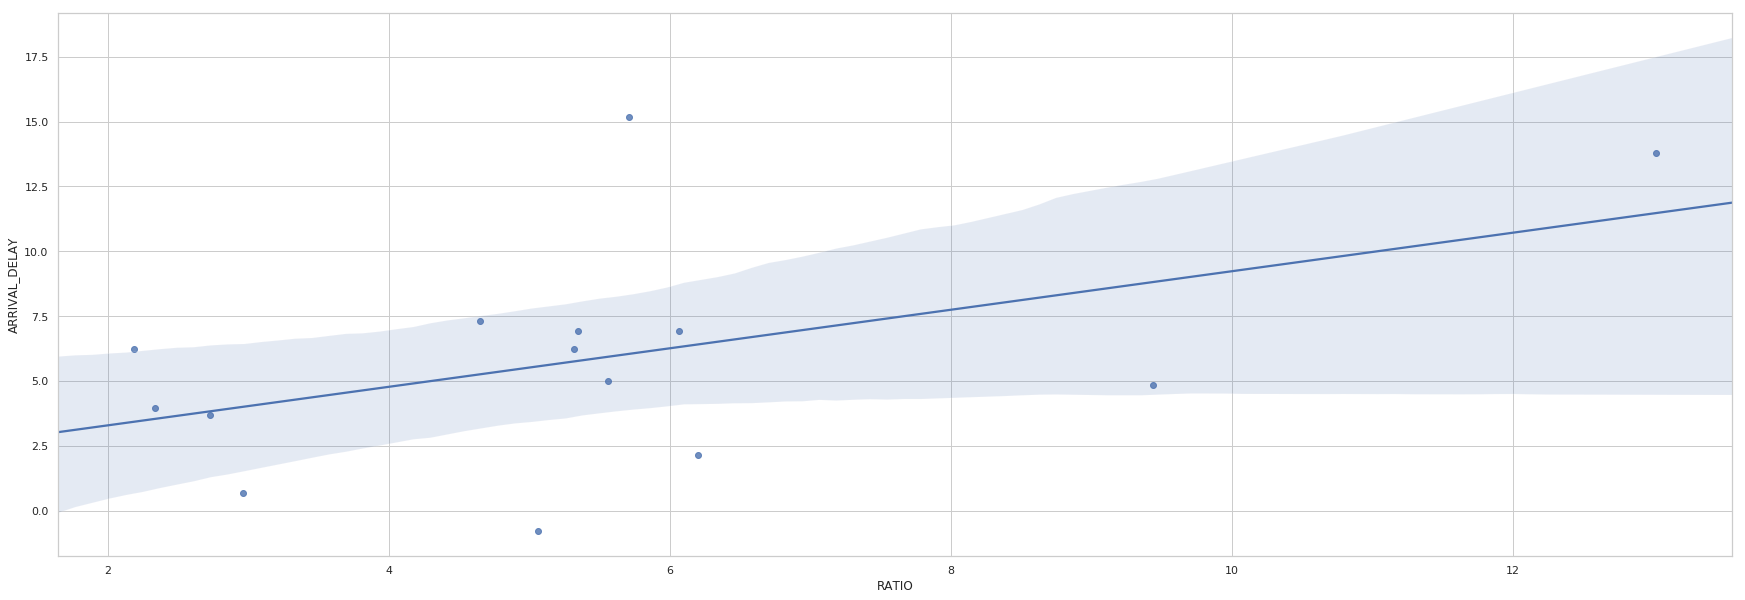

In [36]:
# df = pd.DataFrame(train_set.groupby(['AIRLINE'])['ARRIVAL_DELAY'].mean())
df = train_set.groupby(['AIRLINE'])['ARRIVAL_DELAY'].mean().reset_index()
new = pd.merge(df, df_percentage, how="left")

plt.figure(figsize=(30,10))
dfx = new['RATIO']
dfy = new['ARRIVAL_DELAY']

sns.regplot(dfx, dfy)

In [37]:
ratio_merged = pd.merge(train_set, df_percentage, how="left")

<br><font size="6" face="Futura">
<strong>3-7 EDA</strong> _Correlation_

In [43]:
# 식별번호, 시각 등의 변수는 제외하고 상관관계를 파악합니다.
train_set_float = train_set[['DEPARTURE_DELAY', 
              'TAXI_OUT', 'SCHEDULED_TIME', 'ELAPSED_TIME', 
              'AIR_TIME', 'DISTANCE', 'TAXI_IN', 'ARRIVAL_DELAY',
              'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
              'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']]
train_set_float.corr()

DEPARTURE_DELAY  TAXI_OUT  SCHEDULED_TIME  ELAPSED_TIME  \
DEPARTURE_DELAY             1.000000  0.059210        0.027363      0.030597   
TAXI_OUT                    0.059210  1.000000        0.112988      0.206851   
SCHEDULED_TIME              0.027363  0.112988        1.000000      0.985039   
ELAPSED_TIME                0.030597  0.206851        0.985039      1.000000   
AIR_TIME                    0.023053  0.088185        0.990656      0.989853   
DISTANCE                    0.023621  0.072613        0.984166      0.973213   
TAXI_IN                     0.013316  0.003974        0.097318      0.155107   
ARRIVAL_DELAY               0.945113  0.228100       -0.029008      0.030369   
AIR_SYSTEM_DELAY            0.094943  0.364356        0.030940      0.152649   
SECURITY_DELAY              0.013322 -0.005939        0.005727      0.003213   
AIRLINE_DELAY               0.614810 -0.069306        0.032863     -0.001571   
LATE_AIRCRAFT_DELAY         0.559776 -0.128084       -0.044624     -0.091977   
WEATHER_DELAY               0.245406  0.064920       -0.001882      0.006516   

                     AIR_TIME  DISTANCE   TAXI_IN  ARRIVAL_DELAY  \
DEPARTURE_DELAY      0.023053  0.023621  0.013316       0.945113   
TAXI_OUT             0.088185  0.072613  0.003974       0.228100   
SCHEDULED_TIME       0.990656  0.984166  0.097318      -0.029008   
ELAPSED_TIME         0.989853  0.973213  0.155107       0.030369   
AIR_TIME             1.000000  0.985355  0.080490      -0.006342   
DISTANCE             0.985355  1.000000  0.073812      -0.024611   
TAXI_IN              0.080490  0.073812  1.000000       0.117948   
ARRIVAL_DELAY       -0.006342 -0.024611  0.117948       1.000000   
AIR_SYSTEM_DELAY     0.056451  0.015015  0.247068       0.247565   
SECURITY_DELAY       0.005265  0.006165 -0.005968       0.011090   
AIRLINE_DELAY        0.018344  0.032132 -0.050445       0.602654   
LATE_AIRCRAFT_DELAY -0.063629 -0.044480 -0.055569       0.526830   
WEATHER_DELAY       -0.005936 -0.009318 -0.002035       0.266824   

                     AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  \
DEPARTURE_DELAY              0.094943        0.013322       0.614810   
TAXI_OUT                     0.364356       -0.005939      -0.069306   
SCHEDULED_TIME               0.030940        0.005727       0.032863   
ELAPSED_TIME                 0.152649        0.003213      -0.001571   
AIR_TIME                     0.056451        0.005265       0.018344   
DISTANCE                     0.015015        0.006165       0.032132   
TAXI_IN                      0.247068       -0.005968      -0.050445   
ARRIVAL_DELAY                0.247565        0.011090       0.602654   
AIR_SYSTEM_DELAY             1.000000       -0.010699      -0.120096   
SECURITY_DELAY              -0.010699        1.000000      -0.012866   
AIRLINE_DELAY               -0.120096       -0.012866       1.000000   
LATE_AIRCRAFT_DELAY         -0.146123       -0.011923      -0.105985   
WEATHER_DELAY               -0.001087       -0.004798      -0.052160   

                     LATE_AIRCRAFT_DELAY  WEATHER_DELAY  
DEPARTURE_DELAY                 0.559776       0.245406  
TAXI_OUT                       -0.128084       0.064920  
SCHEDULED_TIME                 -0.044624      -0.001882  
ELAPSED_TIME                   -0.091977       0.006516  
AIR_TIME                       -0.063629      -0.005936  
DISTANCE                       -0.044480      -0.009318  
TAXI_IN                        -0.055569      -0.002035  
ARRIVAL_DELAY                   0.526830       0.266824  
AIR_SYSTEM_DELAY               -0.146123      -0.001087  
SECURITY_DELAY                 -0.011923      -0.004798  
AIRLINE_DELAY                  -0.105985      -0.052160  
LATE_AIRCRAFT_DELAY             1.000000      -0.023841  
WEATHER_DELAY                  -0.023841       1.000000

/Users/emjayahn/.pyenv/versions/3.7.0/envs/dss/lib/python3.7/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


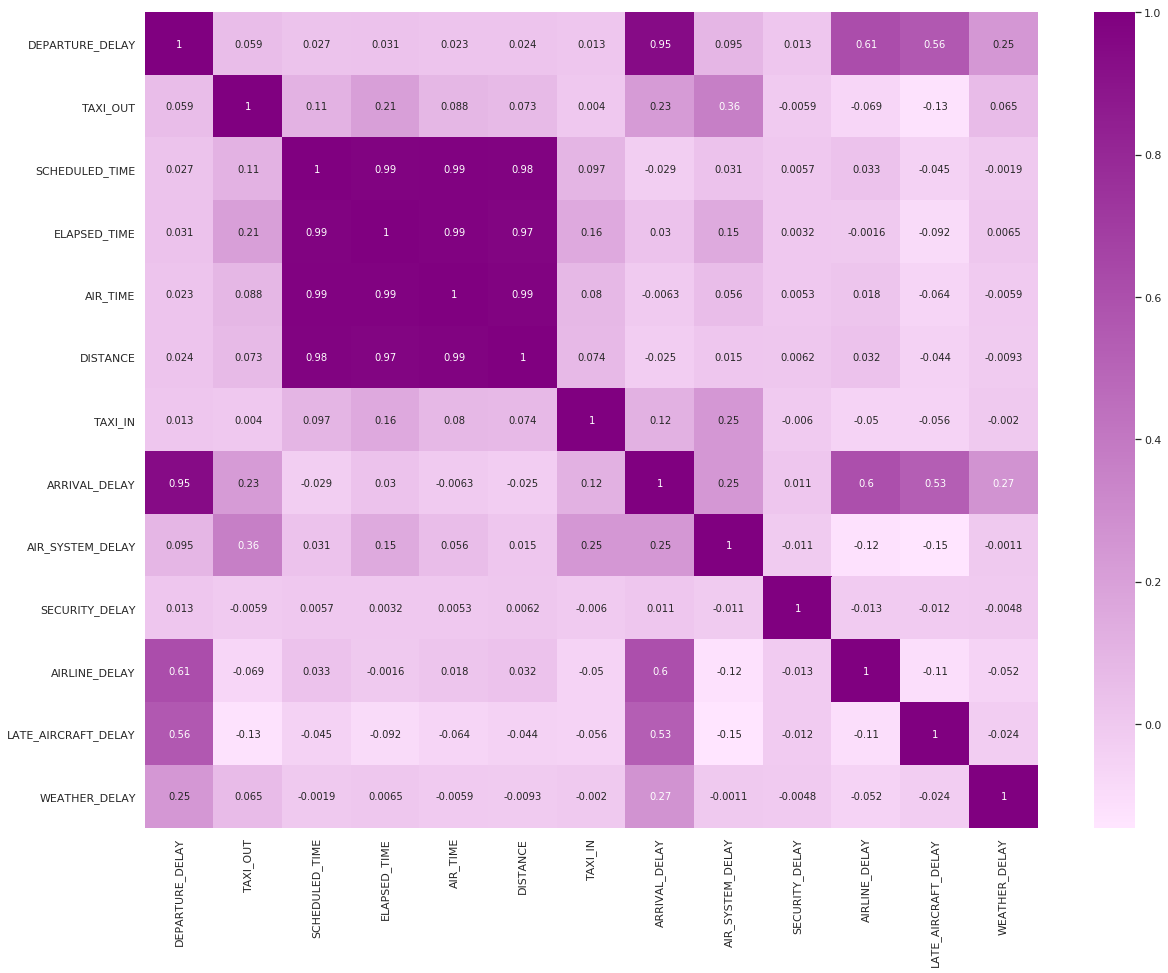

In [47]:
cmap = sns.light_palette("purple", as_cmap=True)
plt.subplots(figsize=(20,15))
sns.heatmap(train_set_float.corr(), annot=True, cmap=cmap)
plt.show()

In [49]:
train_set_category = train_set[['MONTH', 'DAY', 'DAY_OF_WEEK', \
                                'ARRIVAL_DELAY', 'FROM_HOLIDAY']]
train_set_category.corr(method='spearman')

MONTH       DAY  DAY_OF_WEEK  ARRIVAL_DELAY  FROM_HOLIDAY
MONTH          1.000000  0.005065    -0.015221      -0.051312     -0.179538
DAY            0.005065  1.000000     0.004973      -0.008299     -0.009040
DAY_OF_WEEK   -0.015221  0.004973     1.000000      -0.023763      0.000085
ARRIVAL_DELAY -0.051312 -0.008299    -0.023763       1.000000     -0.008205
FROM_HOLIDAY  -0.179538 -0.009040     0.000085      -0.008205      1.000000

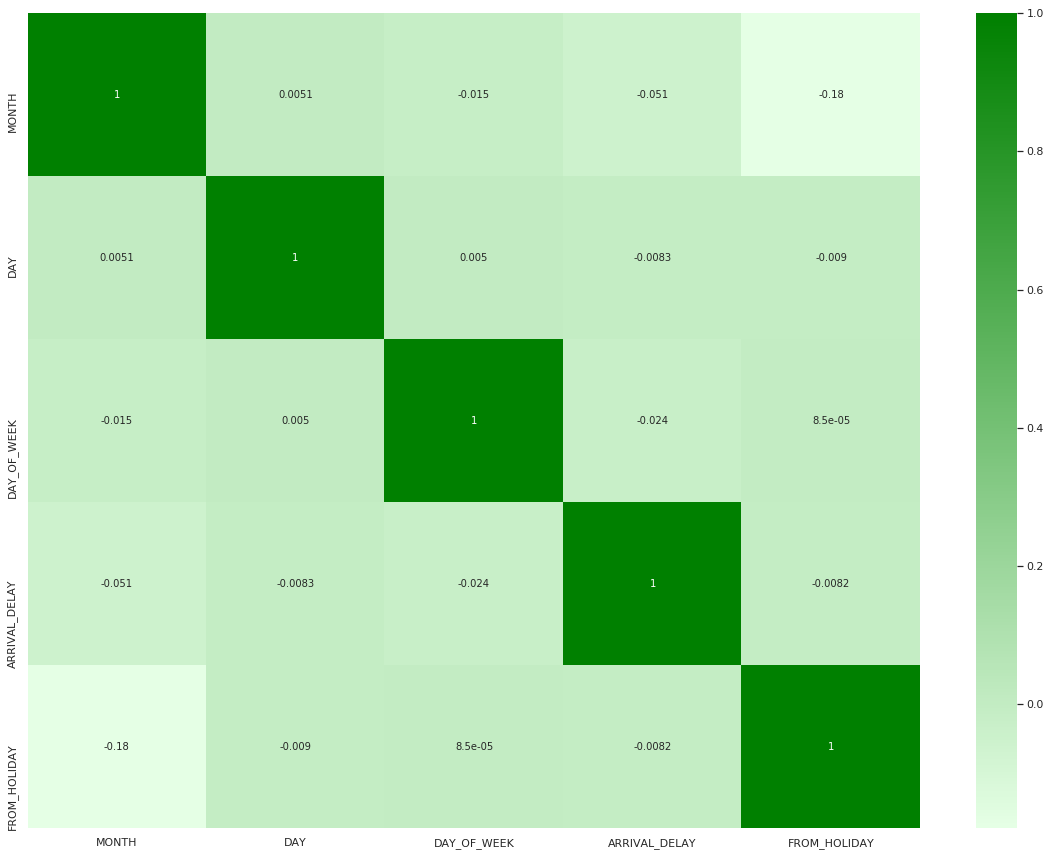

In [50]:
cmap = sns.light_palette("green", as_cmap=True)
plt.subplots(figsize=(20,15))
sns.heatmap(train_set_category.corr(method='spearman'), annot=True, cmap=cmap)
plt.show()

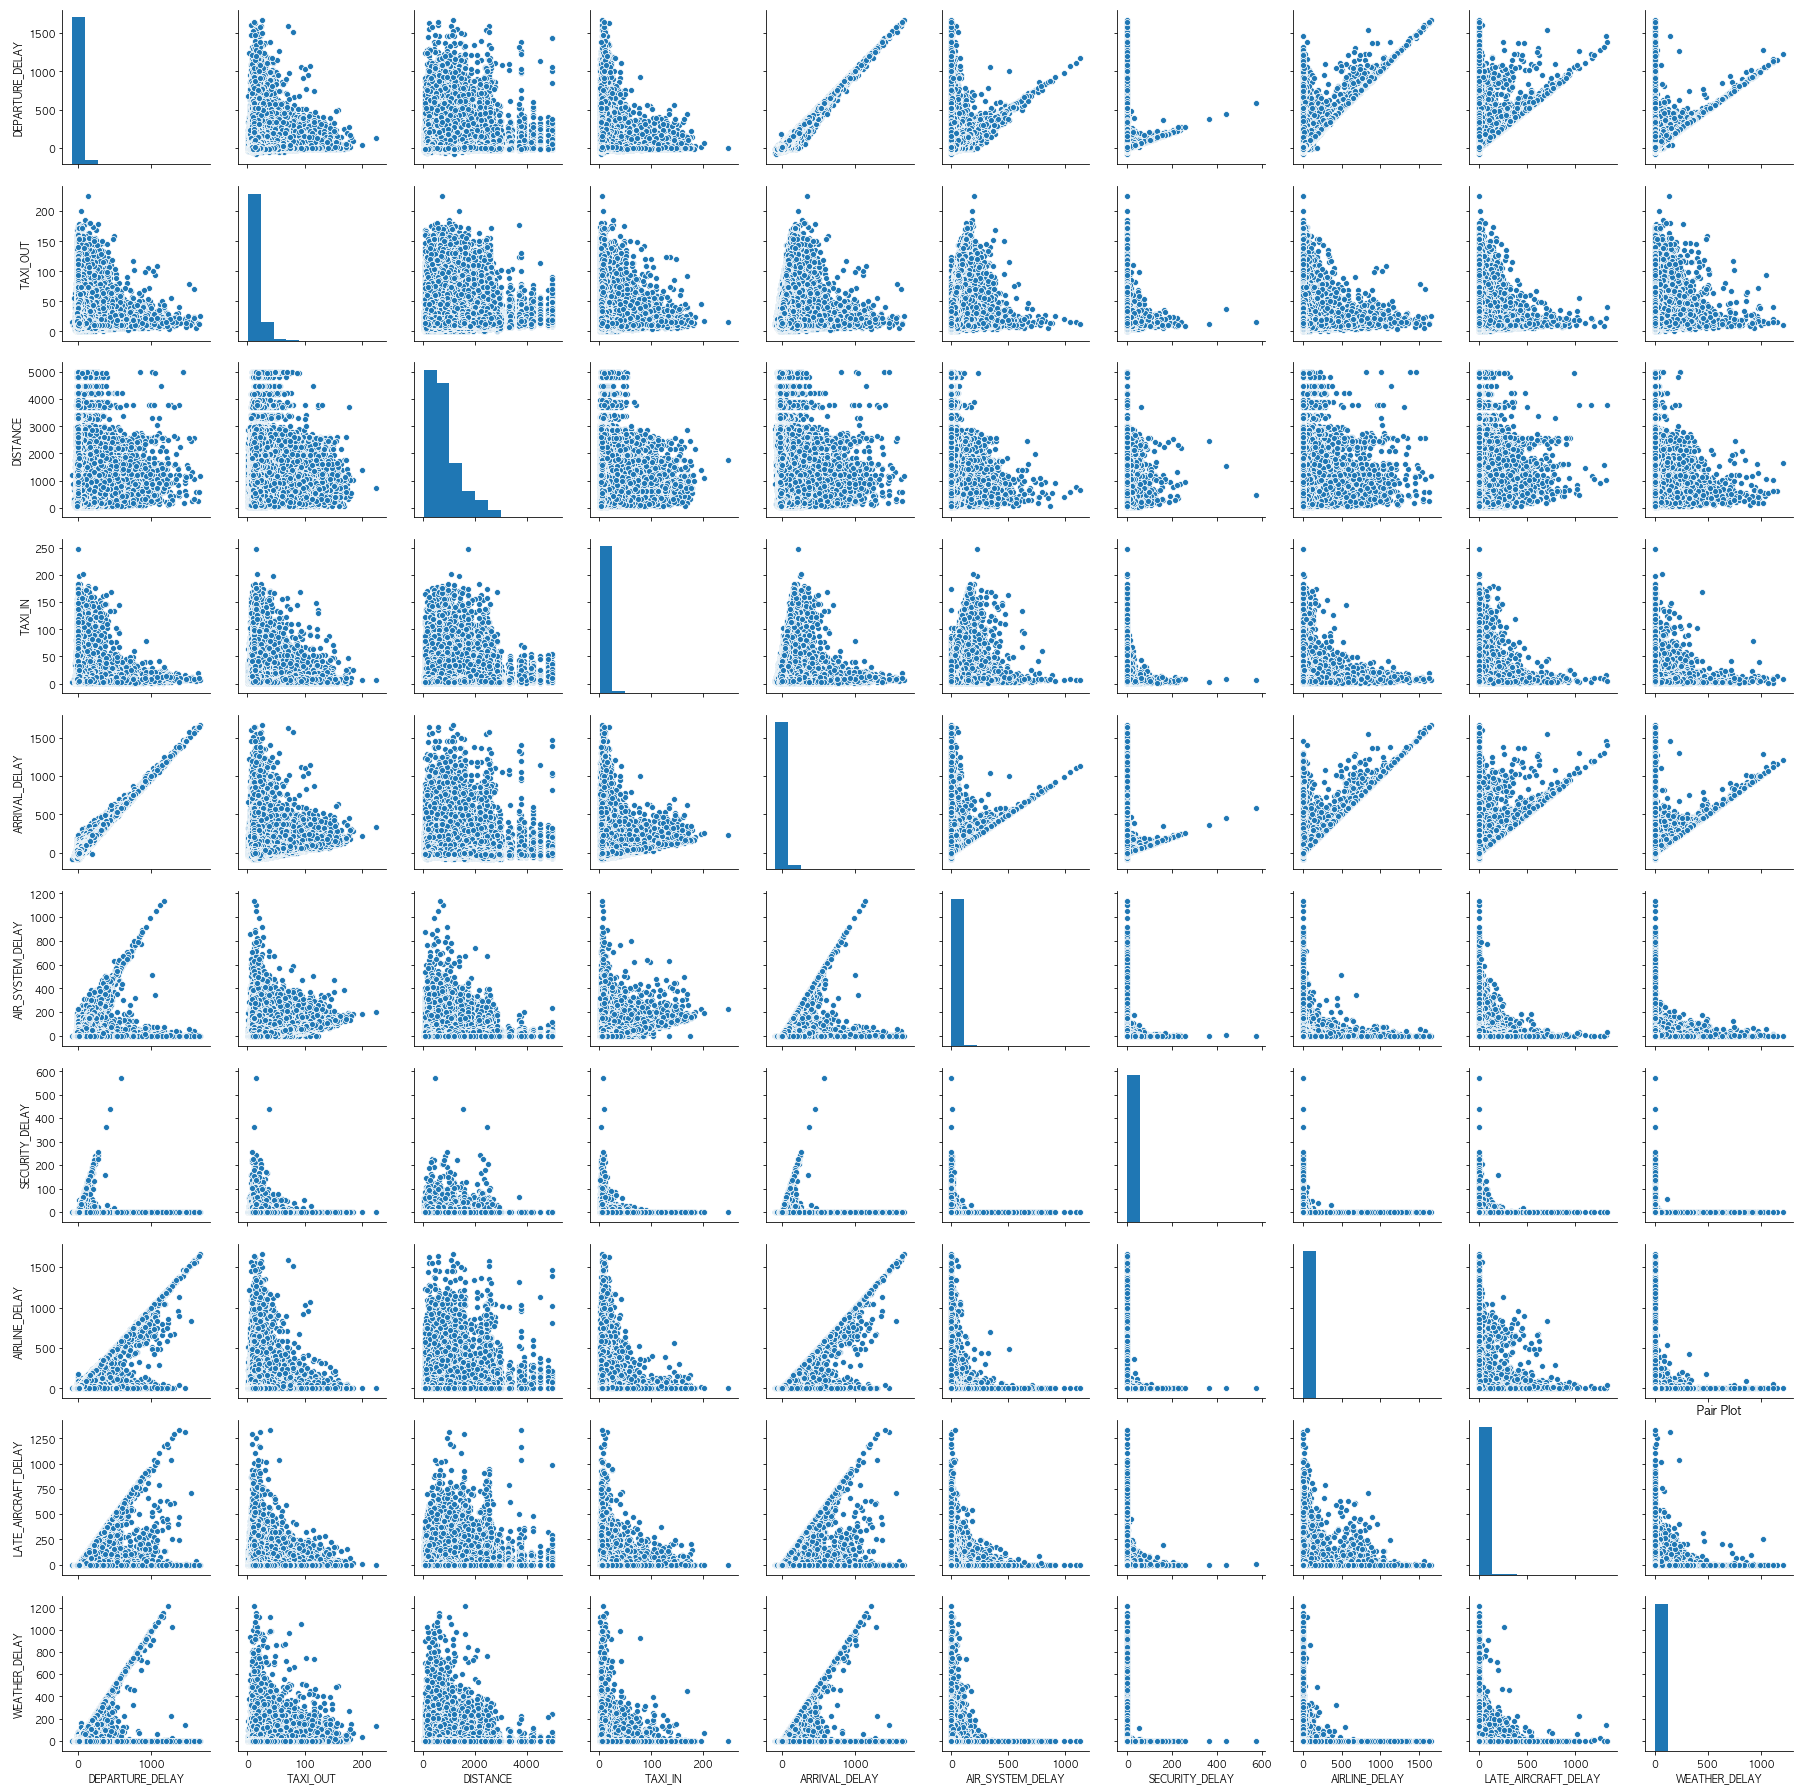

In [48]:
## 오래걸림 주의. 눈으로만 보세요
# sns.pairplot(dfxx)
# plt.title("Pair Plot")
# plt.show()

<br><br><br><br><br><div style="text-align:center">
<font size="7em" color="#214A96" face="Futura">
<strong> 4.OLS Regression </strong><br><br><br><br><br>

In [33]:
df = train_set[train_set['RESIDUAL_CATEGORY'] == 0]

In [34]:
df1 = train_set[train_set['RESIDUAL_CATEGORY'] == 1]

In [27]:
train_set.iloc[0]

YEAR                                  2015
MONTH                                    1
DAY                                      1
DAY_OF_WEEK                              4
AIRLINE                                 AS
FLIGHT_NUMBER                           98
TAIL_NUMBER                         N407AS
ORIGIN_AIRPORT                         ANC
DESTINATION_AIRPORT                    SEA
SCHEDULED_DEPARTURE                      5
DEPARTURE_TIME                        2354
DEPARTURE_DELAY                        -11
TAXI_OUT                                21
WHEELS_OFF                              15
SCHEDULED_TIME                         205
ELAPSED_TIME                           194
AIR_TIME                               169
DISTANCE                              1448
WHEELS_ON                              404
TAXI_IN                                  4
SCHEDULED_ARRIVAL                      430
ARRIVAL_TIME                           408
ARRIVAL_DELAY                          -22
AIR_SYSTEM_

In [31]:
df1['DEPARTURE_DELAY'].min()

601.0

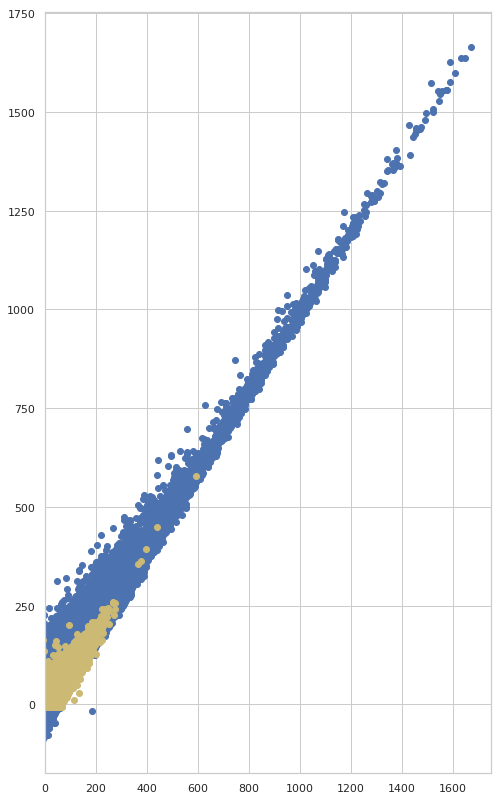

In [35]:
plt.figure(figsize=(8,14))

plt.scatter(y=df['ARRIVAL_DELAY'], x=df['DEPARTURE_DELAY'])
plt.scatter(y=df1['ARRIVAL_DELAY'], x=df1['DEPARTURE_DELAY'], c='y')
plt.xlim(0, 1750)

plt.show()

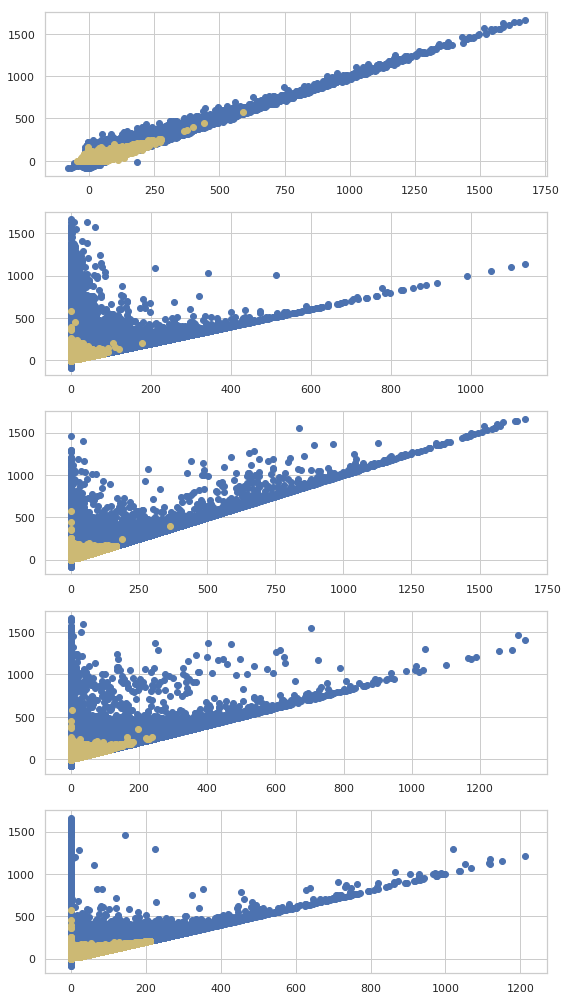

In [36]:
plt.figure(figsize=(8,14))

plt.subplot(511)
plt.scatter(y=df['ARRIVAL_DELAY'], x=df['DEPARTURE_DELAY'])
plt.scatter(y=df1['ARRIVAL_DELAY'], x=df1['DEPARTURE_DELAY'], c='y')



plt.subplot(512)
plt.scatter(y=df['ARRIVAL_DELAY'], x=df['AIR_SYSTEM_DELAY'])
plt.scatter(y=df1['ARRIVAL_DELAY'], x=df1['AIR_SYSTEM_DELAY'], c='y')

plt.subplot(513)
plt.scatter(y=df['ARRIVAL_DELAY'], x=df['AIRLINE_DELAY'])
plt.scatter(y=df1['ARRIVAL_DELAY'], x=df1['AIRLINE_DELAY'], c='y')

plt.subplot(514)
plt.scatter(y=df['ARRIVAL_DELAY'], x=df['LATE_AIRCRAFT_DELAY'])
plt.scatter(y=df1['ARRIVAL_DELAY'], x=df1['LATE_AIRCRAFT_DELAY'], c='y')

plt.subplot(515)
plt.scatter(y=df['ARRIVAL_DELAY'], x=df['WEATHER_DELAY'])
plt.scatter(y=df1['ARRIVAL_DELAY'], x=df1['WEATHER_DELAY'], c='y')

plt.tight_layout()
plt.show()

======>>>>> 여기

In [11]:
train_set['DEPARTURE_DELAY_CATEGORY'] = train_set['DEPARTURE_DELAY'].apply(lambda x: 0 if x <= 600 else 1)

In [13]:
model4 = sm.OLS.from_formula("ARRIVAL_DELAY ~ scale(DEPARTURE_DELAY) + scale(AIR_SYSTEM_DELAY) + scale(AIRLINE_DELAY) +\
scale(LATE_AIRCRAFT_DELAY) + scale(WEATHER_DELAY) + C(DEPARTURE_DELAY_CATEGORY) + 0", data=train_set)
result4 = model4.fit()
print(result4.summary())

                            OLS Regression Results                            
Dep. Variable:          ARRIVAL_DELAY   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                 1.280e+07
Date:                Sat, 01 Dec 2018   Prob (F-statistic):               0.00
Time:                        16:12:52   Log-Likelihood:            -1.7862e+07
No. Observations:             4857025   AIC:                         3.572e+07
Df Residuals:                 4857018   BIC:                         3.572e+07
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
C(DEPARTURE_

/Users/emjayahn/.pyenv/versions/3.7.0/envs/dss/lib/python3.7/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


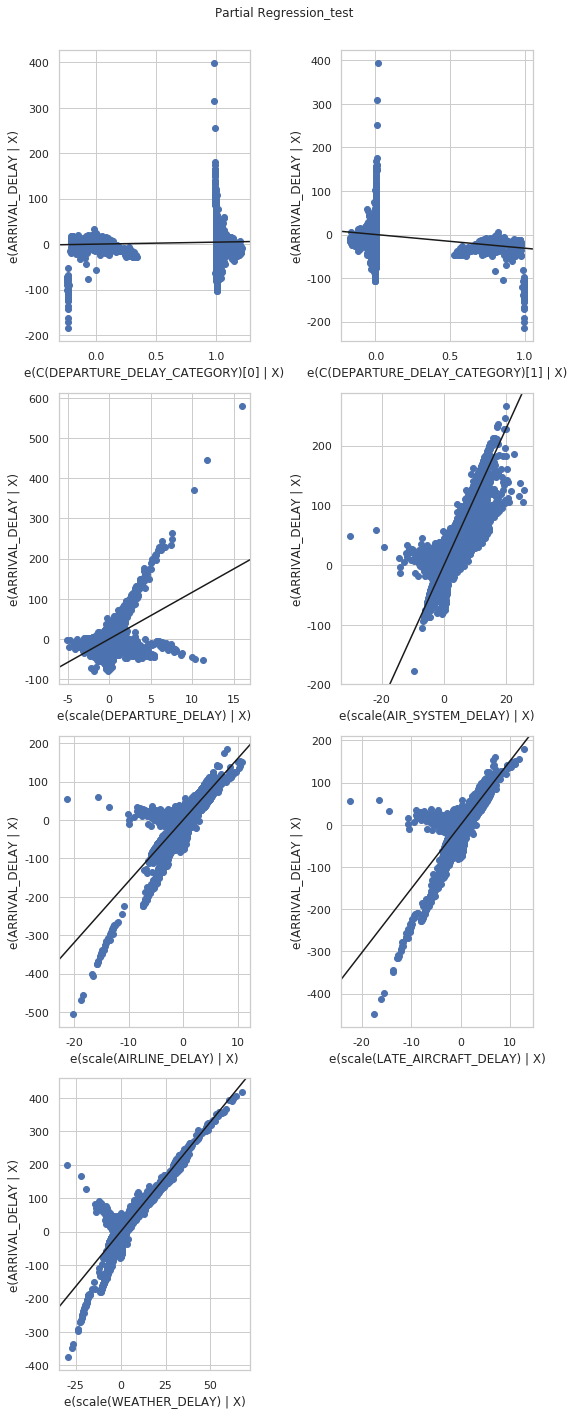

In [18]:
fig = plt.figure(figsize=(8, 20))
sm.graphics.plot_partregress_grid(result4, fig=fig)
fig.suptitle("Partial Regression_test")
plt.show()

In [37]:
dfdf = train_set[train_set['DEPARTURE_DELAY_CATEGORY'] == 0]
dfdf1 = train_set[train_set['DEPARTURE_DELAY_CATEGORY'] == 1]

In [46]:
model5 = sm.OLS.from_formula("ARRIVAL_DELAY ~ scale(DEPARTURE_DELAY) + scale(AIR_SYSTEM_DELAY) + scale(AIRLINE_DELAY) +\
scale(LATE_AIRCRAFT_DELAY) + scale(WEATHER_DELAY)", data=dfdf)
result5 = model5.fit()

<IPython.core.display.Javascript object>

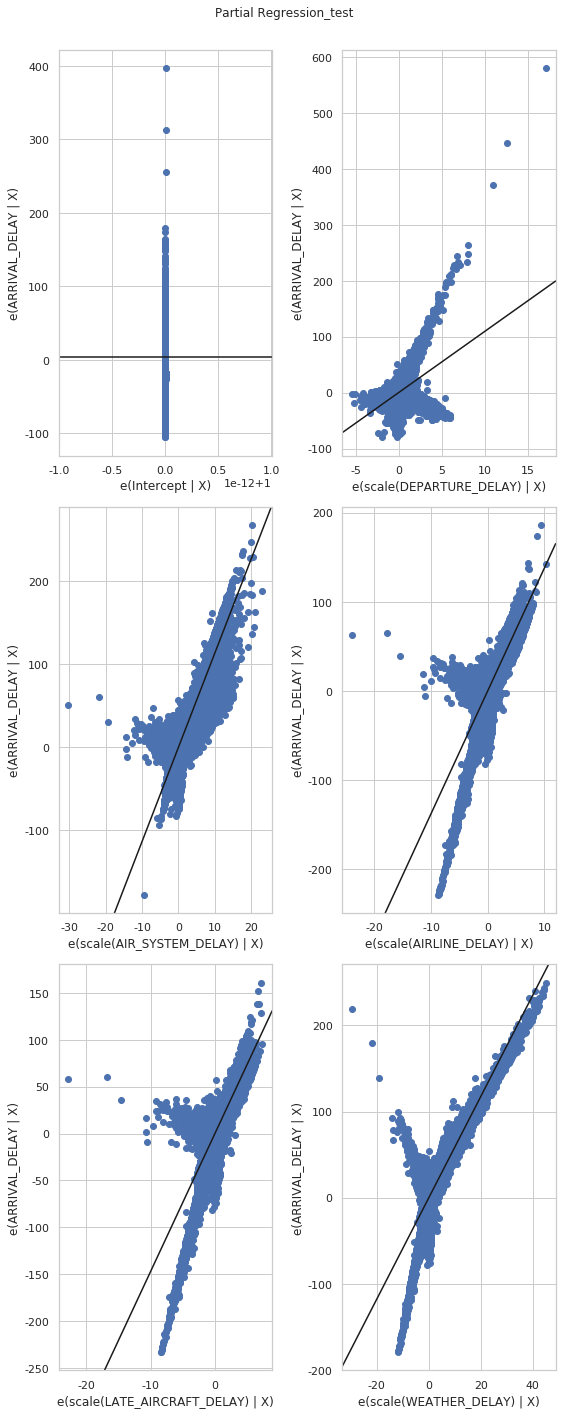

In [40]:
fig = plt.figure(figsize=(8, 20))
sm.graphics.plot_partregress_grid(result5, fig=fig)
fig.suptitle("Partial Regression_test")
plt.show()

In [4]:
import jupyternotify
ip = get_ipython()
ip.register_magics(jupyternotify.JupyterNotifyMagics)

<IPython.core.display.Javascript object>

In [22]:
model6 = sm.OLS.from_formula("ARRIVAL_DELAY ~ scale(DEPARTURE_DELAY) + scale(AIR_SYSTEM_DELAY) + scale(AIRLINE_DELAY) +\
scale(LATE_AIRCRAFT_DELAY) + scale(WEATHER_DELAY)", data=dfdf1)
result6 = model6.fit()


In [42]:
print(result6.summary())

                            OLS Regression Results                            
Dep. Variable:          ARRIVAL_DELAY   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.317e+31
Date:                Sat, 01 Dec 2018   Prob (F-statistic):               0.00
Time:                        17:02:33   Log-Likelihood:                 30839.
No. Observations:                1150   AIC:                        -6.167e+04
Df Residuals:                    1144   BIC:                        -6.164e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
C(DEPARTURE_

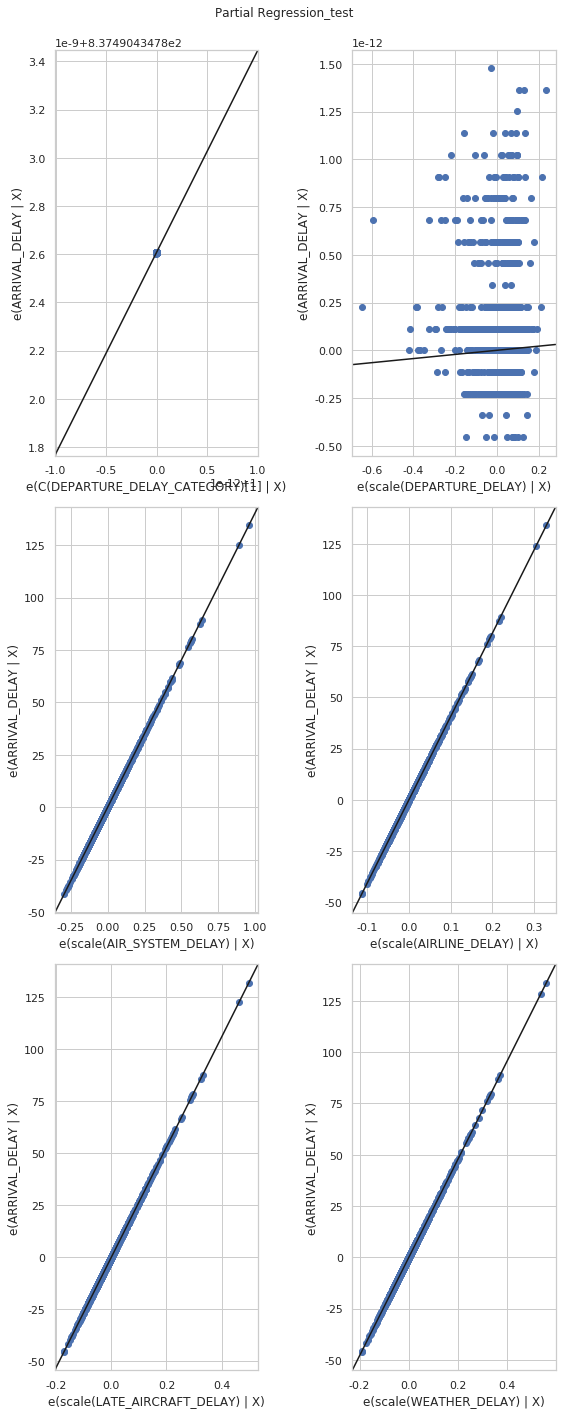

In [43]:
fig = plt.figure(figsize=(8, 20))
sm.graphics.plot_partregress_grid(result6, fig=fig)
fig.suptitle("Partial Regression_test")
plt.show()

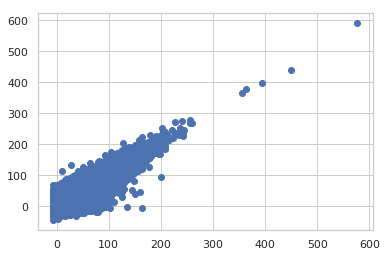

In [55]:
plt.scatter(df1['ARRIVAL_DELAY'], df1['DEPARTURE_DELAY'])
plt.show()

/Users/emjayahn/.pyenv/versions/3.7.0/envs/dss/lib/python3.7/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


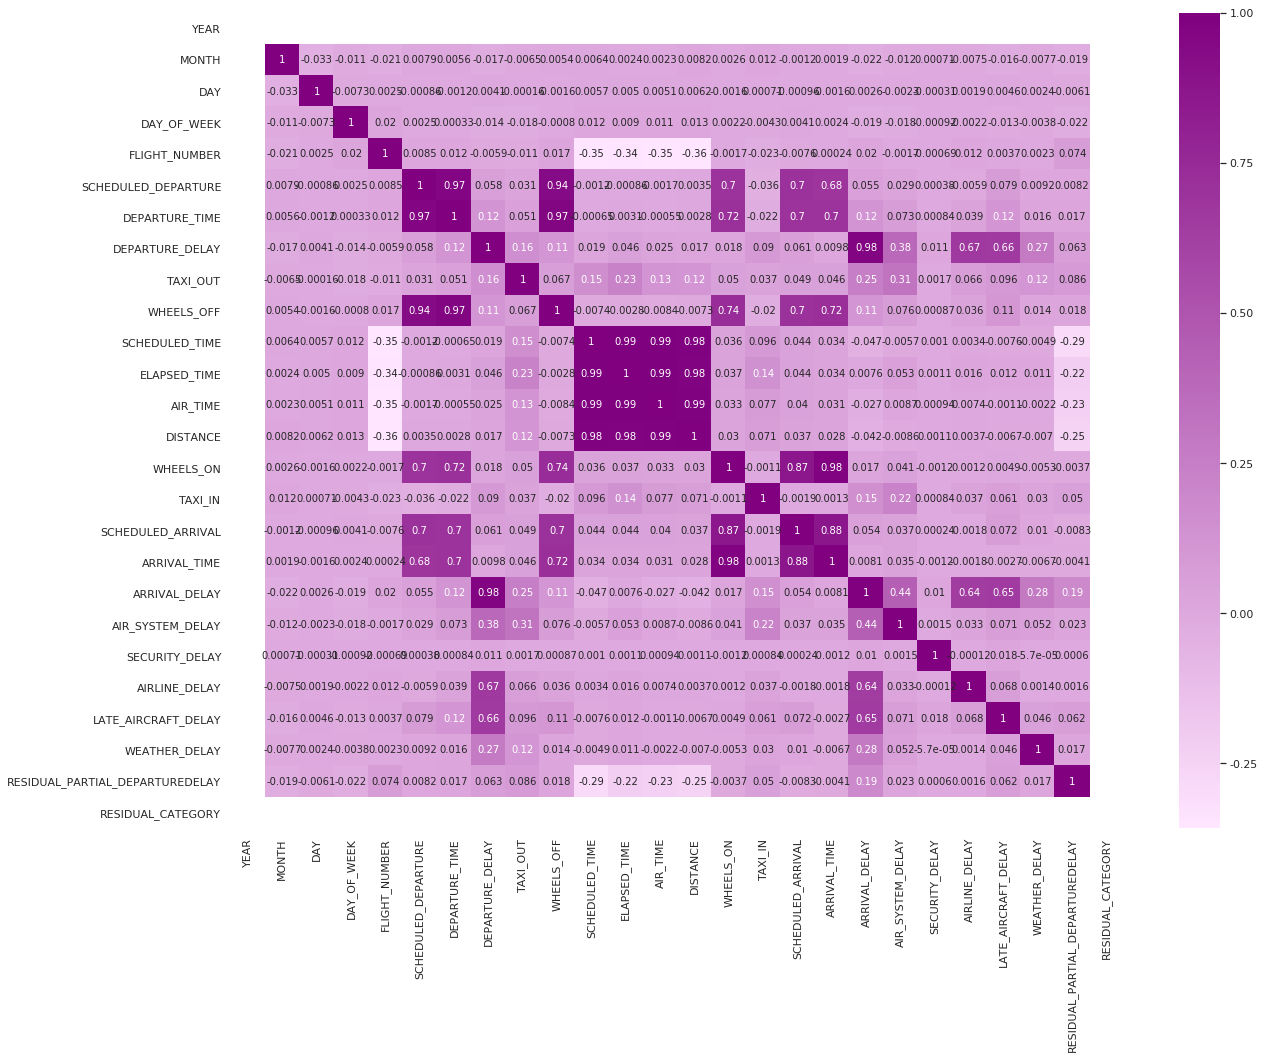

In [48]:
cmap = sns.light_palette("purple", as_cmap=True)
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap=cmap)
plt.show()

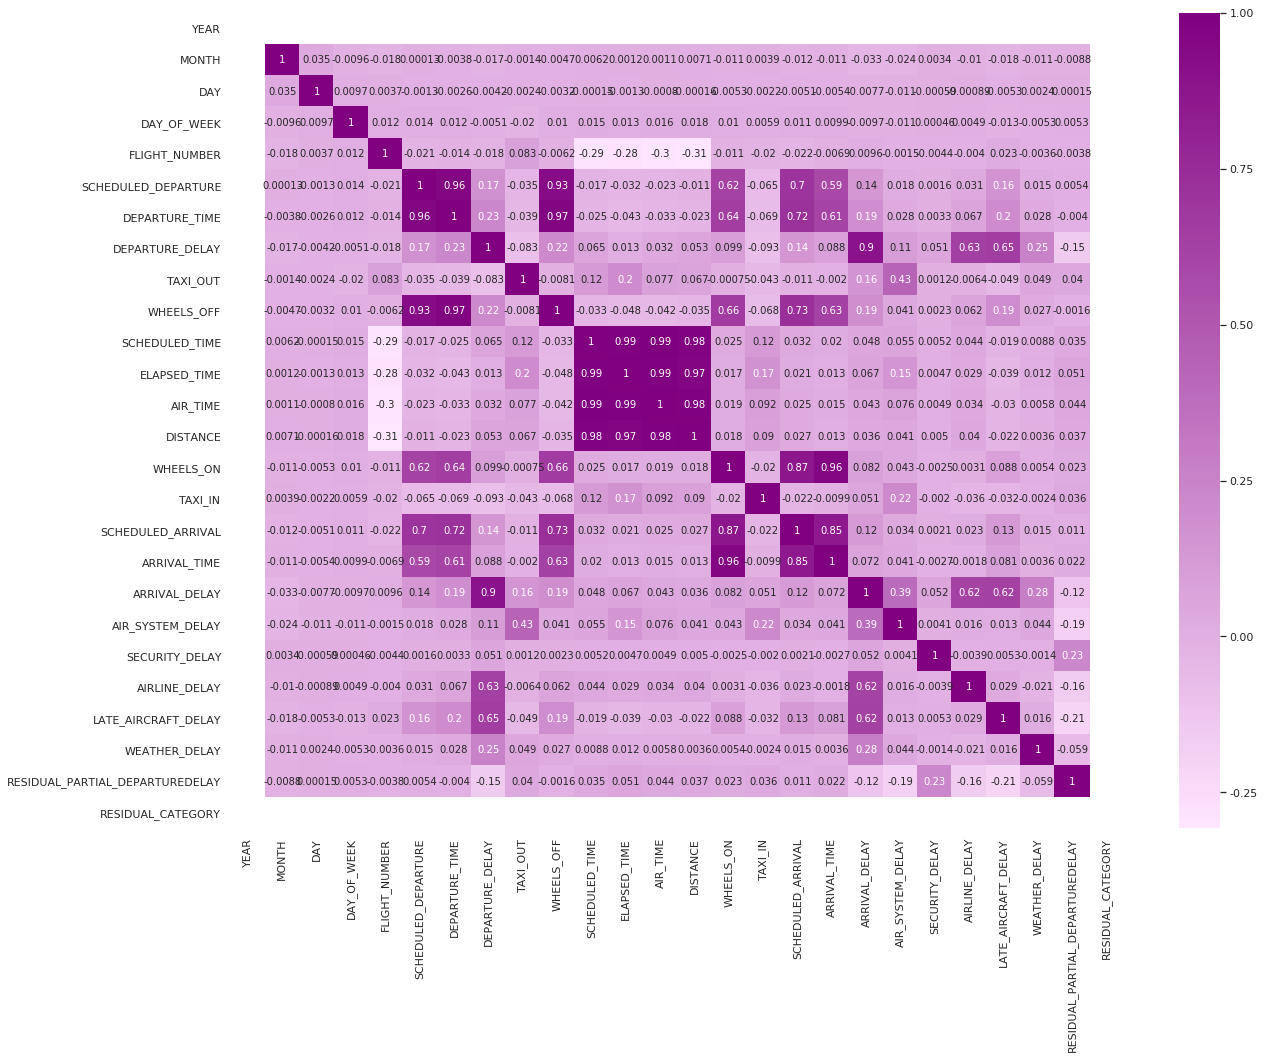

In [50]:
cmap = sns.light_palette("purple", as_cmap=True)
plt.subplots(figsize=(20,15))
sns.heatmap(df1.corr(), annot=True, cmap=cmap)
plt.show()

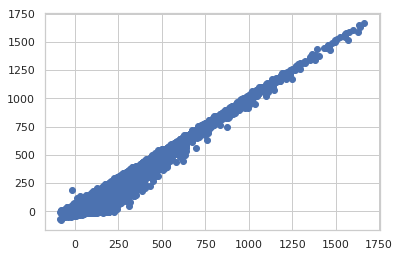

In [46]:
plt.scatter(train_set['ARRIVAL_DELAY'], train_set['DEPARTURE_DELAY'])

<br><font size="6" face="Futura">
<strong>4-1 OLS Regression</strong> _MODEL_

In [7]:
model = sm.OLS.from_formula("ARRIVAL_DELAY ~ scale(DEPARTURE_DELAY) + scale(AIR_SYSTEM_DELAY) + scale(AIRLINE_DELAY) +\
scale(LATE_AIRCRAFT_DELAY) + scale(WEATHER_DELAY)", data=train_set)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          ARRIVAL_DELAY   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                 1.532e+07
Date:                Sat, 01 Dec 2018   Prob (F-statistic):               0.00
Time:                        15:48:15   Log-Likelihood:            -1.7868e+07
No. Observations:             4857025   AIC:                         3.574e+07
Df Residuals:                 4857019   BIC:                         3.574e+07
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [8]:
model2 = sm.OLS.from_formula("ARRIVAL_DELAY ~ scale(AIR_SYSTEM_DELAY) + scale(AIRLINE_DELAY) +\
scale(LATE_AIRCRAFT_DELAY) + scale(WEATHER_DELAY)", data=train_set)
result2 = model2.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          ARRIVAL_DELAY   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                 1.532e+07
Date:                Sat, 01 Dec 2018   Prob (F-statistic):               0.00
Time:                        16:02:57   Log-Likelihood:            -1.7868e+07
No. Observations:             4857025   AIC:                         3.574e+07
Df Residuals:                 4857019   BIC:                         3.574e+07
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [33]:
model3 = sm.OLS.from_formula("ARRIVAL_DELAY ~ 0 + C(RESIDUAL_CATEGORY) + scale(AIR_SYSTEM_DELAY) + scale(AIRLINE_DELAY) +\
scale(LATE_AIRCRAFT_DELAY) + scale(WEATHER_DELAY)", data=train_set)
result3 = model3.fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:          ARRIVAL_DELAY   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                 3.829e+07
Date:                Sun, 25 Nov 2018   Prob (F-statistic):               0.00
Time:                        18:12:37   Log-Likelihood:            -1.5732e+07
No. Observations:             4857025   AIC:                         3.146e+07
Df Residuals:                 4857019   BIC:                         3.146e+07
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
C(RESIDUAL_CATEGORY)

In [ ]:
plt.scatter()

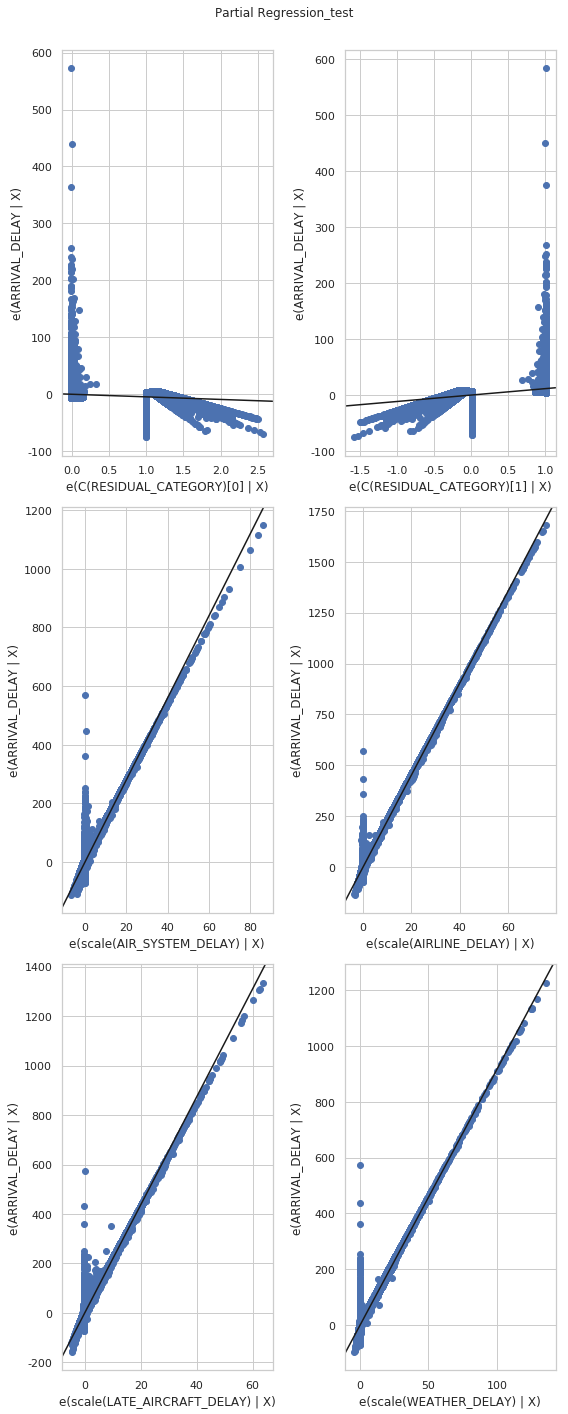

In [34]:
fig = plt.figure(figsize=(8, 20))
sm.graphics.plot_partregress_grid(result3, fig=fig)
fig.suptitle("Partial Regression_test")
plt.show()

In [25]:
type(result2.resid)

pandas.core.series.Series

In [9]:
train_set['RESIDUAL_PARTIAL_DEPARTUREDELAY'] = result2.resid

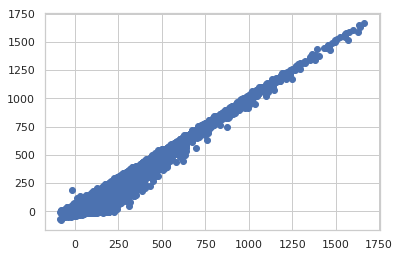

In [53]:
plt.scatter(train_set['ARRIVAL_DELAY'], train_set['DEPARTURE_DELAY'])

/Users/emjayahn/.pyenv/versions/3.7.0/envs/dss/lib/python3.7/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/emjayahn/.pyenv/versions/3.7.0/envs/dss/lib/python3.7/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


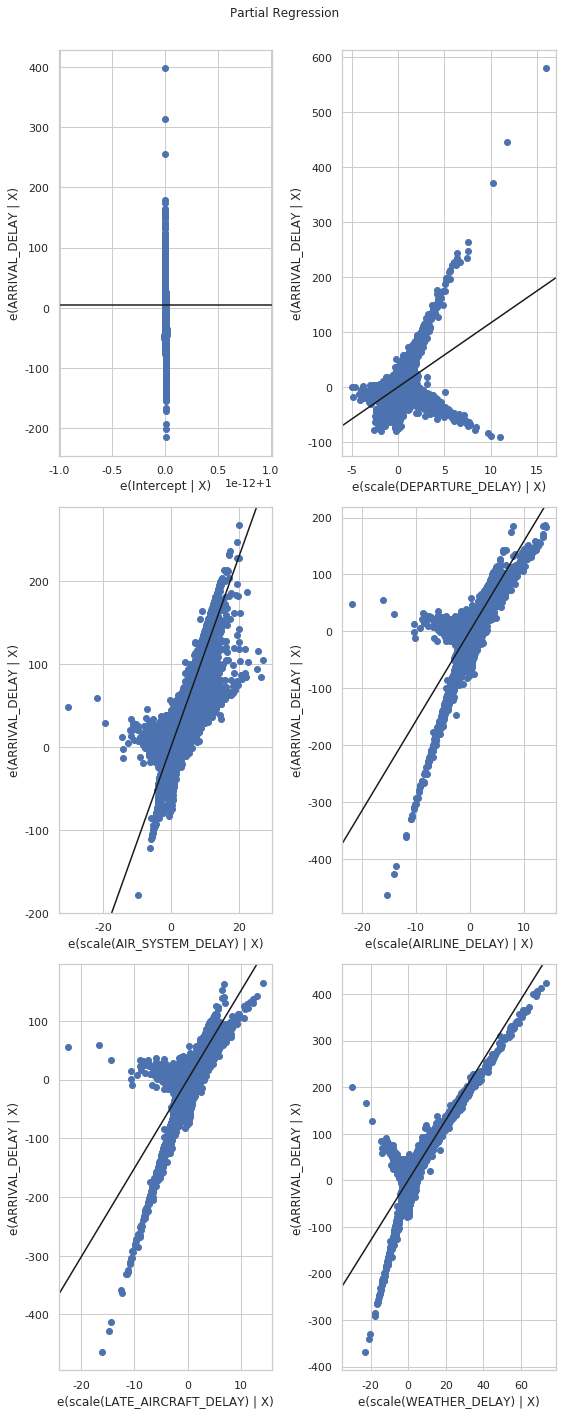

In [14]:
fig = plt.figure(figsize=(8, 20))
sm.graphics.plot_partregress_grid(result, fig=fig)
fig.suptitle("Partial Regression")
plt.show()

In [10]:
train_set['RESIDUAL_CATEGORY'] =  train_set['RESIDUAL_PARTIAL_DEPARTUREDELAY'].apply(lambda x: 0 if x <= 0 else 1)


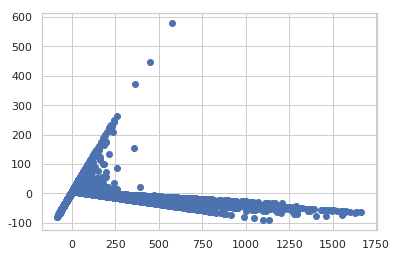

In [40]:
plt.scatter(train_set['ARRIVAL_DELAY'], train_set['RESIDUAL_PARTIAL_DEPARTUREDELAY'])

In [20]:
train_set['RESIDUAL_PARTIAL_DEPARTUREDELAY']

False

In [21]:
model1 = sm.OLS.from_formula("ARRIVAL_DELAY ~ DEPARTURE_DELAY + AIR_SYSTEM_DELAY + AIRLINE_DELAY + WEATHER_DELAY", data=train_set1)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:          ARRIVAL_DELAY   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                 2.696e+05
Date:                Sun, 25 Nov 2018   Prob (F-statistic):               0.00
Time:                        17:38:59   Log-Likelihood:            -1.0793e+07
No. Observations:             3082395   AIC:                         2.159e+07
Df Residuals:                 3082393   BIC:                         2.159e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -10.8736      0.005  

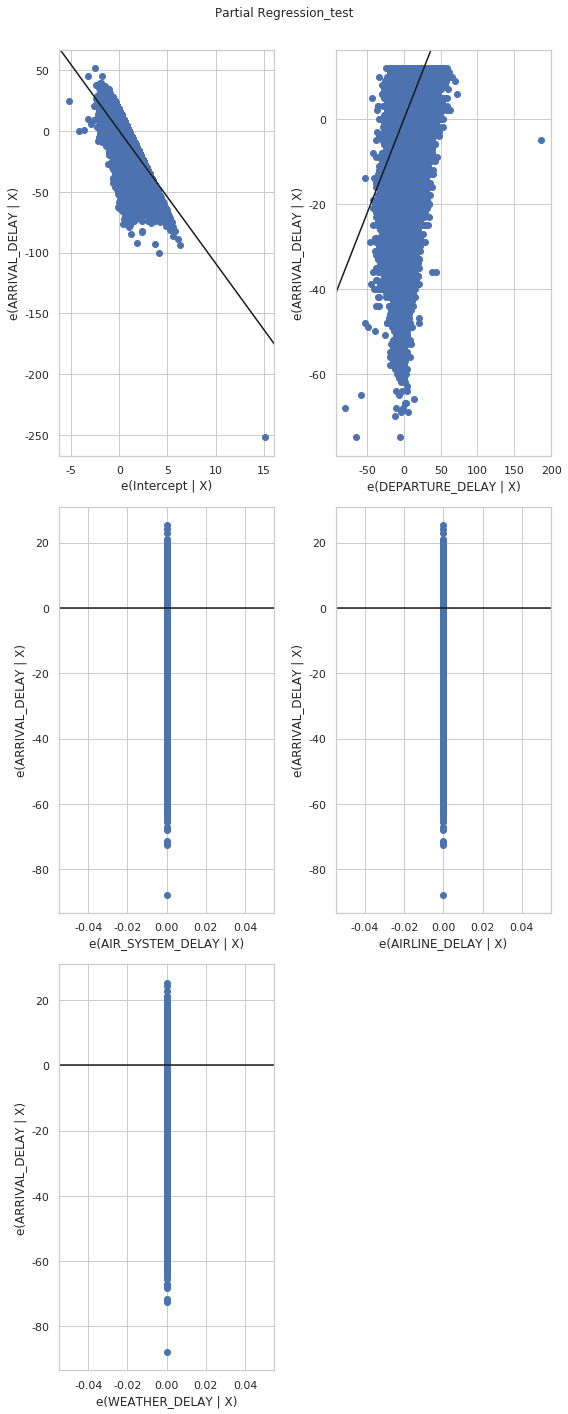

In [22]:
fig = plt.figure(figsize=(8, 20))
sm.graphics.plot_partregress_grid(result1, fig=fig)
fig.suptitle("Partial Regression_test")
plt.show()

<br><font size="6" face="Futura">
<strong>4-2 OLS Regression</strong> _TEST SET_

<br><font size="5" face="Futura">
<strong>4-2-1 TEST_SET Cleaning </strong>

In [39]:
# 테스트셋을 대상으로 위의 트레인셋처럼 전처리
test_set = test_set[((test_set['DIVERTED']==0) & (test_set['CANCELLED'] == 0))]
test_set = test_set.fillna(0)
# test_set = test_set[test_set['ORIGIN_AIRPORT'].isin(US_AIRPORTS) & test_set['DESTINATION_AIRPORT'].isin(US_AIRPORTS)]\
# .reset_index()

In [ ]:
test_set = []

<br><font size="5" face="Futura">
<strong>4-2-2 SCORE </strong>

In [40]:
target = test_set['ARRIVAL_DELAY']
y_predict = result.predict(test_set)

rsquared = r2_score(target, y_predict)
mean_squared = mean_squared_error(target, y_predict)
median_error = median_absolute_error(target, y_predict)

print("rsquared : {}, mean_sqaured : {}, median_error : {}".format(rsquared, mean_squared, median_error))

rsquared : 0.9410039726869661, mean_sqaured : 91.82604139035087, median_error : 6.215728708232946


In [41]:
target = test_set['ARRIVAL_DELAY']
y_predict = result_emjay.predict(test_set)

rsquared = r2_score(target, y_predict)
mean_squared = mean_squared_error(target, y_predict)
median_error = median_absolute_error(target, y_predict)

print("rsquared : {}, mean_sqaured : {}, median_error : {}".format(rsquared, mean_squared, median_error))

PatsyError: Error evaluating factor: NameError: name 'WEATHER_CATEGORY' is not defined
    ARRIVAL_DELAY ~ scale(DEPARTURE_DELAY) + scale(AIR_SYSTEM_DELAY) + scale(AIRLINE_DELAY) +scale(LATE_AIRCRAFT_DELAY) + scale(WEATHER_DELAY) + C(WEATHER_CATEGORY):WEATHER_DELAY + 0
                                                                                                                                                 ^^^^^^^^^^^^^^^^^^^

<br><br><br><br><br><div style="text-align:center">
<font size="7em" color="#214A96" face="Futura">
<strong> B1. FEATURE CREATED <br><br>TRIAL & ERROR <br><br></strong><br><br><br><br><br>

<br><br><br><br><br><div style="text-align:center">
<font size="7em" color="#214A96" face="Futura">
<strong> B1. Problem <br><br>DEPARTURE_DELAY PREDICTION </strong><br><br><br><br><br>

<font size="6" face="Futura">
<strong>B1-1 Problem Re-Definition</strong>

- Arrival Delay에 가장 큰 영향을 미치는 변수는 Departure Delay
- 늦게 출발하면 늦게 도착한다는 뻔한 결과
- Departure Delay 예측모델을 추가로 만들어보기로 결정

(설명충) 결과부터 설명한다. 트레인셋에서 만든 우리 모델을 테스트셋에 적용한 결과 망했다.
<br><font size="6" face="Futura">
<strong>B1-2 Result</strong>

![result_test_b](./result_test_b.png)
- OLS 결과를 추가해주세요


<br><br><br><br><br><div style="text-align:center">
<font size="7em" color="#214A96" face="Futura">
<strong> B2. About Datasets </strong><br><br><br><br><br>

(설명충) 트레인셋을 다시 불러와서 df로 설정한뒤 다시 진행해보겠습니다. 컬럼설명은 생략합니다. 
<br><font size="6" face="Futura">
<strong>B2-1 Loading Datasets</strong>

In [38]:
# df에 트레인셋을 다시 불러와 A3까지 진행한 상태로 만들기
df = train_set[((train_set['DIVERTED']==0) & (train_set['CANCELLED'] == 0))]
df = df[['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']]
df = df.fillna(0)
df = df[df['ORIGIN_AIRPORT'].isin(US_AIRPORTS) & df['DESTINATION_AIRPORT'].isin(US_AIRPORTS)]\
.reset_index()
df['DATE'] = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']], format='%y/%m/%d')
df['FROM_HOLIDAY'] = df['DATE'].dt.date.apply(lambda date : from_holiday(date))

<br><br><br><br><br><div style="text-align:center">
<font size="7em" color="#214A96" face="Futura">
<strong>B3.Data Cleaning & EDA</strong><br><br><br><br><br>

<br><font size="6" face="Futura">
<strong>B3-1 Data Cleaning</strong><br> _Short of Variables_

- `DEPARTURE_DELAY`를 종속변수로 설정하고 출발 시점 이후의 사건인 다음 변수들을 버리겠습니다.<br>
`TAXI_OUT`<br>
`ELAPSED_TIME`<br>
`AIR_TIME`<br>
`TAXI_IN`<br>
`ARRIVAL_DELAY`<br>
`AIR_SYSTEM_DELAY`<br>
`SECURITY_DELAY`<br>
`AIRLINE_DELAY`<br>
`LATE_AIRCRAFT_DELAY`<br>
`WEATHER_DELAY`<br>

<br><font size="6" face="Futura">
<strong>B3-2 Data Cleaning</strong><br> _Merging Year-Month-Day_

- 데이터셋 내의 `YEAR`, `MONTH`, `DAY` 는 모두 int 형의 Data 입니다. 
- 같은 한 row에 있는 세 컬럼을 합쳐 날짜라는 데이터를 만들어 낼 수 있습니다. 
- `YEAR`, `MONTH`, `DAY` 를 합쳐 `DATE` 라는 컬럼을 만듭니다.

In [12]:
print("YEAR의 자료형 : {}".format(type(df['YEAR'][0])))
print("MONTH의 자료형 : {}".format(type(df['MONTH'][0])))
print("DAY의 자료형 : {}".format(type(df['DAY'][0])))

YEAR의 자료형 : <class 'numpy.int64'>
MONTH의 자료형 : <class 'numpy.int64'>
DAY의 자료형 : <class 'numpy.int64'>


In [42]:
df['DATE'] = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']], format='%y/%m/%d')
df.head()

index  YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0      0  2015      1    1            4      AS             98      N407AS   
1      1  2015      1    1            4      US            840      N171US   
2      2  2015      1    1            4      AA            258      N3HYAA   
3      3  2015      1    1            4      AS            135      N527AS   
4      4  2015      1    1            4      DL            806      N3730B   

  ORIGIN_AIRPORT DESTINATION_AIRPORT      ...       SCHEDULED_ARRIVAL  \
0            ANC                 SEA      ...                     430   
1            SFO                 CLT      ...                     806   
2            LAX                 MIA      ...                     805   
3            SEA                 ANC      ...                     320   
4            SFO                 MSP      ...                     602   

   ARRIVAL_TIME  ARRIVAL_DELAY  AIR_SYSTEM_DELAY  SECURITY_DELAY  \
0         408.0          -22.0               0.0             0.0   
1         811.0            5.0               0.0             0.0   
2         756.0           -9.0               0.0             0.0   
3         259.0          -21.0               0.0             0.0   
4         610.0            8.0               0.0             0.0   

   AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  WEATHER_DELAY       DATE  FROM_HOLIDAY  
0            0.0                  0.0            0.0 2015-01-01             0  
1            0.0                  0.0            0.0 2015-01-01             0  
2            0.0                  0.0            0.0 2015-01-01             0  
3            0.0                  0.0            0.0 2015-01-01             0  
4            0.0                  0.0            0.0 2015-01-01             0  

[5 rows x 31 columns]

<br><font size="6" face="Futura">
<strong>B3-3 Data Cleaning</strong><br>_TIME formatting_

- `SCHEDULED_DEPARTURE`, `DEPARTURE_TIME`와 `SCHEDULED_ARRIVAL`은 모두 `시각`을 나타내는 데이터 입니다. 하지만 실제 데이터 표현은        
**00:05** 인 경우 **5*,    
**13:00** 인 경우 **1300**,   
**23:59** 인 경우 **2359**,    
    와 같이 표현되어있습니다.
- 이런 시간 정보를 datetime.time에 맞게 표현해줍니다.

In [44]:
def converting_timeformat(data):
    """
    data 상에 시각 표현을 00:00:00 형태로 변경하는 함수입니다.
    parameter : dataframe 내의 시간 형식을 바꾸고 싶은 column의 element를 의미합니다.
    return : 00:00:00 형식에 맞는 datetime.time 자료형이 return됩니다.
    """
    if np.isnan(data):
        new_time_format = np.nan
    else:
        padding = "{:04d}".format(int(data))
        if padding == "2400":
            padding = "0000"
        new_time_format = datetime.time(int(padding[0:2]), int(padding[2:4]))
    
    return new_time_format   

In [45]:
#SCHEDULED_DEPARTURE formatting : 출발 예정시각의 표현방식을 바꿔줍니다.
df['SCHEDULED_DEPARTURE'] = df['SCHEDULED_DEPARTURE'].apply(converting_timeformat)
#DEPARTURE_TIME formatting : 실제 출발시각의 표현방식을 바꿔줍니다.
df['DEPARTURE_TIME'] = df['DEPARTURE_TIME'].apply(converting_timeformat)
#SCHEDULED_ARRIVAL formatting 도착 예정시각의 표현방식을 바꿔줍니다.
df['SCHEDULED_ARRIVAL'] = df['SCHEDULED_ARRIVAL'].apply(converting_timeformat)
#ARRIVAL_TIME formatting 실제 도착시각의 표현방식을 바꿔줍니다.
df['ARRIVAL_TIME'] = df['ARRIVAL_TIME'].apply(converting_timeformat)

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0  2015      1    1            4      AS             98      N407AS   
1  2015      1    1            4      US            840      N171US   
2  2015      1    1            4      AA            258      N3HYAA   
3  2015      1    1            4      AS            135      N527AS   
4  2015      1    1            4      DL            806      N3730B   

  ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE      ...        \
0            ANC                 SEA                    5      ...         
1            SFO                 CLT                   20      ...         
2            LAX                 MIA                   20      ...         
3            SEA                 ANC                   25      ...         
4            SFO                 MSP                   25      ...         

   ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  \
0         408.0          -22.0         0          0                  NaN   
1         811.0            5.0         0          0                  NaN   
2         756.0           -9.0         0          0                  NaN   
3         259.0          -21.0         0          0                  NaN   
4         610.0            8.0         0          0                  NaN   

   AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
0               NaN             NaN            NaN                  NaN   
1               NaN             NaN            NaN                  NaN   
2               NaN             NaN            NaN                  NaN   
3               NaN             NaN            NaN                  NaN   
4               NaN             NaN            NaN                  NaN   

   WEATHER_DELAY  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  

[5 rows x 31 columns]

In [56]:
# 잘 변경되었는지 확인
df[["SCHEDULED_DEPARTURE", "ARRIVAL_DELAY", 
    "SCHEDULED_ARRIVAL", "ARRIVAL_TIME"]].iloc[100]

SCHEDULED_DEPARTURE    05:45:00
DEPARTURE_TIME         05:40:00
SCHEDULED_ARRIVAL      07:41:00
ARRIVAL_TIME           07:42:00
Name: 100, dtype: object

<br><font size="6" face="Futura">
<strong>B3-4 Data Cleaning</strong><br>
<i>SCHEDULED_DEPARTURE_DATETIME</i>

- 예약날짜 `DATE`와 예약 시각`SCHEDULED_DEPARTURE`은 당해 날짜와 당해 시각에 출발이 예정되어 있는 비행기를 의미합니다. 따라서 이 두 정보가 하나의 정보로 합쳐질 필요가 있습니다. 이 합쳐진 날짜는 `SCHEDULED_DEPARTURE_DATETIME` 칼럼을 새로 만들어 담겠습니다.

In [57]:
def bind_date_time(date, time):
    """
    날짜와 시각을 합쳐 epoch 형식으로 합쳐주는 함수입니다. 
    YYYY-MM-DD HH:MM:SS 형식의 datetime으로 합쳐줍니다.
    
    parameter : date(type : datetime.datetime), time(type : datetime.time)
    return : datetime.datetime - YYYY-MM-DD HH:MM:SS 
    """
    if pd.isnull(date) or pd.isnull(time):
        return np.nan
    return datetime.datetime.combine(date, time)

In [58]:
df['SCHEDULED_DEPARTURE_DATETIME'] = df.apply(lambda df:bind_date_time(df['DATE'], df['SCHEDULED_DEPARTURE']), axis=1)

In [59]:
df['SCHEDULED_DEPARTURE_DATETIME'][0]

Timestamp('2015-01-01 00:05:00')

<br><font size="6" face="Futura">
<strong>B3-5 EDA</strong><br>
<i>Scheduled Departure & Departure Delay</i>

- 출발 예정시간대에 따라 딜레이가 분포가 어떤지 살펴보겠습니다. 

In [84]:
def datetime_delay_figure(start_date, end_date, dataframe=df):
    """
    보고싶은 기간을 입력으로 받아 DEPARTURE_DELAY를 y 축으로 하여 plot을 그려주는 함수입니다.
    parameter : start_date, end_date : YYYY-MM-DD
                dataframe : 그리고 싶은 dataframe 선택. default 는 train_set
    return : plot 과 scatter 두 개의 figure
    """
    start_index = np.where(dataframe['DATE'] == start_date)[0][0]
    end_index = np.where(dataframe['DATE'] == end_date)[0][-1]
    dfx = dataframe['SCHEDULED_DEPARTURE_DATETIME'].iloc[start_index:end_index]
    dfy = dataframe['DEPARTURE_DELAY'].iloc[start_index:end_index]
    
    plt.figure(figsize=(30,10))

    plt.plot(dfx, dfy)
    plt.title("PLOT : DATETIME vs DELAY")
    plt.xlabel("DATETIME")
    plt.ylabel("DEPARTURE DELAY")
    
    plt.show()

#### 하루 단위
- 무작위로 4일을 뽑아 각각 위에서 작성한 함수로 하루 단위 분포를 그려봤습니다. 
- 약 06:00 부터 Delay가 시작되어 24:00시까지 지속되다가 사라지는 경향을 보입니다.

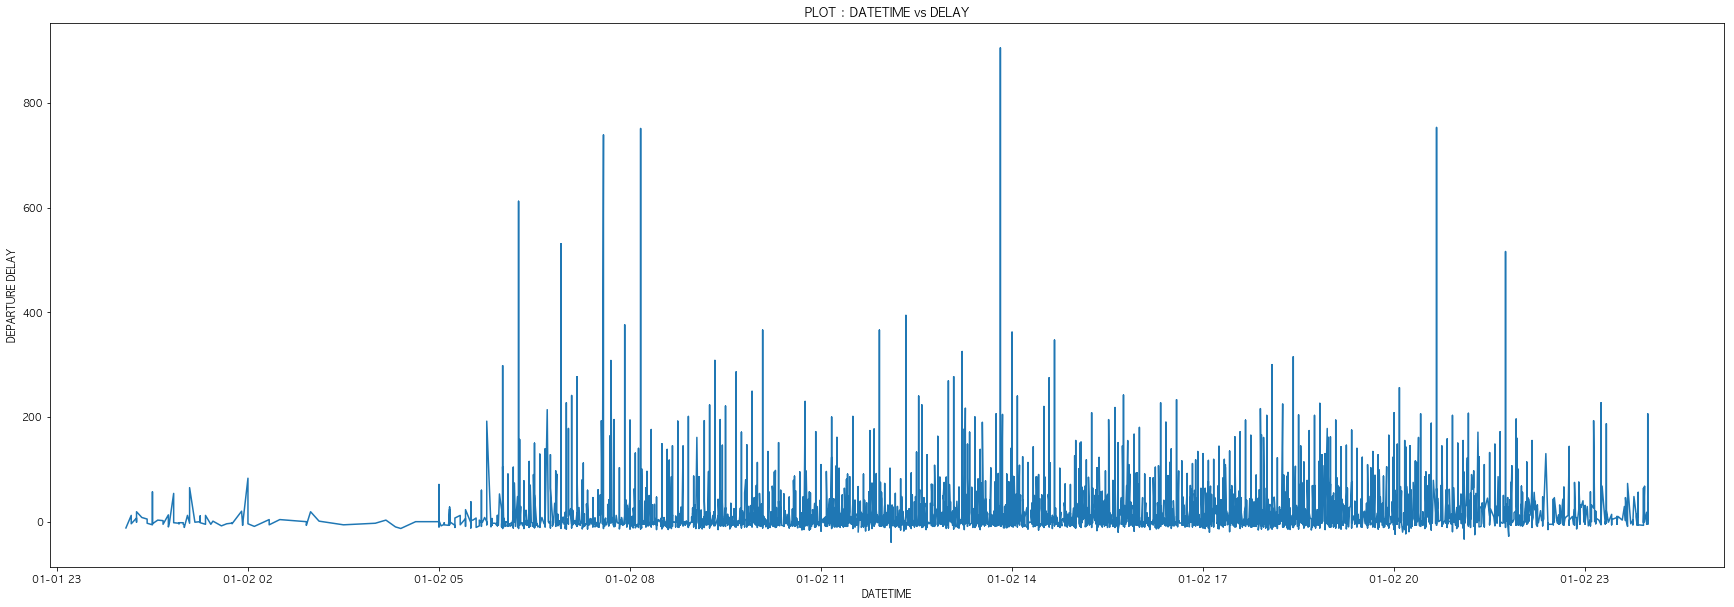

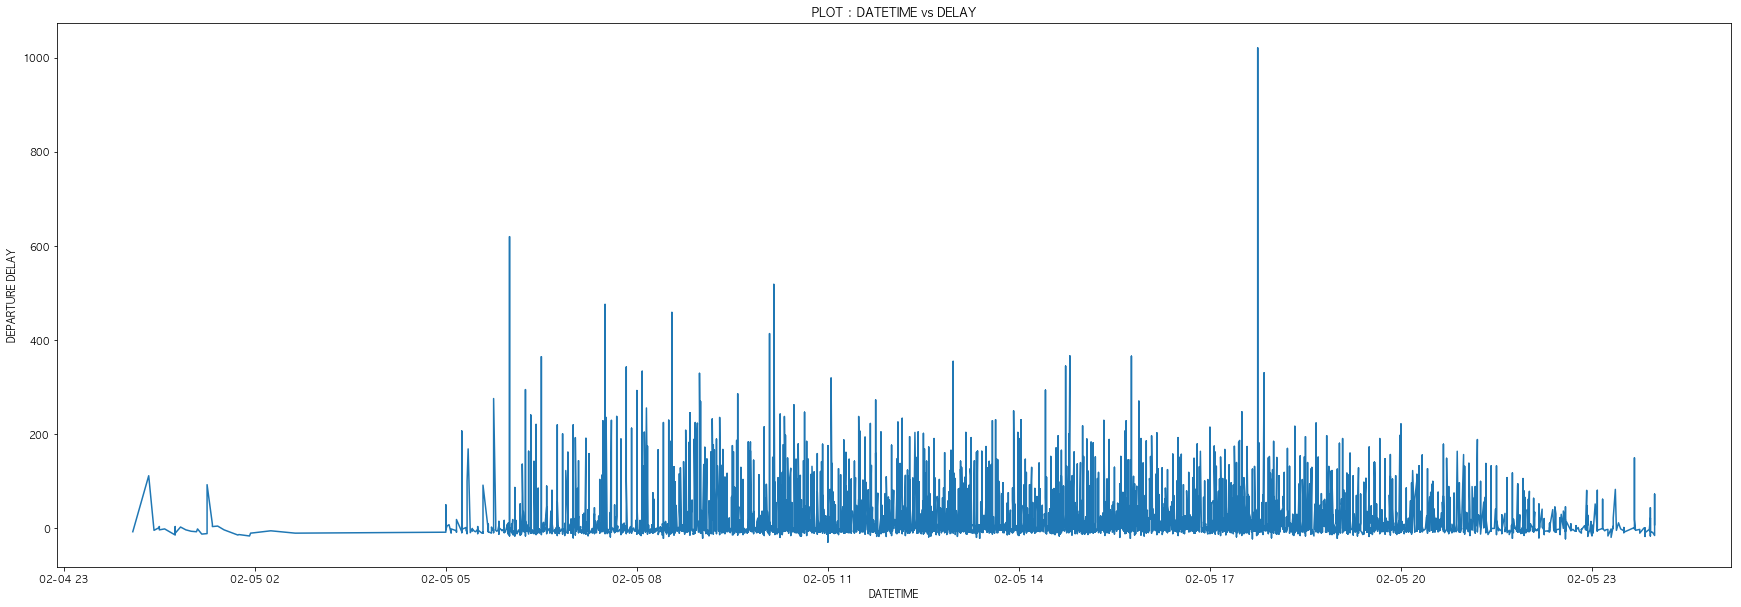

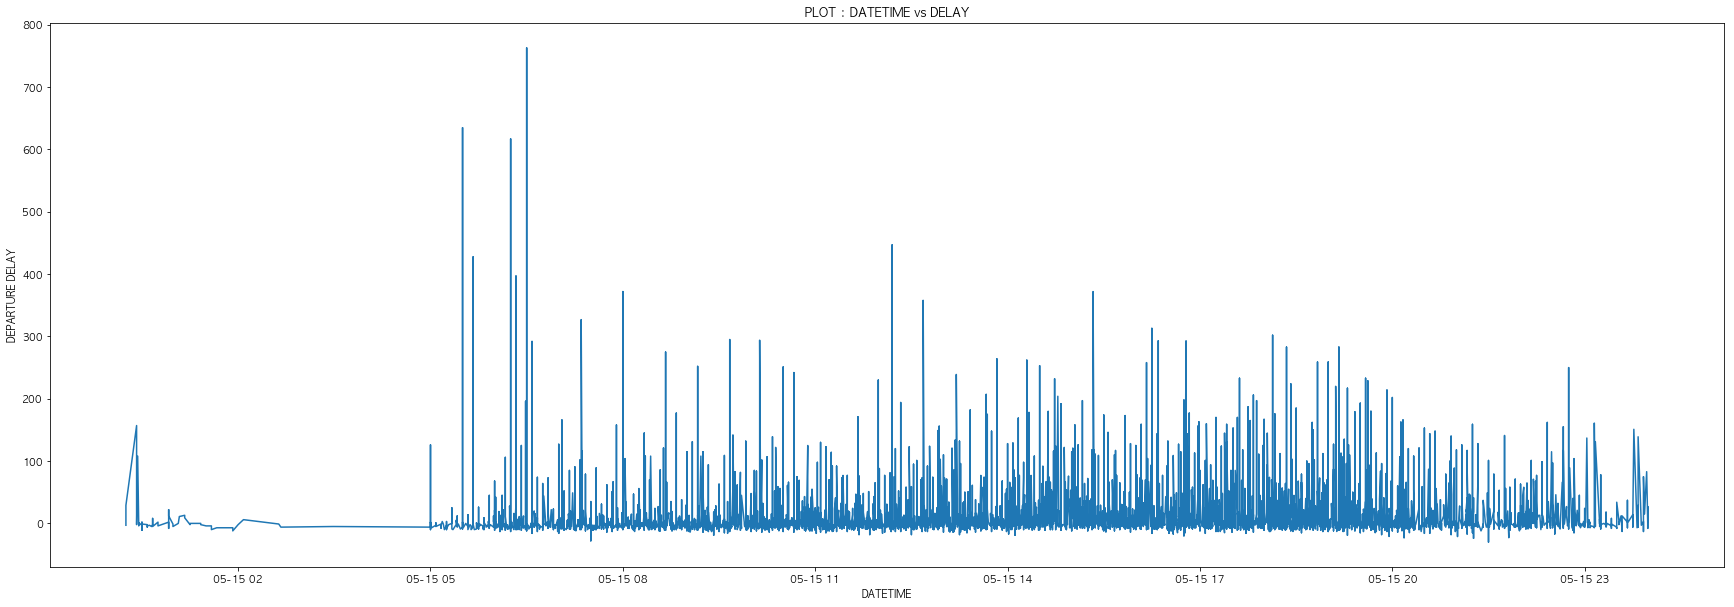

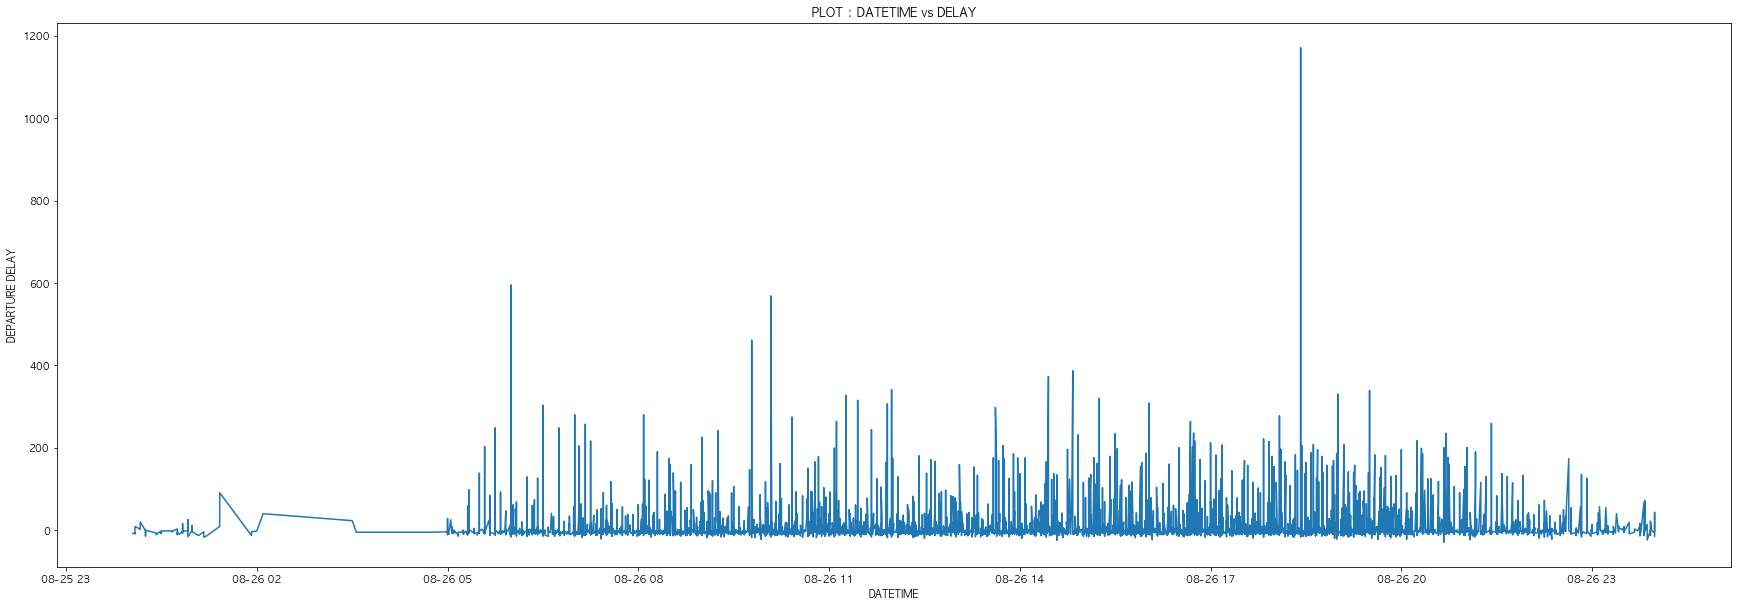

In [83]:
datetime_delay_figure('2015-01-02', '2015-01-02')
datetime_delay_figure('2015-02-05', '2015-02-05')
datetime_delay_figure('2015-05-15', '2015-05-15')
datetime_delay_figure('2015-08-26', '2015-08-26')

#### 5일 단위
- 이번에는 5일 단위로 살펴봤습니다.
- Delay는 하루를 주기로 특정한 움직임을 보이고 있습니다. 

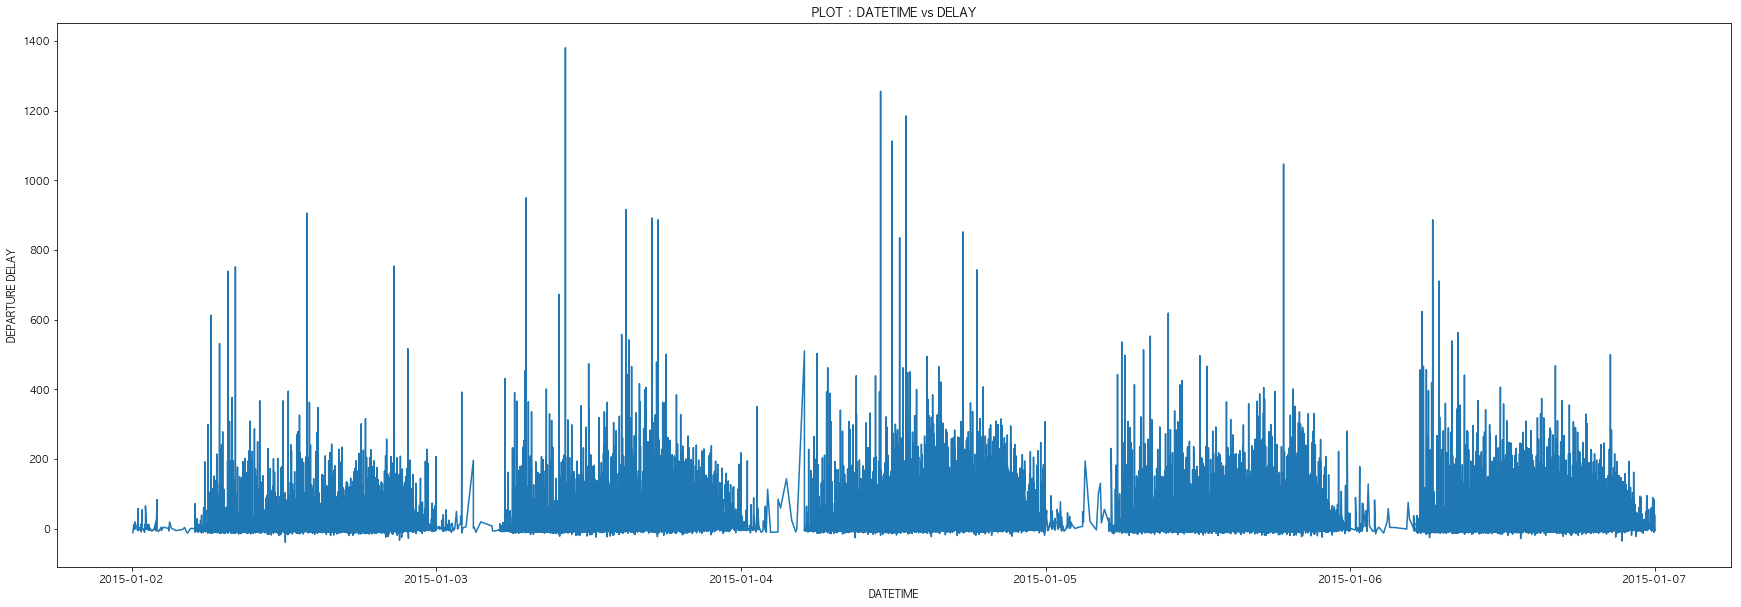

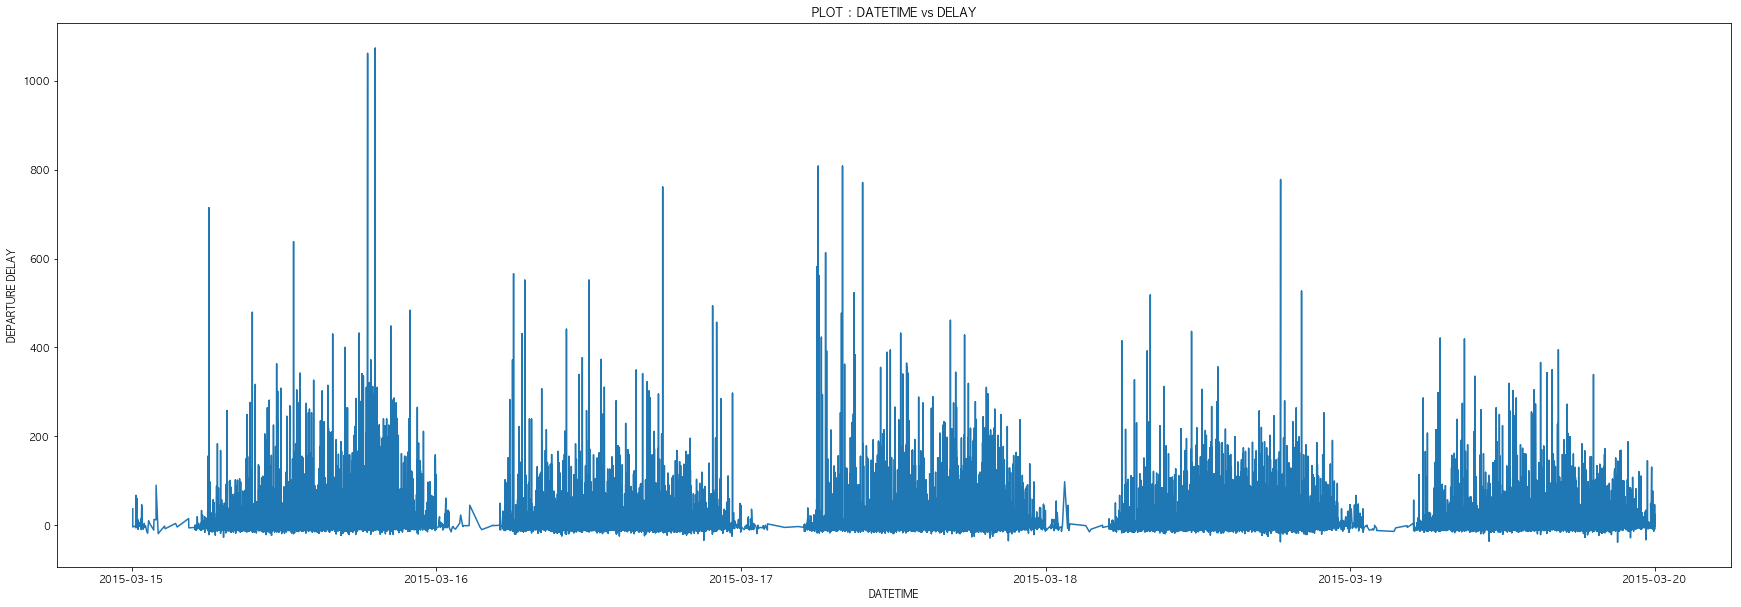

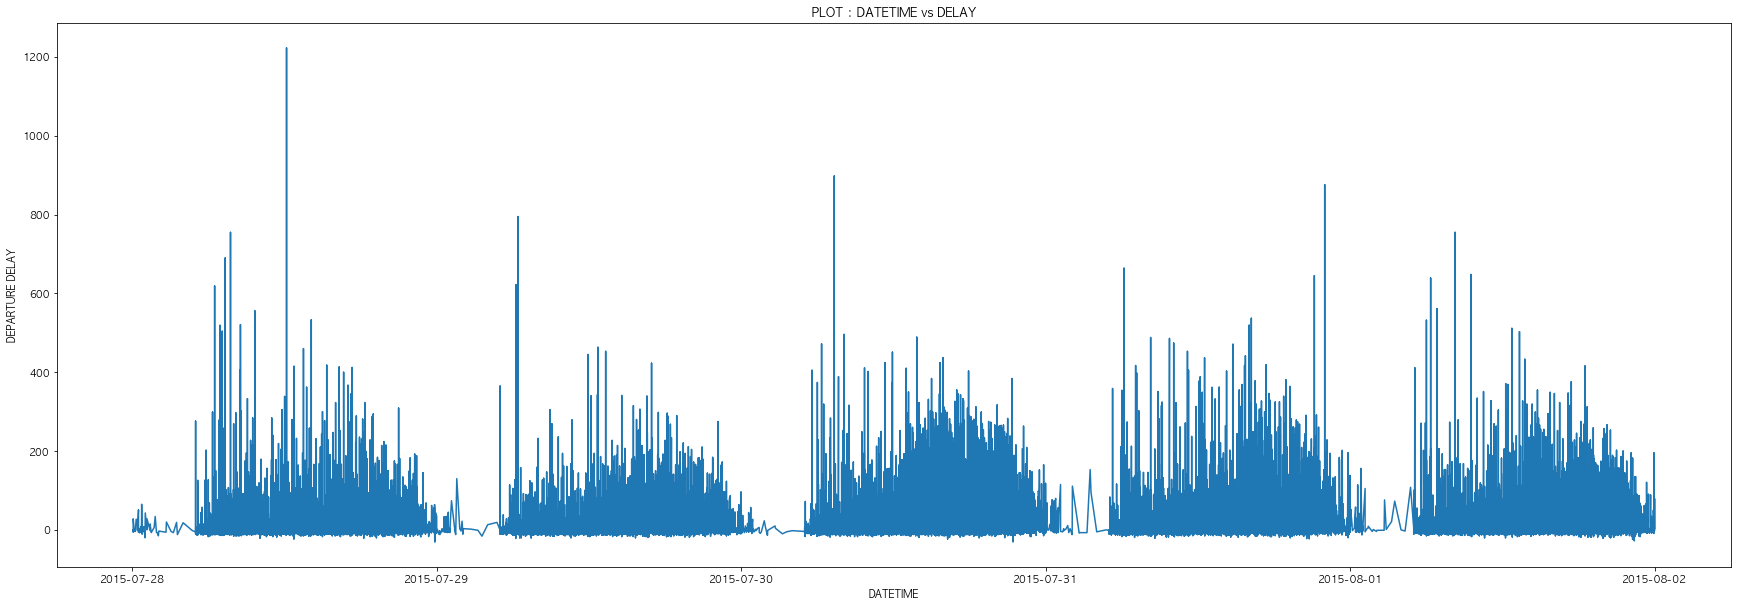

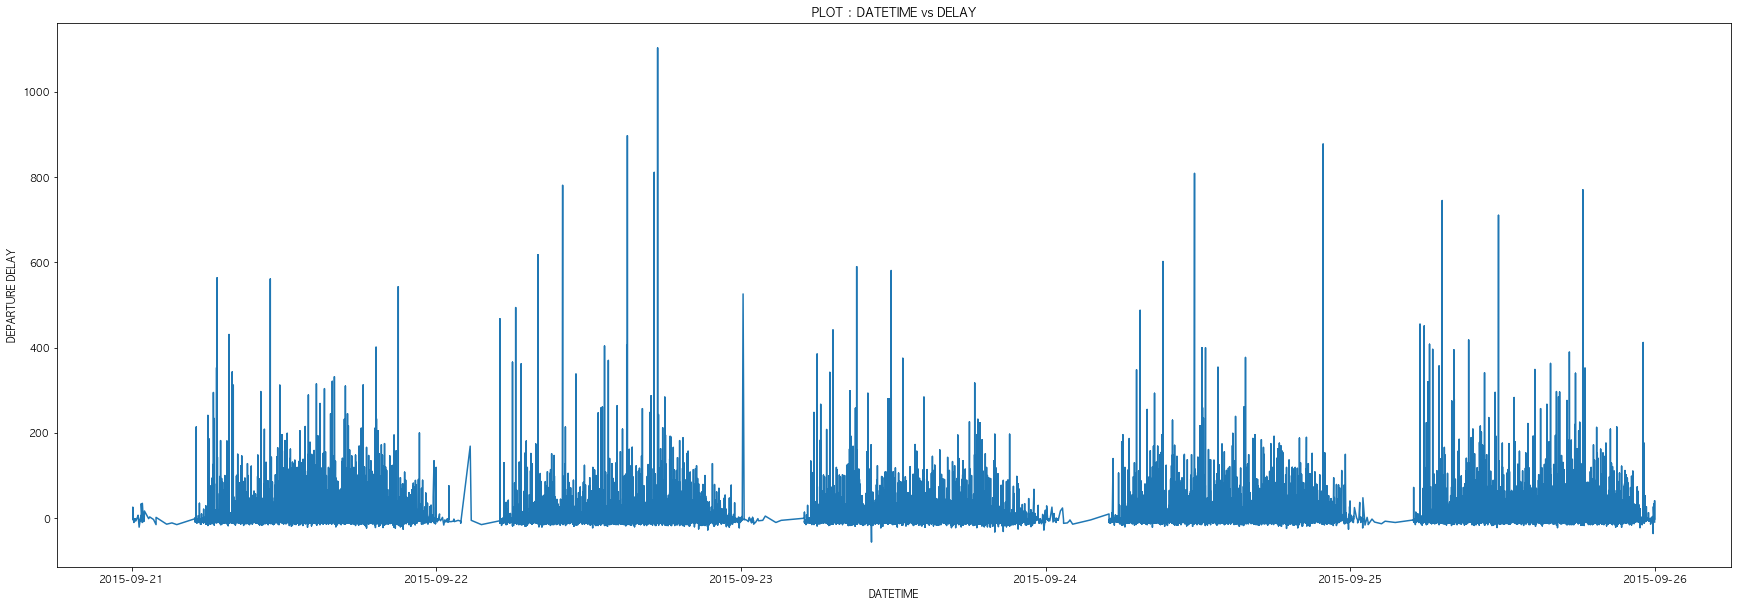

In [85]:
datetime_delay_figure('2015-01-02', '2015-01-06')
datetime_delay_figure('2015-03-15', '2015-03-19')
datetime_delay_figure('2015-07-28', '2015-08-01')
datetime_delay_figure('2015-09-21', '2015-09-25')

<br><font size="6" face="Futura">
<strong>B3-6 EDA</strong><br>
<i>Holiday & Departure Delay</i>

- 휴일에는 공항에 이용객이 많아, DELAY에 영향을 미친다고 가정했습니다.
- 2015년 한 해동안, 미국 공휴일을 조사하였습니다. 
- 2015년 1월부터 12월까지의 미국 공휴일들 
(출처 : http://www.ca3.uscourts.gov/2015-federal-holidays )
    - New Year's : **2015-01-01 (Thursday)**
    - Martin Luther King Junior day : **2015-01-19 (Monday)**
    - President's day : **2015-02-16 (Monday)**
    - Memorial Day : **2015-05-25 (Monday)**
    - Indendence Day : **2015-07-03 (Friday)**
    - Labor Day : **2015-09-09 (Monday)**
    - Columbus Day : **2015-11-11 (Wednesday)**
    - Thanksgiving Day : **2015-11-26 (Thursday)**
    - Christmas Day : **2015-12-25 (Friday)**

- 2015년 특정 날짜와 그 해의 공휴일들 사이의 일 간격을 구한 뒤, 가장 가까운 공휴일과 며칠이 떨어져 있는지를 보여주는 `FROM_HOLIDAY` 컬럼을 새로 생성합니다.
- 즉, `FROM_HOLIDAY`의 정수값은 어떤 날과 가장 가까운 공휴일 까지의 일 간격 입니다.
- 예를 들어, 이 값이 0이면 공휴일 당일, 1인 경우 공휴일 전날 혹은 다음날입니다.

In [88]:
# tuple 형태로 공휴일들 리스트에 저장
holidays = [(1, 1), (1, 19), (2, 16), (5, 25), (7, 3), 
            (9, 9), (11, 11), (11, 26), (12, 25)]

def from_holiday(input_date):
    """
    미국의 10개 공휴일에서 며칠이 떨어져 있는지 계산한 뒤, 
    가장 가까운 기념일과의 차이를 구하는 함수입니다. 
    parameter: type: datetime.date - 변환하려는 날짜를 datetime.date형식으로 넣습니다.
    return: type: int
    """
    # difference[holiday] = date - holiday 형식으로 dict에 정리
    difference = {}
    
    for holiday in holidays:
        diff = input_date - datetime.date(2015, holiday[0], holiday[1])
        # 차이가 음수값이 나올 수 있으니 절댓값으로 저장
        difference[holiday] = abs(diff.days)
        
    # value값들 중 minimum 을 리턴하기. 
    return min(difference.values())

In [89]:
df['FROM_HOLIDAY'] = df['DATE'].dt.date.apply(lambda date : from_holiday(date))

<br><font size="6" face="Futura">
<strong>B3-7 EDA</strong><br>
<i>Correlation</i>

- 각 변수 사이의 상관 계수를 구해보았습니다.
- `FROM_HOLIDAY`와 가장 높은 상관관계(-0.238502)를 보입니다.

In [94]:
dfx = df[['MONTH', 'DAY', 'DAY_OF_WEEK', 'SCHEDULED_DEPARTURE', 
          'DEPARTURE_DELAY', 'SCHEDULED_TIME', 'DISTANCE', 'FROM_HOLIDAY']]
dfx.corr()

MONTH       DAY  DAY_OF_WEEK  DEPARTURE_DELAY  \
MONTH            1.000000  0.004206    -0.014398        -0.011854   
DAY              0.004206  1.000000     0.005034        -0.000579   
DAY_OF_WEEK     -0.014398  0.005034     1.000000        -0.014991   
DEPARTURE_DELAY -0.011854 -0.000579    -0.014991         1.000000   
SCHEDULED_TIME   0.012739  0.002786     0.014488         0.027363   
DISTANCE         0.012659  0.003058     0.015777         0.023621   
FROM_HOLIDAY    -0.238502 -0.015521     0.001258        -0.014745   

                 SCHEDULED_TIME  DISTANCE  FROM_HOLIDAY  
MONTH                  0.012739  0.012659     -0.238502  
DAY                    0.002786  0.003058     -0.015521  
DAY_OF_WEEK            0.014488  0.015777      0.001258  
DEPARTURE_DELAY        0.027363  0.023621     -0.014745  
SCHEDULED_TIME         1.000000  0.984166     -0.003243  
DISTANCE               0.984166  1.000000     -0.000323  
FROM_HOLIDAY          -0.003243 -0.000323      1.000000

<br><font size="6" face="Futura">
<strong>B3-8 EDA</strong><br>
<i>April, Atlanta, Delta</i>

- 뚜렷한 관계를 보이지 않는 데이터가 많다는 생각에, 4월 데이터만 추려 살펴보겠습니다.
- 또한, 가장 데이터가 많은 `ORIGIN_AIRPORT` : 'ATL', `AIRLINE`: 'DL'로 출발지와 항공사도 제한해봤습니다.

In [96]:
# 자료가 많은 출발공항 찾기
airport_count = df.groupby(["ORIGIN_AIRPORT"]).size().reset_index(name="Counts")
airport_count = airport_count.sort_values(["Counts"], ascending=[False])
airport_count.head()

ORIGIN_AIRPORT  Counts
20             ATL  291992
228            ORD  234970
86             DFW  197590
85             DEN  164421
176            LAX  163292

In [98]:
# 자료가 많은 항공사 찾기
airline_count = df.groupby(["AIRLINE"]).size().reset_index(name="Counts")
airline_count = airline_count.sort_values(["Counts"], ascending=[False])
airline_count.head()

AIRLINE  Counts
13      WN  968399
3       DL  676166
0       AA  540737
9       OO  448617
4       EV  432956

In [123]:
# 1월에 아틀란타에서 출발하는 델타항공 데이터 필터링: 542개 데이터
df_apr = df[(df['MONTH'] == 4) & (df['ORIGIN_AIRPORT']=='ORD') & (df['AIRLINE'] == 'DL')]
len(df_apr)

542

#### 이틀 단위
- 종잡기 힘들지만 하루 단위로 움직이는 모습을 보입니다. 

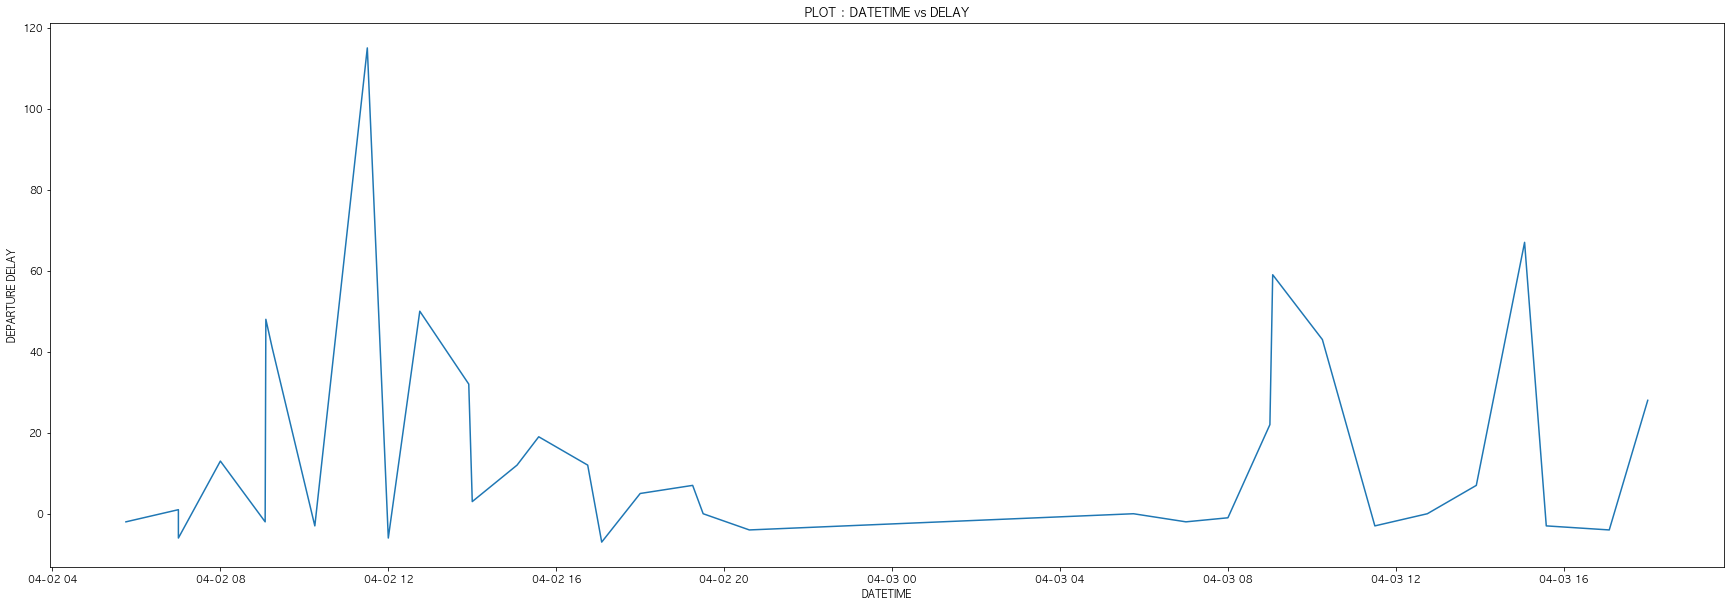

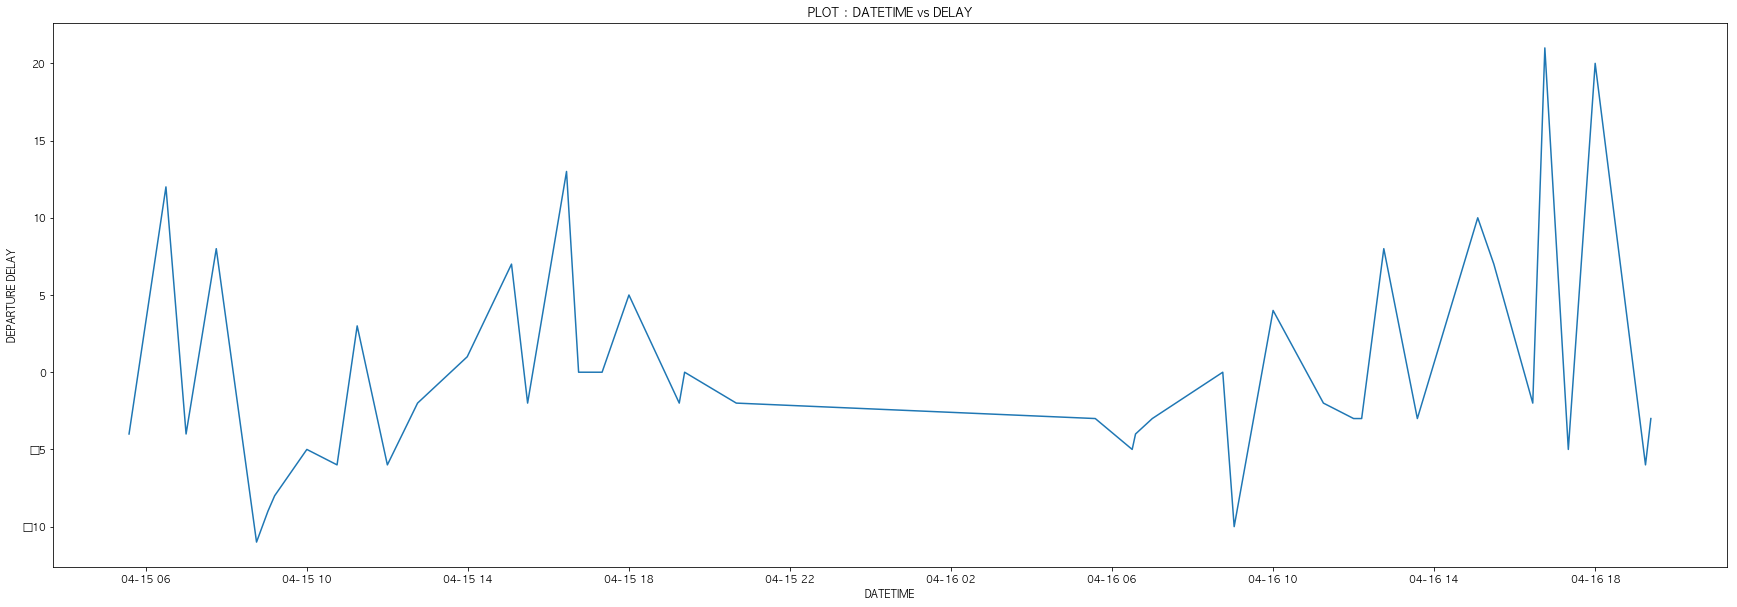

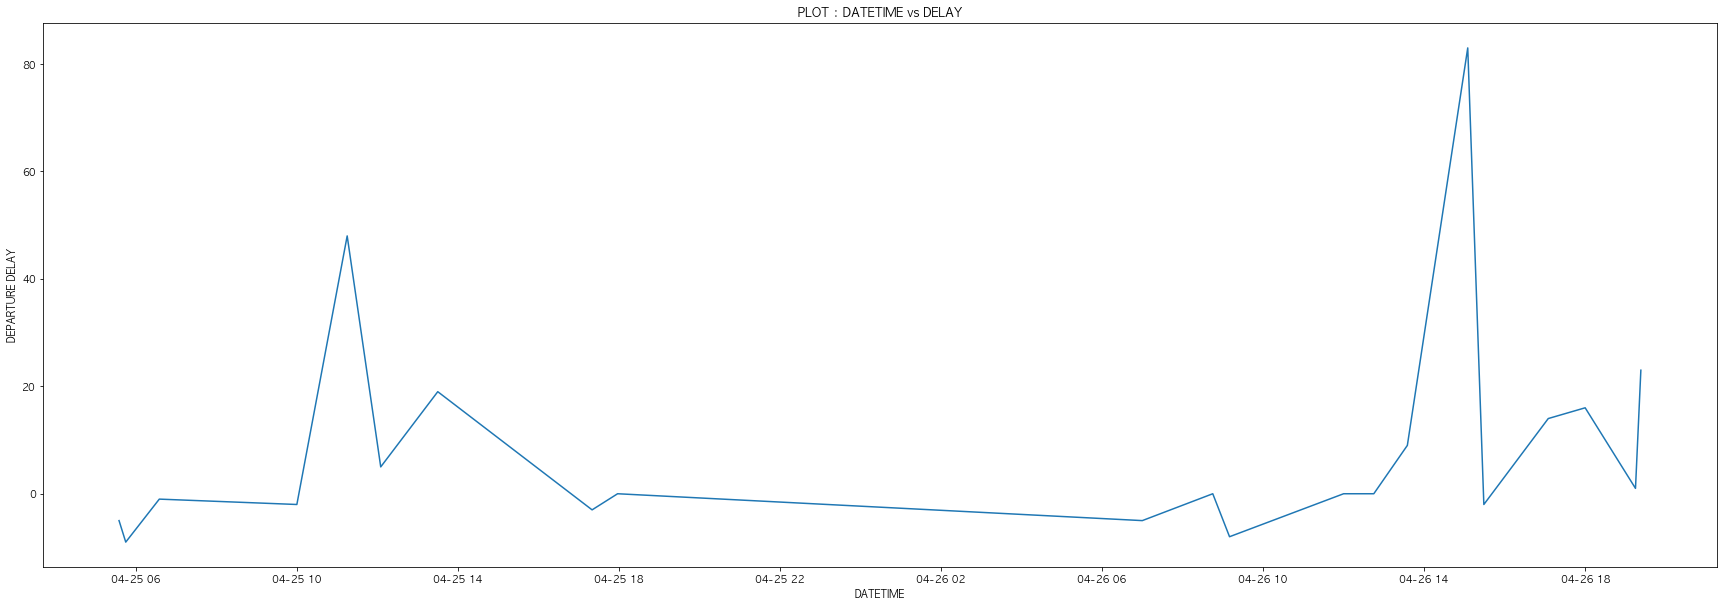

In [124]:
datetime_delay_figure('2015-04-02', '2015-04-03', df_apr)
datetime_delay_figure('2015-04-15', '2015-04-16', df_apr)
datetime_delay_figure('2015-04-25', '2015-04-26', df_apr)

#### 5일 단위
- 밤-새벽 시간대에 딜레이가 적은 것 외의 특징을 찾기 힘듭니다.

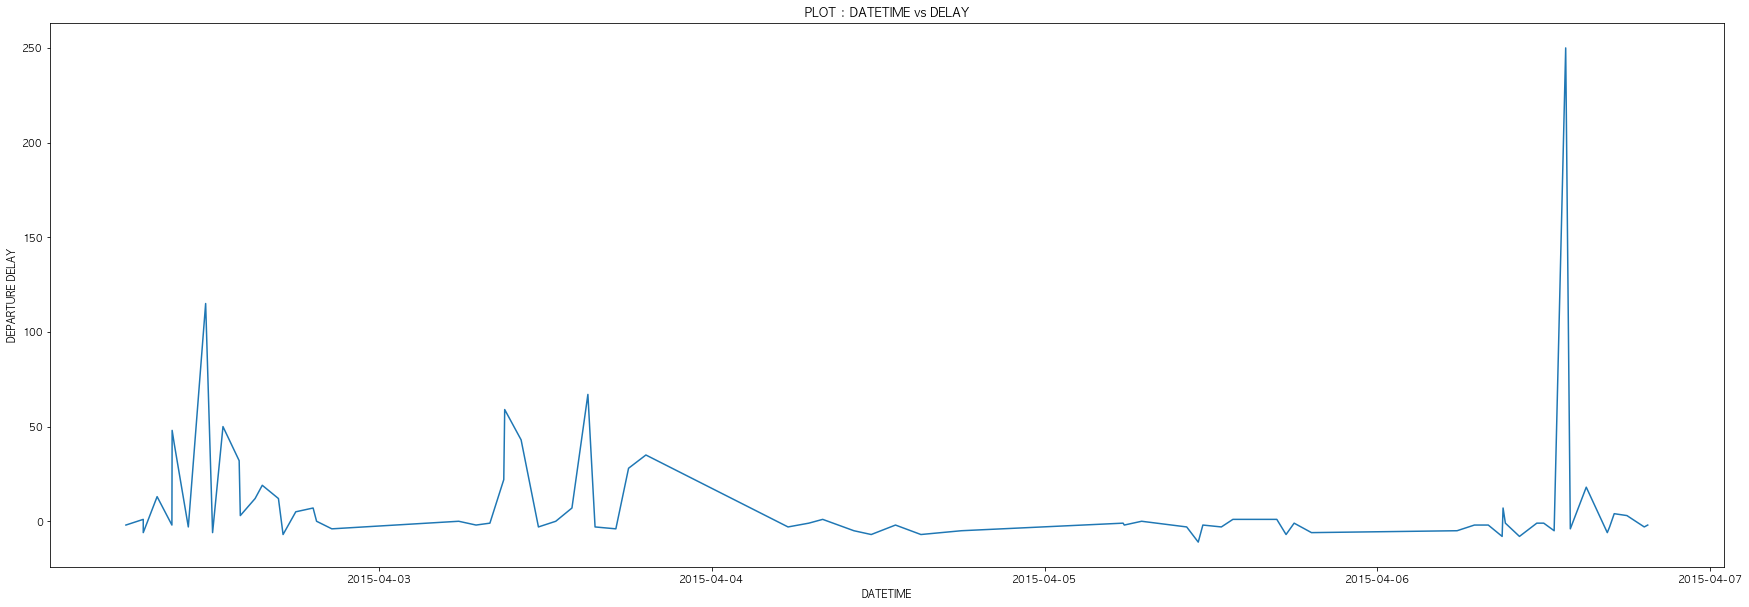

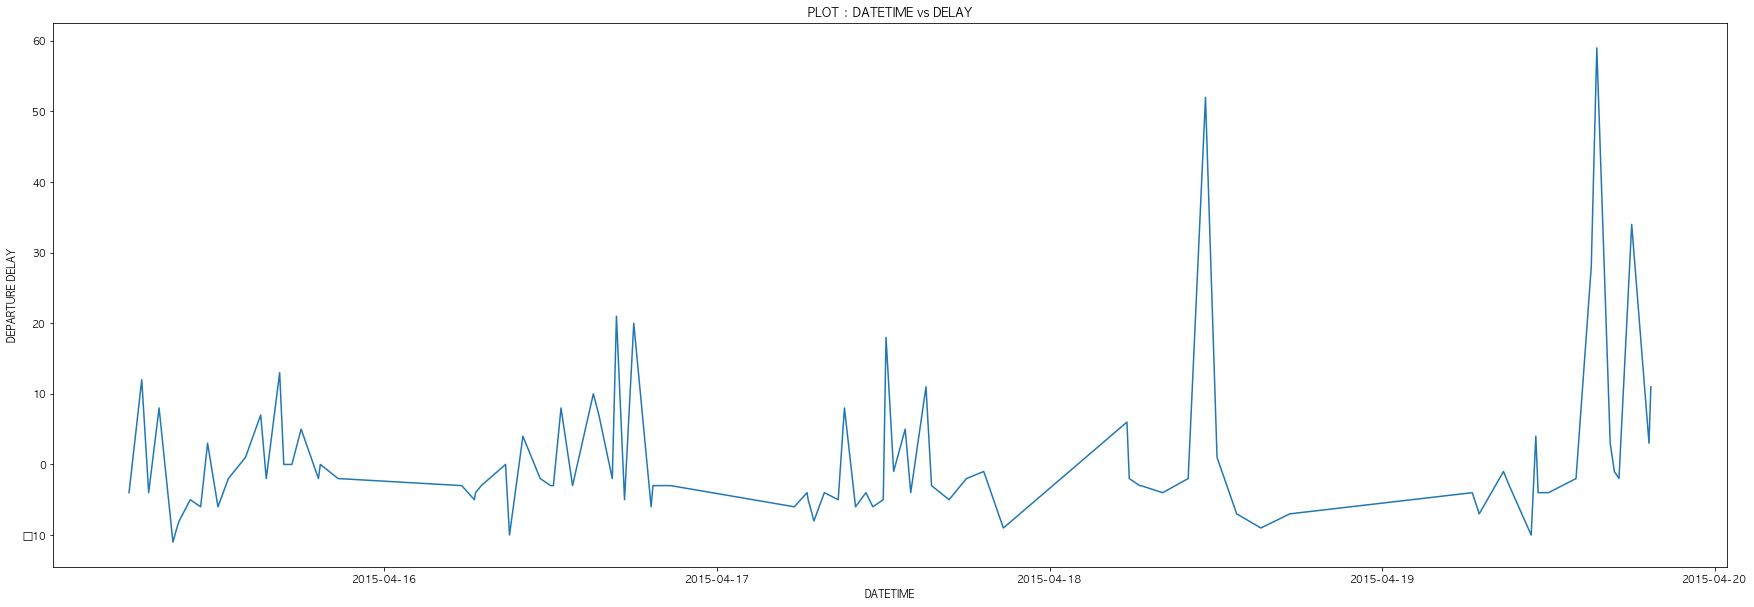

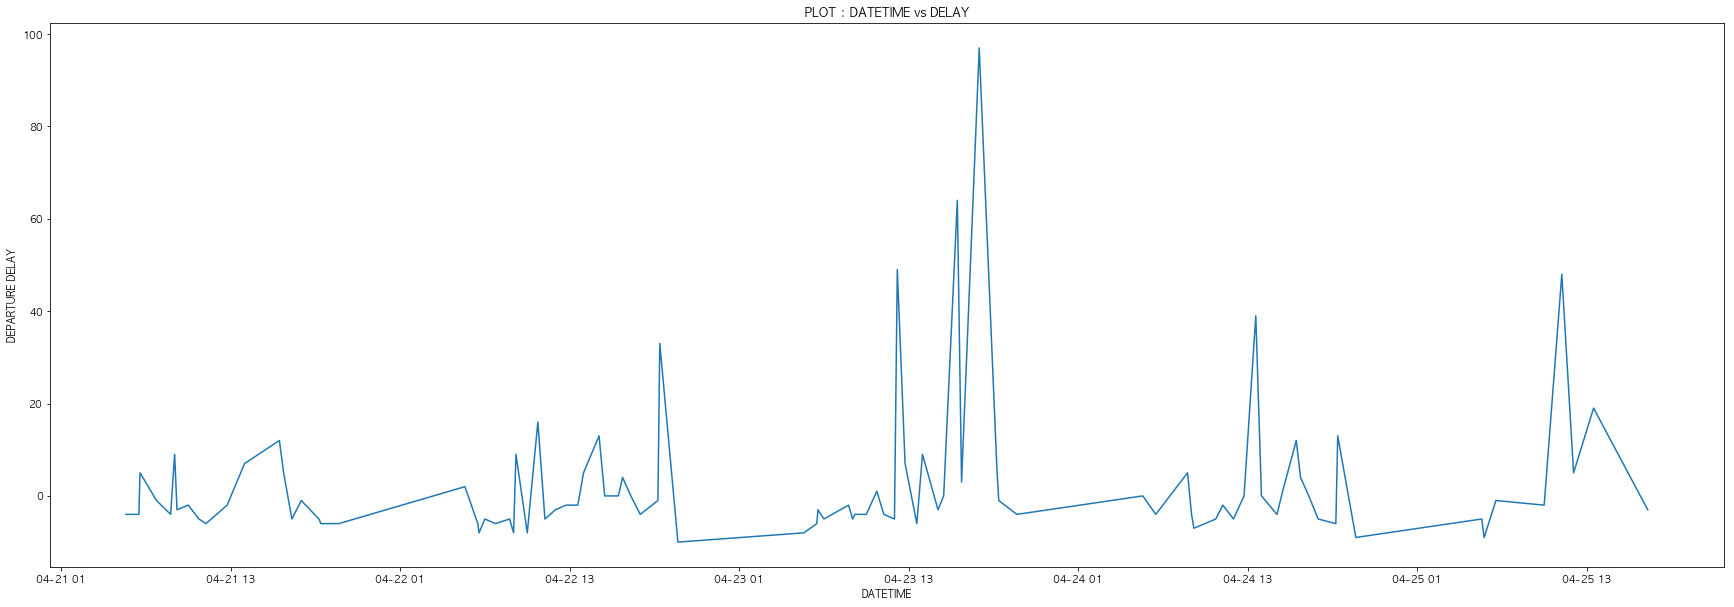

In [125]:
datetime_delay_figure('2015-04-02', '2015-04-06', df_apr)
datetime_delay_figure('2015-04-15', '2015-04-19', df_apr)
datetime_delay_figure('2015-04-21', '2015-04-25', df_apr)

<br><font size="6" face="Futura">
<strong>B3-9 EDA</strong><br>
<i>Atlanta, Delta, under 180 min</i>

- 데이터를 한 항공사(델타)와 한 공항(애틀란타)으로 제한하고 Delay는 60분으로 제한했습니다.
- 딜레이가 최대 1000분이 넘는 데이터들이 있고, 델타항공의 경우 3시간 이상 지연될 경우 전액 환불 규정이 있기 때문에 180분을 기준으로 삼아봤습니다. 

In [109]:
# 아틀란타에서 출발하는 델타항공 중 180분 이상 출발이 지연된 데이터 필터링: 5788개 데이터
df_180 = df[(df['ORIGIN_AIRPORT']=='ORD') & (df['AIRLINE'] == 'DL')]
df_180 = df_180.loc[lambda df_180: df_180.DEPARTURE_DELAY < 180]
len(df_180)

5788

#### 5일 단위
- 별다른 특징을 찾기 힘듭니다.

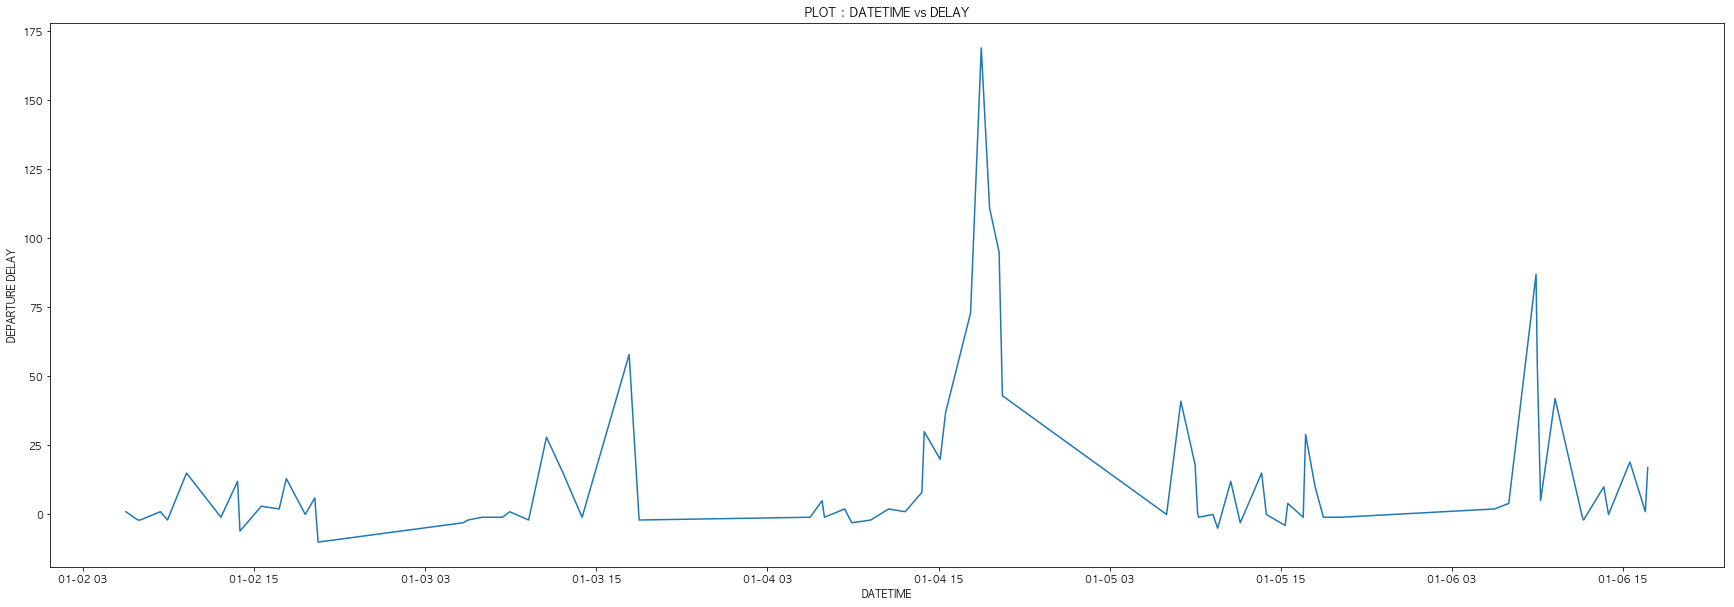

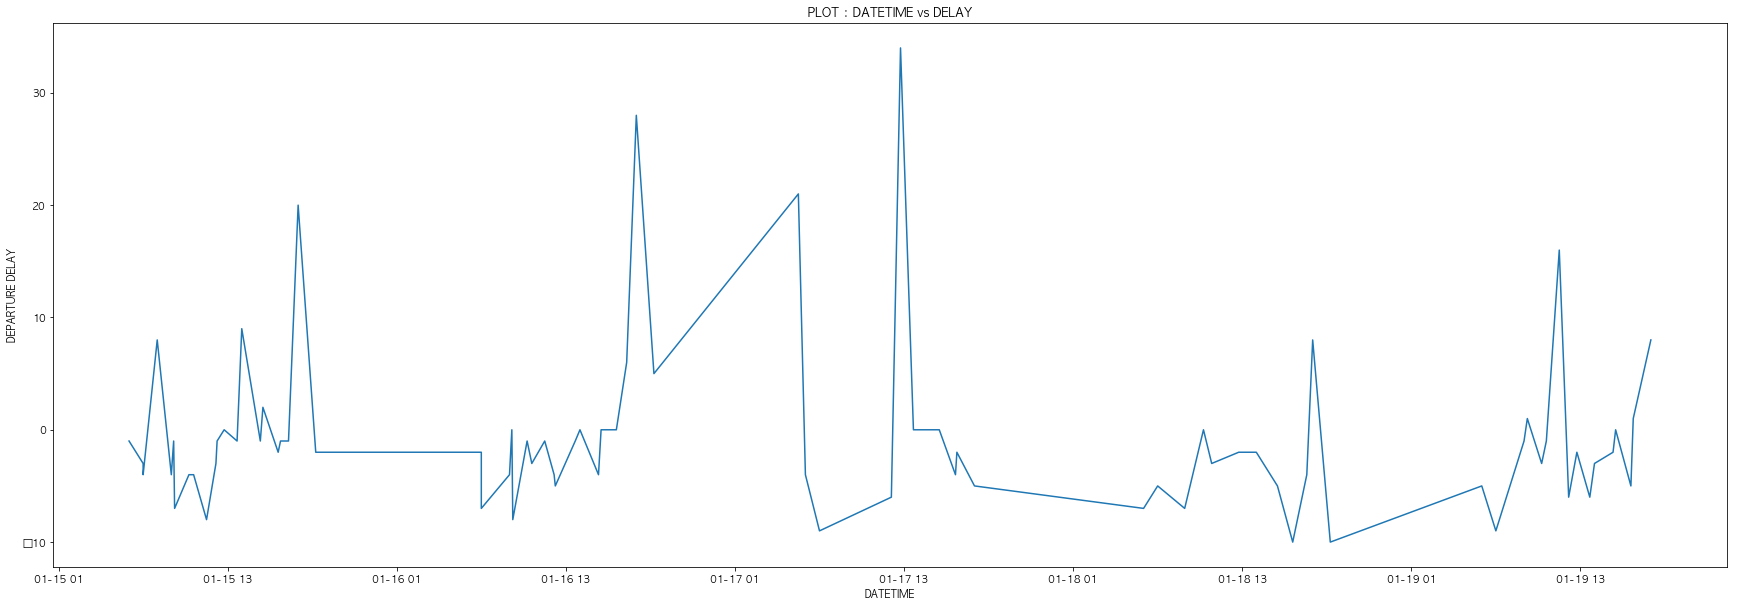

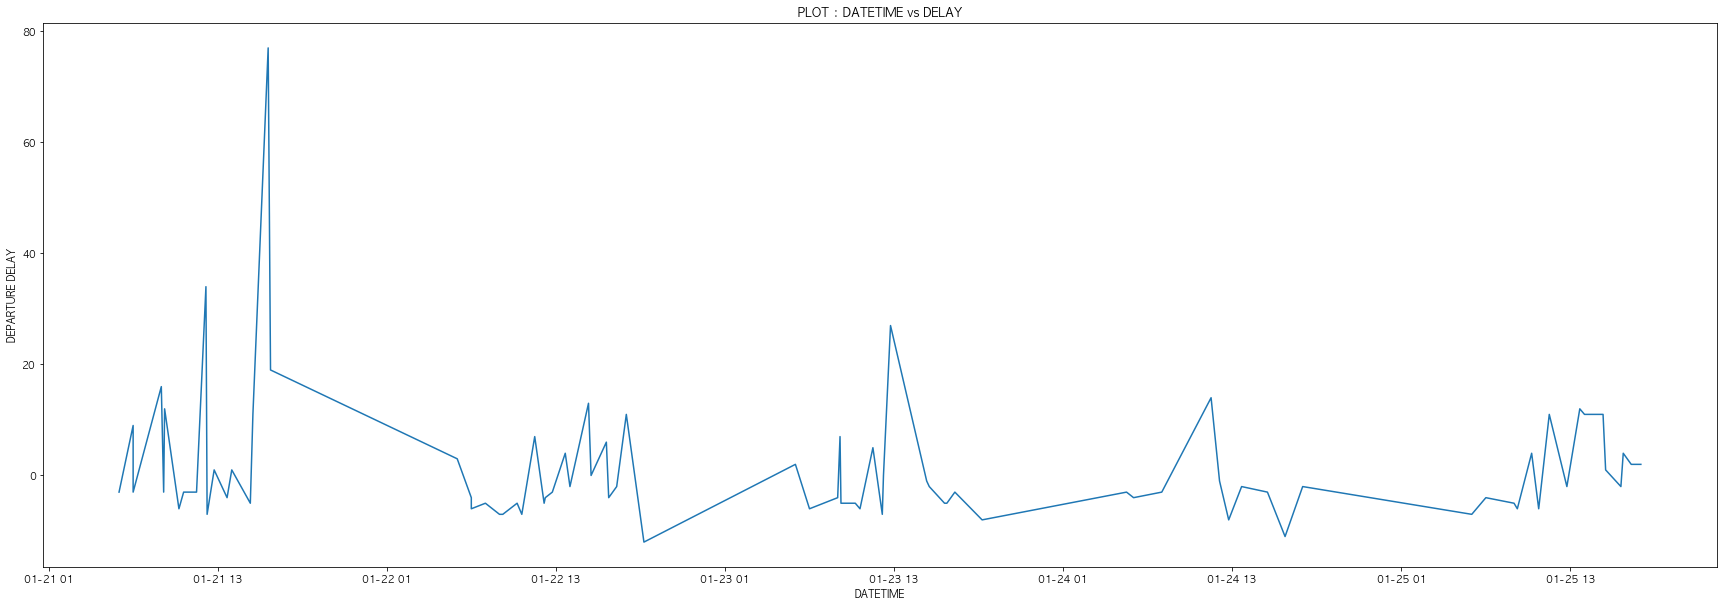

In [111]:
datetime_delay_figure('2015-01-02', '2015-01-06', df_180)
datetime_delay_figure('2015-01-15', '2015-01-19', df_180)
datetime_delay_figure('2015-01-21', '2015-01-25', df_180)

<br><font size="6" face="Futura">
<strong>B3-10 Data Cleaning</strong><br>
<i>EPOCH Time</i>

- OLS Regression에 앞서, `SCHEDULED_DEPARTURE_DATETIME`을 epoch 형태로 `SCHEDULED_DEPARTURE_DATETIME_EPOCH`에 저장합니다.

In [112]:
def epoch_time(data):
    """
    OLS 를 돌리기위해 날짜,시각 data 를 epoch time 으로 변환합니다.
    parameter : 시각 data
    return : epoch time 의 timestamp
    """
    return data.timestamp()

In [113]:
df["SCHEDULED_DEPARTURE_DATETIME_EPOCH"] = df["SCHEDULED_DEPARTURE_DATETIME"].apply(epoch_time)
df_jan["SCHEDULED_DEPARTURE_DATETIME_EPOCH"] = df_jan["SCHEDULED_DEPARTURE_DATETIME"].apply(epoch_time)
df_180["SCHEDULED_DEPARTURE_DATETIME_EPOCH"] = df_180["SCHEDULED_DEPARTURE_DATETIME"].apply(epoch_time)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<br><br><br><br><br><div style="text-align:center">
<font size="7em" color="#214A96" face="Futura">
<strong> B4. OLS Regression </strong><br><br><br><br><br>

In [115]:
df.columns

Index(['index', 'YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE',
       'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'DATE', 'FROM_HOLIDAY',
       'SCHEDULED_DEPARTURE_DATETIME', 'SCHEDULED_DEPARTURE_DATETIME_EPOCH'],
      dtype='object')

<br><font size="6" face="Futura">
<strong>B4-1 OLS Regression</strong> _MODEL B1_

- 하루 단위의 주기이므로 주기 T = 86400 입니다.
- 하루 단위 주기성에 따라 sin, cos 등 trigonometric function을 basis function으로 사용했습니다.

In [120]:
model_b1 = sm.OLS.from_formula("DEPARTURE_DELAY ~ 0 + MONTH + DAY + I(DAY**2) + C(DAY_OF_WEEK) + DISTANCE + \
np.sin((2*np.pi)*SCHEDULED_DEPARTURE_DATETIME_EPOCH/86400) + \
np.cos((2*np.pi)*SCHEDULED_DEPARTURE_DATETIME_EPOCH/86400)", data=df)
result_b1 = model_b1.fit()
print(result_b1.summary())

                            OLS Regression Results                            
Dep. Variable:        DEPARTURE_DELAY   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     5907.
Date:                Fri, 16 Nov 2018   Prob (F-statistic):               0.00
Time:                        12:05:37   Log-Likelihood:            -2.2371e+07
No. Observations:             4446356   AIC:                         4.474e+07
Df Residuals:                 4446343   BIC:                         4.474e+07
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

<br><font size="6" face="Futura">
<strong>B4-2 OLS Regression</strong> _MODEL B2_

In [126]:
# April, Atlanta, Delta
model_b2 = sm.OLS.from_formula("DEPARTURE_DELAY ~ 0 + C(FROM_HOLIDAY) + C(DAY_OF_WEEK) + \
DISTANCE + SCHEDULED_DEPARTURE_DATETIME_EPOCH + np.sin(SCHEDULED_DEPARTURE_DATETIME_EPOCH)", 
                               data=df_apr)
result_b2 = model_b2.fit()
print(result_b2.summary())

                            OLS Regression Results                            
Dep. Variable:        DEPARTURE_DELAY   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     11.29
Date:                Fri, 16 Nov 2018   Prob (F-statistic):           9.16e-40
Time:                        12:13:58   Log-Likelihood:                -2614.0
No. Observations:                 542   AIC:                             5290.
Df Residuals:                     511   BIC:                             5423.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

<br><font size="6" face="Futura">
<strong>B4-3 OLS Regression</strong> _MODEL B3_

In [ ]:
restricted_modeling = sm.OLS.from_formula("DEPARTURE_DELAY ~ 0 + C(FROM_HOLIDAY) + C(DAY_OF_WEEK) + DISTANCE + SCHEDULED_DEPARTURE_DATETIME_EPOCH + np.sin(SCHEDULED_DEPARTURE_DATETIME_EPOCH)", data=df_jan)
restricted_result = restricted_modeling.fit()
print(restricted_result.summary())

In [23]:
# 모델 밸리데이션
def model_validation(data, features_to_add):
    '''
    input : data : model하고자 하는 data_set(train_set), 
            features_to_add : feature로 이용하고싶은 column들
            ex) features_to_add = "DEPARTURE_DELAY + I(DISTANCE/AIR_TIME)"
    output : 만든 model로 test_set 의 y_predict을 예측하고, 그 regression에 대한 rsquared, mean_squared, median_error값을 return/
    '''
    model = sm.OLS.from_formula("ARRIVAL_DELAY ~ {}".format(features_to_add), data=data)
    result = model.fit()
    
    target = test_set['ARRIVAL_DELAY']
    y_predict = result.predict(test_set)
    
    rsquared = r2_score(target, y_predict)
    
    mean_squared = mean_squared_error(target, y_predict)
    
    median_error = median_absolute_error(target, y_predict)
    
    return "rsquared : {}, mean_sqaured : {}, median_error : {}".format(rsquared, mean_squared, median_error)

In [173]:
#4월 Data 추출
df = train_set[(train_set['MONTH'] == 4) & (train_set['ORIGIN_AIRPORT']=='ORD') & (train_set['AIRLINE'] == 'DL')]

In [174]:
restricted_modeling = sm.OLS.from_formula("DEPARTURE_DELAY ~ 0 + C(TAIL_NUMBER) + C(FROM_HOLIDAY) + C(DAY_OF_WEEK) + DISTANCE + SCHEDULED_DEPARTURE_DATETIME_EPOCH + np.sin((2*np.pi)*SCHEDULED_DEPARTURE_DATETIME_EPOCH/86400) + np.cos((2*np.pi)*SCHEDULED_DEPARTURE_DATETIME_EPOCH/86400)", data=df)
restricted_result = restricted_modeling.fit()
print(restricted_result.summary())

                            OLS Regression Results                            
Dep. Variable:        DEPARTURE_DELAY   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     2.343
Date:                Mon, 12 Nov 2018   Prob (F-statistic):           5.73e-12
Time:                        20:19:06   Log-Likelihood:                -2394.2
No. Observations:                 543   AIC:                             5380.
Df Residuals:                     247   BIC:                             6652.
Df Model:                         295                                         
Covariance Type:            nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [274]:
# 평일
df = train_set[(train_set['MONTH'] == 4) & (train_set['ORIGIN_AIRPORT']=='ORD') & (train_set['AIRLINE'] == 'DL')\
              & (train_set['DAY_OF_WEEK'] == 6)]

In [275]:
restricted_modeling = sm.OLS.from_formula("DEPARTURE_DELAY ~ 0 + C(FROM_HOLIDAY) + C(DAY_OF_WEEK) + DISTANCE + SCHEDULED_DEPARTURE_DATETIME_EPOCH + np.sin((2*np.pi)*SCHEDULED_DEPARTURE_DATETIME_EPOCH/86400) + np.cos((2*np.pi)*SCHEDULED_DEPARTURE_DATETIME_EPOCH/86400)", data=df)
restricted_result = restricted_modeling.fit()
print(restricted_result.summary())

                            OLS Regression Results                            
Dep. Variable:        DEPARTURE_DELAY   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     1.753
Date:                Tue, 13 Nov 2018   Prob (F-statistic):              0.141
Time:                        10:28:05   Log-Likelihood:                -148.75
No. Observations:                  39   AIC:                             311.5
Df Residuals:                      32   BIC:                             323.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [182]:
# 평일
df = train_set[(train_set['MONTH'] == 4) & (train_set['ORIGIN_AIRPORT']=='ORD')\
              & (train_set['DAY_OF_WEEK'] != 6) & (train_set['DAY_OF_WEEK'] != 7)]

In [183]:
restricted_modeling = sm.OLS.from_formula("DEPARTURE_DELAY ~ 0 + C(AIRLINE) + C(FROM_HOLIDAY) + DISTANCE + SCHEDULED_DEPARTURE_DATETIME_EPOCH + np.sin((2*np.pi)*SCHEDULED_DEPARTURE_DATETIME_EPOCH/86400) + np.cos((2*np.pi)*SCHEDULED_DEPARTURE_DATETIME_EPOCH/86400)", data=df)
restricted_result = restricted_modeling.fit()
print(restricted_result.summary())

                            OLS Regression Results                            
Dep. Variable:        DEPARTURE_DELAY   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     96.21
Date:                Mon, 12 Nov 2018   Prob (F-statistic):               0.00
Time:                        20:25:52   Log-Likelihood:                -81191.
No. Observations:               16428   AIC:                         1.625e+05
Df Residuals:                   16393   BIC:                         1.627e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [ ]:
x + I(x**2)", data=df

In [259]:
# 평일
df = train_set[(train_set['MONTH'] == 4) & (train_set['ORIGIN_AIRPORT']=='ORD')]

In [267]:
restricted_modeling = sm.OLS.from_formula("DEPARTURE_DELAY ~ 0 + C(AIRLINE) + C(FROM_HOLIDAY) + I(DISTANCE**2) + np.log(SCHEDULED_DEPARTURE_DATETIME_EPOCH) + np.sin((2*np.pi)*SCHEDULED_DEPARTURE_DATETIME_EPOCH/86400) + np.cos((2*np.pi)*SCHEDULED_DEPARTURE_DATETIME_EPOCH/86400)", data=df)
restricted_result = restricted_modeling.fit()
print(restricted_result.summary())

                            OLS Regression Results                            
Dep. Variable:        DEPARTURE_DELAY   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     85.52
Date:                Tue, 13 Nov 2018   Prob (F-statistic):               0.00
Time:                        02:02:10   Log-Likelihood:            -1.0565e+05
No. Observations:               21574   AIC:                         2.114e+05
Df Residuals:                   21534   BIC:                         2.117e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [53]:
model_x = sm.OLS.from_formula("ARRIVAL_DELAY ~ 0 + C(FROM_HOLIDAY) + DEPARTURE_DELAY + C(DAY_OF_WEEK) + DISTANCE + SCHEDULED_DEPARTURE_DATETIME_EPOCH + np.sin(SCHEDULED_DEPARTURE_DATETIME_EPOCH)", data=df)
result_x = model_x.fit()
print(result_x.summary())

PatsyError: Error evaluating factor: NameError: name 'ARRIVAL_DELAY' is not defined
    ARRIVAL_DELAY ~ 0 + C(FROM_HOLIDAY) + DEPARTURE_DELAY + C(DAY_OF_WEEK) + DISTANCE + SCHEDULED_DEPARTURE_DATETIME_EPOCH + np.sin(SCHEDULED_DEPARTURE_DATETIME_EPOCH)
    ^^^^^^^^^^^^^

In [230]:
# AIRPORT CONGESTION
df_nov_count = df_nov.groupby(["SCHEDULED_DEPARTURE"]).size().reset_index(name="Counts")
df_nov_count

SCHEDULED_DEPARTURE  Counts
0               00:01:00       1
1               00:02:00       4
2               00:03:00       3
3               00:04:00       3
4               00:05:00      38
...                  ...     ...
1189            23:55:00     416
1190            23:56:00      14
1191            23:57:00      28
1192            23:58:00      22
1193            23:59:00     441

[1194 rows x 2 columns]

In [270]:
df_nov = pd.merge(df_nov, df_nov_count, how="left")

In [273]:
len(df_nov)

398028

In [276]:
df_nov2 = df_nov[(df_nov['ORIGIN_AIRPORT']=='ORD') & (df_nov['AIRLINE'] == 'DL')]

In [281]:
restricted_modeling = sm.OLS.from_formula("DEPARTURE_DELAY ~ 0 + scale(Counts) + C(FROM_HOLIDAY) + C(DAY_OF_WEEK) + DISTANCE + SCHEDULED_DEPARTURE_DATETIME_EPOCH + np.sin((2*np.pi)*SCHEDULED_DEPARTURE_DATETIME_EPOCH/86400) + np.cos((2*np.pi)*SCHEDULED_DEPARTURE_DATETIME_EPOCH/86400)", data=df_nov)
restricted_result = restricted_modeling.fit()
print(restricted_result.summary())

                            OLS Regression Results                            
Dep. Variable:        DEPARTURE_DELAY   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     344.7
Date:                Tue, 13 Nov 2018   Prob (F-statistic):               0.00
Time:                        10:32:12   Log-Likelihood:            -1.9503e+06
No. Observations:              394378   AIC:                         3.901e+06
Df Residuals:                  394356   BIC:                         3.901e+06
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------